# **Amazing International Airlines Inc. (AIAI)**

## **Context**

Amazing International Airlines Inc. (AIAI) is a global airline seeking to enhance its customer loyalty program through **data-driven personalization**.  
In an increasingly competitive aviation market, AIAI aims to leverage **advanced segmentation analytics** to design tailored services and marketing strategies for its diverse customer base.

Your task is to analyze **three years of loyalty and flight activity data** to uncover meaningful customer segments that can guide business decisions and strategic initiatives.  

The segmentation should integrate multiple analytical perspectives, including:

- **Value-based segmentation** — grouping customers by their economic contribution and loyalty value.  
- **Behavioral segmentation** — analyzing flight frequency, point redemption habits, and travel companions.  
- **Demographic segmentation** — considering personal attributes such as gender, income, education, and location to reveal distinctive travel profiles.  

Ultimately, the objective is to **combine these perspectives into a unified segmentation framework**, supporting AIAI in creating differentiated experiences and maximizing long-term customer value.


## **Expected Outcomes**

In this notebook, we will perform a comprehensive **Exploratory Data Analysis (EDA)** aligned with the CRISP-DM methodology, focusing on:

- Descriptive statistics and visualization of key variables.  
- Identification of data quality issues and potential biases.  
- Detection of trends, patterns, and anomalies across customer behaviors.  
- Development of engineered features that may enhance future clustering performance.  
- Clear communication of insights to support strategic decision-making.

## **Data Definition**

### Dataset 1: `DM_AIAI_CustomerDB.csv`

| **Variable** | **Description** |
|---------------|-----------------|
| Loyalty# | Unique customer identifier for loyalty program members |
| First Name | Customer’s first name |
| Last Name | Customer’s last name |
| Customer Name | Customer’s full name (concatenated) |
| Country | Customer’s country of residence |
| Province or State | Customer’s province or state |
| City | Customer’s city of residence |
| Latitude | Geographic latitude coordinate of customer location |
| Longitude | Geographic longitude coordinate of customer location |
| Postal code | Customer’s postal/ZIP code |
| Gender | Customer’s gender |
| Education | Customer’s highest education level |
| Location Code | Urban/Suburban/Rural classification of customer residence |
| Income | Customer’s annual income |
| Marital Status | Customer’s marital status |
| LoyaltyStatus | Current tier status in loyalty program (Star > Nova > Aurora) |
| EnrollmentDateOpening | Date when customer joined the loyalty program |
| CancellationDate | Date when customer left the program |
| Customer Lifetime Value | Total calculated monetary value of customer relationship |
| EnrollmentType | Method of joining loyalty program |





### Dataset 2: `DM_AIAI_FlightsDB.csv`

| **Variable** | **Description** |
|---------------|-----------------|
| Loyalty# | Unique customer identifier linking to CustomerDB |
| Year | Year of flight activity record |
| Month | Month of flight activity record (1–12) |
| YearMonthDate | First day of the month for the activity period |
| NumFlights | Total number of flights taken by customer in the month |
| NumFlightsWithCompanions | Number of flights where customer traveled with companions |
| DistanceKM | Total distance traveled in kilometers for the month |
| PointsAccumulated | Loyalty points earned by customer during the month |
| PointsRedeemed | Loyalty points spent/redeemed by customer during the month |
| DollarCostPointsRedeemed | Dollar value of points redeemed during the month |



### **Methodological Note**

This segmentation initiative originates from a **pedagogical impetus embedded in data-centric inquiry**, aligning technical exploration with **business-oriented insight generation**.  
All analyses are conducted under the **CRISP-DM framework**, progressing from Business Understanding and Data Understanding toward Modeling and Evaluation.

---

This section imports the essential Python libraries and defines reusable functions that will support the exploratory data analysis (EDA) process for the **Amazing International Airlines Inc. (AIAI)** segmentation project.  
All functions are designed for clarity, reproducibility, and consistency across the analysis workflow.

# **Libraries and Functions**

# Import Packages and read files

In [442]:
#%load_ext nb_black

# Library to suppress warnings or deprecation notes
!pip install scikit-learn
!pip install geopy
!pip install folium
!pip install pdfkit
!pip install geopandas

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np
import os

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.impute import KNNImputer
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage
from geopy.geocoders import Nominatim
from geopy.distance import geodesic
from sklearn.manifold import TSNE

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
import math
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder
import datetime
from sklearn.impute import KNNImputer
import plotly.express as px
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from scipy import stats
import matplotlib.cm as cm
from sklearn import metrics
from sklearn.metrics import make_scorer, silhouette_score, silhouette_samples, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram
from sklearn.model_selection import GridSearchCV

## **Functions**

### Files to be loaded:
- `DM_AIAI_CustomerDB.csv` — customer-level information from the loyalty program  
- `DM_AIAI_FlightsDB.csv` — monthly flight activity data linked via the `Loyalty#` key  

### Objective:
Load both datasets from the local working directory into pandas DataFrames for subsequent cleaning, exploration, and feature engineering.


In [443]:
# Detect if colab environment and if colab then mount drive
if 'google.colab' in str(get_ipython()):
    from google.colab import drive
    drive.mount('/content/drive')
    os.chdir('/content/drive/Othercomputers/My laptop/202526_novaims/dm/project')
    print(os.getcwd())

In [444]:
FlightsDB = pd.read_csv('data/DM_AIAI_FlightsDB.csv', sep = ',')
CustomerDB = pd.read_csv('data/DM_AIAI_CustomerDB.csv', sep = ',')

# Initial Inspection

In [445]:
CustomerDB.head()

Unnamed: 0  Loyalty# First Name    Last Name        Customer Name Country  \
0           0    480934    Cecilia  Householder  Cecilia Householder  Canada   
1           1    549612      Dayle        Menez          Dayle Menez  Canada   
2           2    429460     Necole       Hannon        Necole Hannon  Canada   
3           3    608370      Queen        Hagee          Queen Hagee  Canada   
4           4    530508     Claire      Latting       Claire Latting  Canada   

  Province or State       City   Latitude   Longitude  ...  Gender Education  \
0           Ontario    Toronto  43.653225  -79.383186  ...  female  Bachelor   
1           Alberta   Edmonton  53.544388 -113.490930  ...    male   College   
2  British Columbia  Vancouver  49.282730 -123.120740  ...    male   College   
3           Ontario    Toronto  43.653225  -79.383186  ...    male   College   
4            Quebec       Hull  45.428730  -75.713364  ...    male  Bachelor   

  Location Code   Income  Marital Status LoyaltyStatus EnrollmentDateOpening  \
0         Urban  70146.0         Married          Star             2/15/2019   
1         Rural      0.0        Divorced          Star              3/9/2019   
2         Urban      0.0          Single          Star             7/14/2017   
3      Suburban      0.0          Single          Star             2/17/2016   
4      Suburban  97832.0         Married          Star            10/25/2017   

  CancellationDate Customer Lifetime Value  EnrollmentType  
0              NaN                 3839.14        Standard  
1              NaN                 3839.61        Standard  
2         1/8/2021                 3839.75        Standard  
3              NaN                 3839.75        Standard  
4              NaN                 3842.79  2021 Promotion  

[5 rows x 21 columns]

In [446]:
FlightsDB.head()

Loyalty#  Year  Month YearMonthDate  NumFlights  NumFlightsWithCompanions  \
0    413052  2021     12     12/1/2021         2.0                       2.0   
1    464105  2021     12     12/1/2021         0.0                       0.0   
2    681785  2021     12     12/1/2021        10.0                       3.0   
3    185013  2021     12     12/1/2021        16.0                       4.0   
4    216596  2021     12     12/1/2021         9.0                       0.0   

   DistanceKM  PointsAccumulated  PointsRedeemed  DollarCostPointsRedeemed  
0      9384.0              938.0             0.0                       0.0  
1         0.0                0.0             0.0                       0.0  
2     14745.0             1474.0             0.0                       0.0  
3     26311.0             2631.0          3213.0                      32.0  
4     19275.0             1927.0             0.0                       0.0

In [447]:
CustomerDB = CustomerDB.drop(columns=['Unnamed: 0'])
CustomerDB.tail()

Loyalty# First Name Last Name    Customer Name Country  \
16916    100012      Ethan  Thompson   Ethan Thompson  Canada   
16917    100013      Layla     Young      Layla Young  Canada   
16918    100014     Amelia   Bennett   Amelia Bennett  Canada   
16919    100015   Benjamin    Wilson  Benjamin Wilson  Canada   
16920    100016       Emma    Martin      Emma Martin  Canada   

      Province or State          City   Latitude   Longitude Postal code  \
16916            Quebec   Quebec City  46.759733  -71.141009     Y0C 7D6   
16917           Alberta      Edmonton  53.524829 -113.546357     L3S 9Y3   
16918     New Brunswick       Moncton  46.051866  -64.825428     G2S 2B6   
16919            Quebec   Quebec City  46.862970  -71.133444     B1Z 8T3   
16920  British Columbia  Dawson Creek  55.720562 -120.160090     M4A 1E4   

       Gender Education Location Code  Income Marital Status LoyaltyStatus  \
16916    male  Bachelor      Suburban     NaN         Single          Star   
16917  female  Bachelor         Rural     NaN        Married          Star   
16918    male  Bachelor         Rural     NaN        Married          Star   
16919  female   College         Urban     NaN        Married          Star   
16920  female    Master      Suburban     NaN         Single          Star   

      EnrollmentDateOpening CancellationDate  Customer Lifetime Value  \
16916             2/27/2019        2/27/2019                      NaN   
16917             9/20/2017        9/20/2017                      NaN   
16918            11/28/2020       11/28/2020                      NaN   
16919              4/9/2020         4/9/2020                      NaN   
16920             7/21/2020        7/21/2020                      NaN   

      EnrollmentType  
16916       Standard  
16917       Standard  
16918       Standard  
16919       Standard  
16920       Standard

In [448]:
FlightsDB.tail()

Loyalty#  Year  Month YearMonthDate  NumFlights  \
608431    999902  2019     12     12/1/2019         7.2   
608432    999911  2019     12     12/1/2019         0.0   
608433    999940  2019     12     12/1/2019        14.4   
608434    999982  2019     12     12/1/2019         0.0   
608435    999986  2019     12     12/1/2019         0.0   

        NumFlightsWithCompanions  DistanceKM  PointsAccumulated  \
608431                       0.0     30766.5            3076.65   
608432                       0.0         0.0               0.00   
608433                       0.9     18261.0            1826.10   
608434                       0.0         0.0               0.00   
608435                       0.0         0.0               0.00   

        PointsRedeemed  DollarCostPointsRedeemed  
608431             0.0                       0.0  
608432             0.0                       0.0  
608433             0.0                       0.0  
608434             0.0                       0.0  
608435             0.0                       0.0

In [449]:
print(CustomerDB.columns)

print(f"Customer dataset: {CustomerDB.shape[0]} rows × {CustomerDB.shape[1]} columns")

Index(['Loyalty#', 'First Name', 'Last Name', 'Customer Name', 'Country',
       'Province or State', 'City', 'Latitude', 'Longitude', 'Postal code',
       'Gender', 'Education', 'Location Code', 'Income', 'Marital Status',
       'LoyaltyStatus', 'EnrollmentDateOpening', 'CancellationDate',
       'Customer Lifetime Value', 'EnrollmentType'],
      dtype='object')
Customer dataset: 16921 rows × 20 columns


In [450]:
print(FlightsDB.columns)

print(f"Flights dataset:  {FlightsDB.shape[0]} rows × {FlightsDB.shape[1]} columns")

Index(['Loyalty#', 'Year', 'Month', 'YearMonthDate', 'NumFlights',
       'NumFlightsWithCompanions', 'DistanceKM', 'PointsAccumulated',
       'PointsRedeemed', 'DollarCostPointsRedeemed'],
      dtype='object')
Flights dataset:  608436 rows × 10 columns


# **Exploratory Data Analysis**

## Dataframe structure and datatypes

In this section, we inspect the structure and data types of the two AIAI datasets:  
- `CustomerDB`: loyalty program and demographic information.  
- `FlightsDB`: monthly flight activity data.

This step helps us confirm that the data was imported correctly, identify column types, and detect potential inconsistencies (e.g., numeric fields stored as objects).

In [451]:
print("=== Customer Dataset Info ===")
CustomerDB.info()

=== Customer Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16921 entries, 0 to 16920
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loyalty#                 16921 non-null  int64  
 1   First Name               16921 non-null  object 
 2   Last Name                16921 non-null  object 
 3   Customer Name            16921 non-null  object 
 4   Country                  16921 non-null  object 
 5   Province or State        16921 non-null  object 
 6   City                     16921 non-null  object 
 7   Latitude                 16921 non-null  float64
 8   Longitude                16921 non-null  float64
 9   Postal code              16921 non-null  object 
 10  Gender                   16921 non-null  object 
 11  Education                16921 non-null  object 
 12  Location Code            16921 non-null  object 
 13  Income                   16901 non-null  float

From the dataset, we can conclude the following:
- **'Income'** and **'Customer Lifetime Value'** have exactly the same missing values, suggesting that these two variables are likely related.
- **CancellationDate** has a low number of missing values (2310) showing that but the majority of customers are still active (86%).
- **EnrollmentDateOpening** and **CancellationDate** should be convert to DateTime

In [452]:
print("\n=== Flights Dataset Info ===")
FlightsDB.info()


=== Flights Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608436 entries, 0 to 608435
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Loyalty#                  608436 non-null  int64  
 1   Year                      608436 non-null  int64  
 2   Month                     608436 non-null  int64  
 3   YearMonthDate             608436 non-null  object 
 4   NumFlights                608436 non-null  float64
 5   NumFlightsWithCompanions  608436 non-null  float64
 6   DistanceKM                608436 non-null  float64
 7   PointsAccumulated         608436 non-null  float64
 8   PointsRedeemed            608436 non-null  float64
 9   DollarCostPointsRedeemed  608436 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 46.4+ MB


From the dataset, we can conclude the following:

- No missing values

- **YearMonthDate** should be converted to datetime

- **NumFlights**, **NumFlightsWithCompanions**, **PointsAccumulated** and **PointsRedeemed** should be converted to integer

In [453]:
CustomerDB.dtypes

Loyalty#                     int64
First Name                  object
Last Name                   object
Customer Name               object
Country                     object
Province or State           object
City                        object
Latitude                   float64
Longitude                  float64
Postal code                 object
Gender                      object
Education                   object
Location Code               object
Income                     float64
Marital Status              object
LoyaltyStatus               object
EnrollmentDateOpening       object
CancellationDate            object
Customer Lifetime Value    float64
EnrollmentType              object
dtype: object

The types of the following features in CustomerDB should be:
- **'EnrollmentDateOpening'**: datetime64
- **'CancellationDate'**: datetime64

This will be addressed in the Data Types section to ensure proper handling for filtering, comparison, and time-based analysis.


In [454]:
FlightsDB.dtypes

Loyalty#                      int64
Year                          int64
Month                         int64
YearMonthDate                object
NumFlights                  float64
NumFlightsWithCompanions    float64
DistanceKM                  float64
PointsAccumulated           float64
PointsRedeemed              float64
DollarCostPointsRedeemed    float64
dtype: object

The types of the following features in FlightsDB should be:
- **'NumFlights'**: int64
- **'NumFlightswithCompanions'**: int64
- **'PointsAccumulated'**: int64
- **'PointsRedeemed'**: int64

In [455]:
CustomerDB.nunique()

Loyalty#                   16757
First Name                  4941
Last Name                  15404
Customer Name              16921
Country                        1
Province or State             11
City                          29
Latitude                      49
Longitude                     49
Postal code                   75
Gender                         2
Education                      5
Location Code                  3
Income                      5694
Marital Status                 3
LoyaltyStatus                  3
EnrollmentDateOpening       2449
CancellationDate            1260
Customer Lifetime Value     7996
EnrollmentType                 2
dtype: int64

The feature **Country** contains only a single unique value, meaning it provides no meaningful information for analysis. Therefore, it is recommended to drop this feature.

The features **EnrollmentType** and **Gender** each have only two unique categories. Since they are binary, we can transform them into boolean variables for easier analysis and modeling.

In [456]:
FlightsDB.nunique()

Loyalty#                    16737
Year                            3
Month                          12
YearMonthDate                  36
NumFlights                     41
NumFlightsWithCompanions       22
DistanceKM                  66762
PointsAccumulated           37064
PointsRedeemed               8146
DollarCostPointsRedeemed      104
dtype: int64

# Descriptive Statistics

## CustomerDB

In [457]:
CustomerDB.describe(include='all').T

count unique          top   freq           mean  \
Loyalty#                 16921.0    NaN          NaN    NaN  550197.393771   
First Name                 16921   4941         Deon     13            NaN   
Last Name                  16921  15404      Salberg      4            NaN   
Customer Name              16921  16921  Emma Martin      1            NaN   
Country                    16921      1       Canada  16921            NaN   
Province or State          16921     11      Ontario   5468            NaN   
City                       16921     29      Toronto   3390            NaN   
Latitude                 16921.0    NaN          NaN    NaN        47.1745   
Longitude                16921.0    NaN          NaN    NaN     -91.814768   
Postal code                16921     75      V6E 3D9    917            NaN   
Gender                     16921      2       female   8497            NaN   
Education                  16921      5     Bachelor  10586            NaN   
Location Code              16921      3     Suburban   5716            NaN   
Income                   16901.0    NaN          NaN    NaN     37758.0384   
Marital Status             16921      3      Married   9842            NaN   
LoyaltyStatus              16921      3         Star   7761            NaN   
EnrollmentDateOpening      16921   2449     4/3/2015     34            NaN   
CancellationDate            2310   1260     7/7/2020      8            NaN   
Customer Lifetime Value  16901.0    NaN          NaN    NaN    7990.460188   
EnrollmentType             16921      2     Standard  15773            NaN   

                                   std        min        25%        50%  \
Loyalty#                 259251.503597   100011.0   326823.0   550896.0   
First Name                         NaN        NaN        NaN        NaN   
Last Name                          NaN        NaN        NaN        NaN   
Customer Name                      NaN        NaN        NaN        NaN   
Country                            NaN        NaN        NaN        NaN   
Province or State                  NaN        NaN        NaN        NaN   
City                               NaN        NaN        NaN        NaN   
Latitude                      3.307971  42.984924  44.231171  46.087818   
Longitude                    22.242429 -135.05684 -120.23766 -79.383186   
Postal code                        NaN        NaN        NaN        NaN   
Gender                             NaN        NaN        NaN        NaN   
Education                          NaN        NaN        NaN        NaN   
Location Code                      NaN        NaN        NaN        NaN   
Income                    30368.992499        0.0        0.0    34161.0   
Marital Status                     NaN        NaN        NaN        NaN   
LoyaltyStatus                      NaN        NaN        NaN        NaN   
EnrollmentDateOpening              NaN        NaN        NaN        NaN   
CancellationDate                   NaN        NaN        NaN        NaN   
Customer Lifetime Value    6863.173093    1898.01    3979.72    5780.18   
EnrollmentType                     NaN        NaN        NaN        NaN   

                               75%        max  
Loyalty#                  772438.0   999999.0  
First Name                     NaN        NaN  
Last Name                      NaN        NaN  
Customer Name                  NaN        NaN  
Country                        NaN        NaN  
Province or State              NaN        NaN  
City                           NaN        NaN  
Latitude                  49.28273  60.721188  
Longitude               -74.596184 -52.712578  
Postal code                    NaN        NaN  
Gender                         NaN        NaN  
Education                      NaN        NaN  
Location Code                  NaN        NaN  
Income                     62396.0    99981.0  
Marital Status                 NaN        NaN  
LoyaltyStatus                  NaN        Na

All customers are located in Canada; the most common province is Ontario and the most common city is Toronto.

The **"Income"** field has a mean of about 37,758, with a wide range (0 to 99,981), so it means that each customer, in average receives a income of 37k per year.

**Loyalty Status** has three categories, with "Star" being the most common.

Most accounts were opened with the "Standard" enrollment type.

There are many more enrollments than cancellations, suggesting most customers remain active.

**First Name**, **Last Name** and **Customer Name** does not seems to have significant relevance.

## FlightsDB

In [458]:
FlightsDB.describe().T

count           mean            std       min  \
Loyalty#                  608436.0  550037.873084  258935.180575  100018.0   
Year                      608436.0    2020.000000       0.816497    2019.0   
Month                     608436.0       6.500000       3.452055       1.0   
NumFlights                608436.0       3.908107       5.057889       0.0   
NumFlightsWithCompanions  608436.0       0.983944       2.003785       0.0   
DistanceKM                608436.0    7939.341419   10260.421873       0.0   
PointsAccumulated         608436.0     793.777781    1025.918521       0.0   
PointsRedeemed            608436.0     235.251678     983.233374       0.0   
DollarCostPointsRedeemed  608436.0       2.324835       9.725168       0.0   

                                25%         50%          75%       max  
Loyalty#                  326961.00  550834.000  772194.0000  999986.0  
Year                        2019.00    2020.000    2021.0000    2021.0  
Month                          3.75       6.500       9.2500      12.0  
NumFlights                     0.00       0.000       7.2000      21.0  
NumFlightsWithCompanions       0.00       0.000       0.9000      11.0  
DistanceKM                     0.00     856.400   15338.1750   42040.0  
PointsAccumulated              0.00      85.275    1533.7125    4204.0  
PointsRedeemed                 0.00       0.000       0.0000    7496.0  
DollarCostPointsRedeemed       0.00       0.000       0.0000      74.0

In [459]:

agg_by_customer = FlightsDB.groupby('Loyalty#')[['NumFlights', 'NumFlightsWithCompanions',
                                                 'DistanceKM', 'PointsAccumulated', 'PointsRedeemed', 'DollarCostPointsRedeemed']].mean().reset_index()
agg_by_customer.describe().T

count           mean            std       min  \
Loyalty#                  16737.0  549735.880445  258912.132453  100018.0   
NumFlights                16737.0       3.917364       2.240442       0.0   
NumFlightsWithCompanions  16737.0       0.986079       0.650682       0.0   
DistanceKM                16737.0    7956.482846    4546.290236       0.0   
PointsAccumulated         16737.0     795.491577     454.552857       0.0   
PointsRedeemed            16737.0     235.857617     241.082095       0.0   
DollarCostPointsRedeemed  16737.0       2.330821       2.384114       0.0   

                                    25%            50%            75%  \
Loyalty#                  326603.000000  550434.000000  772019.000000   
NumFlights                     1.944444       4.516667       5.636111   
NumFlightsWithCompanions       0.436111       1.019444       1.461111   
DistanceKM                  3970.388889    9196.005556   11469.319444   
PointsAccumulated            396.944444     919.370000    1146.718056   
PointsRedeemed                 0.000000     179.972222     375.386111   
DollarCostPointsRedeemed       0.000000       1.777778       3.705556   

                                    max  
Loyalty#                  999986.000000  
NumFlights                     9.677778  
NumFlightsWithCompanions       3.444444  
DistanceKM                 19798.044444  
PointsAccumulated           1979.568333  
PointsRedeemed              1597.994444  
DollarCostPointsRedeemed      15.888889

# Missing Values

## CustomerDB

In [460]:
CustomerDB.isna().sum()

Loyalty#                       0
First Name                     0
Last Name                      0
Customer Name                  0
Country                        0
Province or State              0
City                           0
Latitude                       0
Longitude                      0
Postal code                    0
Gender                         0
Education                      0
Location Code                  0
Income                        20
Marital Status                 0
LoyaltyStatus                  0
EnrollmentDateOpening          0
CancellationDate           14611
Customer Lifetime Value       20
EnrollmentType                 0
dtype: int64

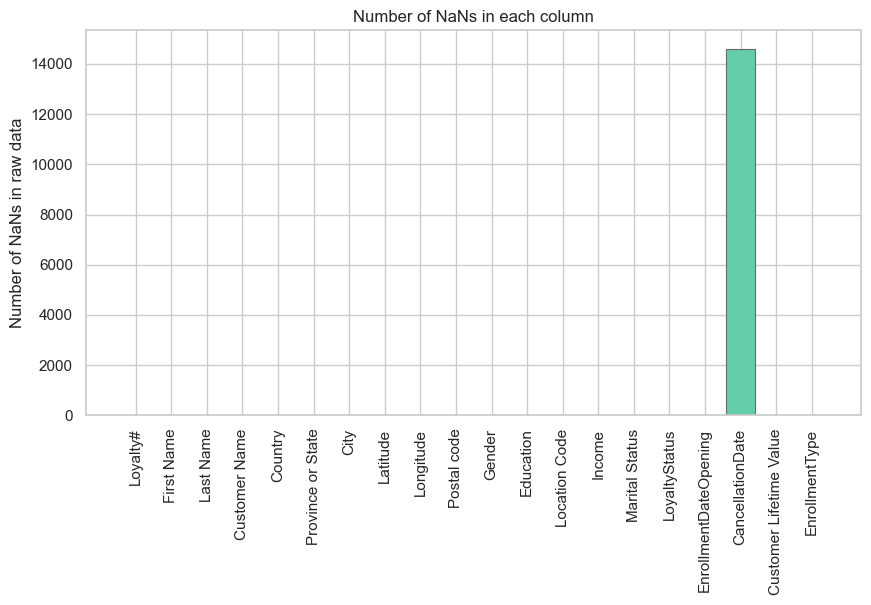

In [461]:
number_of_nans = CustomerDB.isnull().sum()
x_xis = number_of_nans.index.tolist()
plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
plt.ylabel('Number of NaNs in raw data')
plt.title('Number of NaNs in each column')
plt.bar(x=x_xis, height=number_of_nans, color='mediumaquamarine', edgecolor='dimgray', linewidth=0.8)

plt.show()

In [462]:
# Total rows
total_rows = CustomerDB.shape[0]

# Count of NaNs per column
nan_count = CustomerDB.isna().sum()

# Percentage of NaNs per column
nan_percentage = (nan_count / total_rows) * 100

# Display
nan_percentage


Loyalty#                    0.000000
First Name                  0.000000
Last Name                   0.000000
Customer Name               0.000000
Country                     0.000000
Province or State           0.000000
City                        0.000000
Latitude                    0.000000
Longitude                   0.000000
Postal code                 0.000000
Gender                      0.000000
Education                   0.000000
Location Code               0.000000
Income                      0.118196
Marital Status              0.000000
LoyaltyStatus               0.000000
EnrollmentDateOpening       0.000000
CancellationDate           86.348325
Customer Lifetime Value     0.118196
EnrollmentType              0.000000
dtype: float64

The variable CancellationDate contains approximately 86% missing values. This is expected, as missing entries correspond to active loyalty members who have not left the program. Only around 14% of customers show a valid cancellation date, indicating a relatively low churn rate across all loyalty tiers (Aurora, Nova, Star).

In [463]:
FlightsDB.isnull().sum()

Loyalty#                    0
Year                        0
Month                       0
YearMonthDate               0
NumFlights                  0
NumFlightsWithCompanions    0
DistanceKM                  0
PointsAccumulated           0
PointsRedeemed              0
DollarCostPointsRedeemed    0
dtype: int64

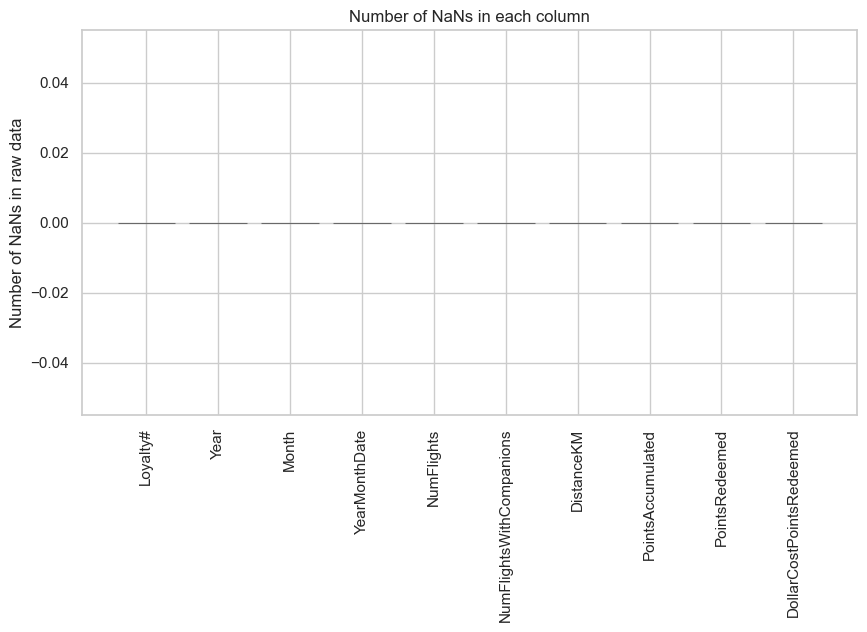

In [464]:

number_of_nans = FlightsDB.isnull().sum()
x_xis = number_of_nans.index.tolist()
plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
plt.ylabel('Number of NaNs in raw data')
plt.title('Number of NaNs in each column')
plt.bar(x=x_xis, height=number_of_nans, color='mediumaquamarine', edgecolor='dimgray', linewidth=0.8)

plt.show()

### Missing Values in CustomerDB

#### Cancellation Date



In [465]:
# Create new feature Cancelled (Y/N): if CancellationDate is null then Cancelled is "N" else "Y"
CustomerDB['Cancelled'] = np.where(CustomerDB['CancellationDate'].isna(), 'N', 'Y')

In [466]:
# create new feature called Time on Program which is the time between EnrollmentDateOpening and  CancellationDate.
# if CancellationDate is not null the compute the difference between EnrollmentDateOpening and CancellationDate
# if CancellationDate is null assume the current date is the max date of EnrollmentDateOpening
CustomerDB['EnrollmentDateOpening']= pd.to_datetime(CustomerDB['EnrollmentDateOpening'], errors='coerce')
CustomerDB['CancellationDate']= pd.to_datetime(CustomerDB['CancellationDate'], errors='coerce')

max_date = CustomerDB['EnrollmentDateOpening'].max()
CustomerDB['Time on Program'] = np.where(CustomerDB['CancellationDate'].isna(), max_date  - CustomerDB['EnrollmentDateOpening'], CustomerDB['CancellationDate'] - CustomerDB['EnrollmentDateOpening'])


In [467]:
CustomerDB.head()

Loyalty# First Name    Last Name        Customer Name Country  \
0    480934    Cecilia  Householder  Cecilia Householder  Canada   
1    549612      Dayle        Menez          Dayle Menez  Canada   
2    429460     Necole       Hannon        Necole Hannon  Canada   
3    608370      Queen        Hagee          Queen Hagee  Canada   
4    530508     Claire      Latting       Claire Latting  Canada   

  Province or State       City   Latitude   Longitude Postal code  ...  \
0           Ontario    Toronto  43.653225  -79.383186     M2Z 4K1  ...   
1           Alberta   Edmonton  53.544388 -113.490930     T3G 6Y6  ...   
2  British Columbia  Vancouver  49.282730 -123.120740     V6E 3D9  ...   
3           Ontario    Toronto  43.653225  -79.383186     P1W 1K4  ...   
4            Quebec       Hull  45.428730  -75.713364     J8Y 3Z5  ...   

  Location Code   Income Marital Status  LoyaltyStatus EnrollmentDateOpening  \
0         Urban  70146.0        Married           Star            2019-02-15   
1         Rural      0.0       Divorced           Star            2019-03-09   
2         Urban      0.0         Single           Star            2017-07-14   
3      Suburban      0.0         Single           Star            2016-02-17   
4      Suburban  97832.0        Married           Star            2017-10-25   

  CancellationDate Customer Lifetime Value  EnrollmentType  Cancelled  \
0              NaT                 3839.14        Standard          N   
1              NaT                 3839.61        Standard          N   
2       2021-01-08                 3839.75        Standard          Y   
3              NaT                 3839.75        Standard          N   
4              NaT                 3842.79  2021 Promotion          N   

  Time on Program  
0       1049 days  
1       1027 days  
2       1274 days  
3       2143 days  
4       1527 days  

[5 rows x 22 columns]

We created features to:
- Identify active clients
- Compute the time that a client is on the loyoalty program

#### Income

In [468]:
# Filter rows where Income is missing
income_nan_df = CustomerDB[CustomerDB['Income'].isna()]

# Show how many customers have missing income
print(f"Total customers with missing Income: {income_nan_df.shape[0]}")

income_nan_df.head(20)

Total customers with missing Income: 20


Loyalty# First Name Last Name    Customer Name Country  \
16901    999987      Layla    Murphy     Layla Murphy  Canada   
16902    999988       Jana    Parker      Jana Parker  Canada   
16903    999989      Ethan    Parker     Ethan Parker  Canada   
16904    999990       Ryan  Anderson    Ryan Anderson  Canada   
16905    999991     Olivia      Cote      Olivia Cote  Canada   
16906    999992       Ella       Roy         Ella Roy  Canada   
16907    999993     Elijah      Cook      Elijah Cook  Canada   
16908    999994      Ethan      Chan       Ethan Chan  Canada   
16909    999995       Liam      Wong        Liam Wong  Canada   
16910    999996   Isabella      Ross    Isabella Ross  Canada   
16911    999997      Grace    Miller     Grace Miller  Canada   
16912    999998       Noah  Thompson    Noah Thompson  Canada   
16913    999999       Noah    Walker      Noah Walker  Canada   
16914    100017      Grace    Fortin     Grace Fortin  Canada   
16915    100011     Amelia      Ross      Amelia Ross  Canada   
16916    100012      Ethan  Thompson   Ethan Thompson  Canada   
16917    100013      Layla     Young      Layla Young  Canada   
16918    100014     Amelia   Bennett   Amelia Bennett  Canada   
16919    100015   Benjamin    Wilson  Benjamin Wilson  Canada   
16920    100016       Emma    Martin      Emma Martin  Canada   

      Province or State          City   Latitude   Longitude Postal code  ...  \
16901     New Brunswick   Fredericton  46.029263  -66.565150     R4H 2Y2  ...   
16902            Quebec      Montreal  45.573672  -73.523012     N6B 1N3  ...   
16903           Ontario       Trenton  44.075379  -77.550375     P8F 5C8  ...   
16904     New Brunswick       Moncton  46.106617  -64.714267     B6P 6D0  ...   
16905     New Brunswick   Fredericton  45.950000  -66.652437     X3W 5N2  ...   
16906           Ontario       Toronto  43.706878  -79.437412     P6D 6N2  ...   
16907  British Columbia  Dawson Creek  55.701475 -120.181716     W6H 0Z7  ...   
16908           Ontario        Ottawa  45.365906  -75.723181     B2F 3E1  ...   
16909           Ontario        Ottawa  45.471557  -75.704868     B3A 2R0  ...   
16910           Ontario       Toronto  43.690489  -79.436758     B4W 4M6  ...   
16911     New Brunswick       Moncton  46.067243  -64.729480     S5R 0X5  ...   
16912            Quebec   Quebec City  46.749897  -71.238050     K7T 9I9  ...   
16913           Alberta      Edmonton  53.549353 -113.509109     S7D 0V1  ...   
16914  British Columbia  Dawson Creek  55.751178 -120.264920     E0K 5I2  ...   
16915           Ontario       Toronto  43.593187  -79.444335     W9D 4Q9  ...   
16916            Quebec   Quebec City  46.759733  -71.141009     Y0C 7D6  ...   
16917           Alberta      Edmonton  53.524829 -113.546357     L3S 9Y3  ...   
16918     New Brunswick       Moncton  46.051866  -64.825428     G2S 2B6  ...   
16919            Quebec   Quebec City  46.862970  -71.133444     B1Z 8T3  ...   
16920  British Columbia  Dawson Creek  55.720562 -120.160090     M4A 1E4  ...   

      Location Code Income Marital Status  LoyaltyStatus  \
16901         Urban    NaN         Single           Star   
16902         Rural    NaN         Single           Star   
16903         Rural    NaN        Married           Star   
16904         Rural    NaN        Married           Star   
16905      Suburban    NaN        Married           Star   
16906      Suburban    NaN         Single           Star   
16907      Suburban    NaN        Married           Star   
16908         Rural    NaN        Married           Star   
16909      Suburban    NaN        Married           Star   
16910      Suburban    NaN         Single           Star   
16911         Urban    NaN        Married           Star   
16912         Urban    NaN         Single           Star   
16913         Rural    NaN         Single           Star   
16914         Urban    NaN        Married           Star   
16915      Suburban    NaN        Marri

In [469]:
CustomerDB['Income'] = pd.to_numeric(CustomerDB['Income'], errors='coerce')

n_total = len(CustomerDB)
n_nan   = CustomerDB['Income'].isna().sum()
n_zero  = (CustomerDB['Income'] == 0).sum()

print(f"Total rows: {n_total}")
print(f"NaN Income: {n_nan}  ({n_nan/n_total:.2%})")
print(f"Zero Income: {n_zero}  ({n_zero/n_total:.2%})")

valid = n_total - n_nan
if valid > 0:
    print(f"Zero among valid (non-NaN): {n_zero}  ({n_zero/valid:.2%})")

ct_tier = pd.crosstab(CustomerDB['LoyaltyStatus'], CustomerDB['Income'].eq(0))
ct_tier.columns = ['Income!=0', 'Income==0']
display(ct_tier)
display((ct_tier.div(ct_tier.sum(axis=1), axis=0) * 100).round(2))  # percentagens por tier

negatives = (CustomerDB['Income'] < 0).sum()
print(f"Negative incomes: {negatives}")


Total rows: 16921
NaN Income: 20  (0.12%)
Zero Income: 4273  (25.25%)
Zero among valid (non-NaN): 4273  (25.28%)


Income!=0  Income==0
LoyaltyStatus                      
Aurora              2643        795
Nova                4377       1345
Star                5628       2133

Income!=0  Income==0
LoyaltyStatus                      
Aurora             76.88      23.12
Nova               76.49      23.51
Star               72.52      27.48

Negative incomes: 0


All of the 20 customers with Income equals to nan have the same date for Cancellation and Enrollment, which suggers that the customer signed up and canceled on the same day.

#### CLV

In [470]:
# Filter rows where CLV is missing
clv_missing_df = CustomerDB[CustomerDB['Customer Lifetime Value'].isna()]

# Count how many
total_clv_missing = clv_missing_df.shape[0]
print(f"Total customers with missing CLV: {total_clv_missing}")


Total customers with missing CLV: 20


Here we are comparing this 20 rows in FlightsDB

In [471]:
CustomerDB['Loyalty#'] = CustomerDB['Loyalty#'].astype(str).str.strip()
FlightsDB['Loyalty#']  = FlightsDB['Loyalty#'].astype(str).str.strip()

customers_na = CustomerDB[(CustomerDB['Income'].isna()) & (CustomerDB['Customer Lifetime Value'].isna())]

ids_na = customers_na['Loyalty#'].tolist()

flights_match = FlightsDB[FlightsDB['Loyalty#'].isin(ids_na)]

print(flights_match)

Empty DataFrame
Columns: [Loyalty#, Year, Month, YearMonthDate, NumFlights, NumFlightsWithCompanions, DistanceKM, PointsAccumulated, PointsRedeemed, DollarCostPointsRedeemed]
Index: []


In [472]:
# Replace NaN incomes and customer lifetime value with 0
CustomerDB = CustomerDB.copy()
CustomerDB['Income'] = CustomerDB['Income'].fillna(0)
CustomerDB['Customer Lifetime Value'] = CustomerDB['Customer Lifetime Value'].fillna(0)

#### What we analysed & why CLV=0 and Income=0 for those 20 cases

**What we checked**
- We normalized the join key `Loyalty#` and performed an **anti-join** to find customers who are present in the CustomerDB but have **no rows** in the FlightsDB.
- For those customers, we verified that there is **no flight activity** at all (no flights, distance, points accumulated or redeemed, nor dollar redemptions).

**Findings**
- We identified **Star-tier customers** who **enrolled and later cancelled** (based on `EnrollmentDateOpening` and `CancellationDate`) **without any recorded flight activity** during the observation window.
- Because CLV in this dataset is operationally tied to loyalty activity (points accumulated/redeemed and their dollar value), these customers have **no observable contribution** to CLV.

**Decision & rationale**
- We set `Customer Lifetime Value = 0` and `Income = 0` **only** for customers with **CLV missing** *and* **no flight activity**.
- This is a **transparent, conservative, and business-consistent** treatment: no activity → no realized (or observable) value.
- We deliberately avoided imputing a positive value (e.g., tier/country median) because that would fabricate value not supported by behavior, potentially biasing segmentation and KPIs.

**Notes**
- If a different business rule is preferred (e.g., imputing a peer median for reporting comparability), keep a flag and document it clearly as **imputed** rather than observed.
- All other customers retain their original Income and CLV values.


# Data Types
## CustomerDB
We should change the data types of the following features to datetime:

- **EnrollmentDateOpening**

- **CancellationDate**


Discuss if we change now or after

In [473]:
CustomerDB['EnrollmentDateOpening']= pd.to_datetime(CustomerDB['EnrollmentDateOpening'], errors='coerce')
CustomerDB['CancellationDate']= pd.to_datetime(CustomerDB['CancellationDate'], errors='coerce')

CustomerDB.head()

Loyalty# First Name    Last Name        Customer Name Country  \
0   480934    Cecilia  Householder  Cecilia Householder  Canada   
1   549612      Dayle        Menez          Dayle Menez  Canada   
2   429460     Necole       Hannon        Necole Hannon  Canada   
3   608370      Queen        Hagee          Queen Hagee  Canada   
4   530508     Claire      Latting       Claire Latting  Canada   

  Province or State       City   Latitude   Longitude Postal code  ...  \
0           Ontario    Toronto  43.653225  -79.383186     M2Z 4K1  ...   
1           Alberta   Edmonton  53.544388 -113.490930     T3G 6Y6  ...   
2  British Columbia  Vancouver  49.282730 -123.120740     V6E 3D9  ...   
3           Ontario    Toronto  43.653225  -79.383186     P1W 1K4  ...   
4            Quebec       Hull  45.428730  -75.713364     J8Y 3Z5  ...   

  Location Code   Income Marital Status  LoyaltyStatus EnrollmentDateOpening  \
0         Urban  70146.0        Married           Star            2019-02-15   
1         Rural      0.0       Divorced           Star            2019-03-09   
2         Urban      0.0         Single           Star            2017-07-14   
3      Suburban      0.0         Single           Star            2016-02-17   
4      Suburban  97832.0        Married           Star            2017-10-25   

  CancellationDate Customer Lifetime Value  EnrollmentType  Cancelled  \
0              NaT                 3839.14        Standard          N   
1              NaT                 3839.61        Standard          N   
2       2021-01-08                 3839.75        Standard          Y   
3              NaT                 3839.75        Standard          N   
4              NaT                 3842.79  2021 Promotion          N   

  Time on Program  
0       1049 days  
1       1027 days  
2       1274 days  
3       2143 days  
4       1527 days  

[5 rows x 22 columns]

## FlightsDB

We should change the data types of the following features:
- **NumFlights**: to int
- **NumFlightsWithCompanions**: to int
- **PointsAccumulated**: to int
- **PointsRedeemed**: to int
- **YearMonthDatr**: to datetime

In [474]:
# List of columns to convert
int_columns = ['NumFlights', 'NumFlightsWithCompanions', 'PointsAccumulated', 'PointsRedeemed']

# Convert each column to integer, using 'Int64' for nullable integers
for col in int_columns:
    FlightsDB[col] = pd.to_numeric(FlightsDB[col], errors='coerce').astype('int64')

# Convert both columns to datetime
FlightsDB['YearMonthDate'] = pd.to_datetime(
    FlightsDB['YearMonthDate'], errors='coerce'
)


# Duplicated values in the Primary Key and in all Dataset
## CustomerDB


In [475]:
# Select all fully duplicate rows (all columns must match)
fully_duplicated_rows = CustomerDB[CustomerDB.duplicated(keep=False)]

# Display the fully duplicated rows
fully_duplicated_rows

Empty DataFrame
Columns: [Loyalty#, First Name, Last Name, Customer Name, Country, Province or State, City, Latitude, Longitude, Postal code, Gender, Education, Location Code, Income, Marital Status, LoyaltyStatus, EnrollmentDateOpening, CancellationDate, Customer Lifetime Value, EnrollmentType, Cancelled, Time on Program]
Index: []

[0 rows x 22 columns]

In [476]:
# Select all columns except 'Loyalty#'
cols_except_loyalty = [c for c in CustomerDB.columns if c != 'Loyalty#']

# Find duplicated rows ignoring 'Loyalty#'
duplicates_ignore_loyalty = CustomerDB[CustomerDB.duplicated(subset=cols_except_loyalty, keep=False)]

# Optional: sort for easier inspection
duplicates_ignore_loyalty = duplicates_ignore_loyalty.sort_values(by=['First Name','Last Name','EnrollmentDateOpening'])

# Display
duplicates_ignore_loyalty


Empty DataFrame
Columns: [Loyalty#, First Name, Last Name, Customer Name, Country, Province or State, City, Latitude, Longitude, Postal code, Gender, Education, Location Code, Income, Marital Status, LoyaltyStatus, EnrollmentDateOpening, CancellationDate, Customer Lifetime Value, EnrollmentType, Cancelled, Time on Program]
Index: []

[0 rows x 22 columns]

By the shape of the dataset, the primary key should be **Loyalty#**

In [477]:
primary_key = 'Loyalty#'
unique_values = CustomerDB[primary_key].unique().shape
n_rows = CustomerDB[primary_key].shape [0]
if unique_values != n_rows:
    print('oh no! there are repetitions!')
else:
    print("all good! no repetitions!")

oh no! there are repetitions!


In [478]:
# Select all rows with duplicated Loyalty#
duplicated_loyalty = CustomerDB[CustomerDB['Loyalty#'].duplicated(keep=False)]

# Sort by Loyalty# and EnrollmentDateOpening
duplicated_loyalty_sorted = duplicated_loyalty.sort_values(by=['Loyalty#', 'EnrollmentDateOpening'])

# Display the result
duplicated_loyalty_sorted

Loyalty# First Name    Last Name       Customer Name Country  \
1646    101902       Hans  Schlottmann    Hans Schlottmann  Canada   
2668    101902         Yi        Nesti            Yi Nesti  Canada   
15988   106001     Maudie       Hyland       Maudie Hyland  Canada   
700     106001     Ivette       Peifer       Ivette Peifer  Canada   
9413    106509    Ardelia   Whitehorse  Ardelia Whitehorse  Canada   
...        ...        ...          ...                 ...     ...   
5038    989528     Sharri     Boughman     Sharri Boughman  Canada   
9890    990512      Magda       Sopher        Magda Sopher  Canada   
14478   990512       Ione      Snowden        Ione Snowden  Canada   
6981    992168  Frederick       Samaha    Frederick Samaha  Canada   
16380   992168     Crysta       Bennin       Crysta Bennin  Canada   

      Province or State         City   Latitude   Longitude Postal code  ...  \
1646            Ontario       London  42.984924  -81.245277     M5B 3E4  ...   
2668            Ontario      Toronto  43.653225  -79.383186     M8Y 4K8  ...   
15988     New Brunswick  Fredericton  45.963589  -66.643112     E3B 2H2  ...   
700              Quebec     Montreal  45.501690  -73.567253     H2Y 4R4  ...   
9413            Ontario      Toronto  43.653225  -79.383186     M8Y 4K8  ...   
...                 ...          ...        ...         ...         ...  ...   
5038             Quebec     Montreal  45.501690  -73.567253     H2T 2J6  ...   
9890            Ontario      Toronto  43.653225  -79.383186     P1W 1K4  ...   
14478  British Columbia    Vancouver  49.282730 -123.120740     V5R 1W3  ...   
6981            Ontario      Toronto  43.653225  -79.383186     P1J 8T7  ...   
16380           Ontario       Ottawa  45.421532  -75.697189     K1F 2R2  ...   

      Location Code   Income Marital Status  LoyaltyStatus  \
1646          Rural      0.0        Married         Aurora   
2668          Urban  79090.0        Married         Aurora   
15988      Suburban  14973.0       Divorced           Star   
700        Suburban  10037.0         Single           Star   
9413          Rural  30915.0        Married           Nova   
...             ...      ...            ...            ...   
5038          Rural      0.0       Divorced           Nova   
9890       Suburban      0.0         Single           Star   
14478         Urban      0.0         Single           Star   
6981       Suburban  22906.0        Married           Nova   
16380         Urban  22828.0        Married           Star   

      EnrollmentDateOpening CancellationDate Customer Lifetime Value  \
1646             2020-01-07              NaT                 6265.34   
2668             2020-03-19              NaT                 8609.16   
15988            2015-07-16              NaT                12168.74   
700              2016-01-11              NaT                 4914.04   
9413             2020-04-25       2021-10-07                16727.77   
...                     ...              ...                     ...   
5038             2020-05-01              NaT                 3370.07   
9890             2018-10-21              NaT                 1904.00   
14478            2021-08-20              NaT                 6870.61   
6981             2015-09-26              NaT                 5746.33   
16380            2017-12-18              NaT                16473.17   

      EnrollmentType  Cancelled Time on Program  
1646        Standard          N        723 days  
2668        Standard          N        651 days  
15988       Standard          N       2359 days  
700         Standard          N       2180 days  
9413        Standard          Y        530 days  
...              ...        ...             ...  
5038        Standard          N        608 days  
9890        Standard          N       1166 days  
14478       Standard          N        132 days  
6981        Standard          N       2287 days  
16380       Standard          N       1473 d

In [479]:
# Find duplicated combinations
duplicates = CustomerDB.groupby(['Loyalty#', 'EnrollmentDateOpening']).size().reset_index(name='count')
duplicates = duplicates[duplicates['count'] > 1]

print("Duplicated combinations:")
print(duplicates)

Duplicated combinations:
Empty DataFrame
Columns: [Loyalty#, EnrollmentDateOpening, count]
Index: []


In [480]:
# Count occurrences of each Loyalty#
loyalty_counts = CustomerDB['Loyalty#'].value_counts()

# Filter Loyalty# that appear more than 3 times
loyalty_repeated = loyalty_counts[loyalty_counts > 3]

print("Loyalty# appearing more than 3 times:")
print(loyalty_repeated)

Loyalty# appearing more than 3 times:
Series([], Name: count, dtype: int64)


In [481]:
num_removed = len(duplicated_loyalty)
print(f"Rowws that will be removed: {num_removed}")

duplicated_loyalty_list = duplicated_loyalty['Loyalty#'].tolist()  # se for DataFrame


CustomerDB = CustomerDB[~CustomerDB['Loyalty#'].isin(duplicated_loyalty_list)]


Rowws that will be removed: 327


In [482]:
duplicated_loyalty_filtered = duplicated_loyalty[duplicated_loyalty['CancellationDate'].isna()]
duplicated_loyalty_filtered.to_csv('duplicated_loyalty_filtered.csv')


In [483]:
merged_duplicated_flights = pd.merge(
    duplicated_loyalty_filtered,
    FlightsDB,
    how='inner',
    on='Loyalty#'
)

merged_duplicated_flights.to_csv('merged_duplicated_flights.csv', index=False)


#### What we analysed in duplicated rows

**Findings**
- We identified rows in CustomerDB with the same **Loyalty#** but different values in the other features.
- The maximum number of rows with the same **Loyalty#** is 2

**Decision & rationale**
- First, we removed all rows in CustomerDB with duplicated **Loyalty#**.
- We saved the 284 remaining duplicate rows to a CSV file, excluding those where **CancellationDate** is not null. These rows were saved because, upon inspection, we did not find any information that would allow us to determine which record should be retained over the other. Essentially, there was no objective criterion to choose between the duplicate customers.
- For the next delivery, we plan to analyze these duplicates in more detail by examining their respective clusters. This will allow us to make informed decisions for each case where multiple customers share the same **Loyalty#**.


## FlightsDB

In [484]:
# Find fully duplicated rows (identical across all columns)
duplicate_rows = FlightsDB[FlightsDB.duplicated(keep='first')]

# Print the number of fully duplicated rows
print(f"Number of fully duplicated rows: {duplicate_rows.shape[0]}")

# Display the first few duplicated rows
duplicate_rows.head()


Number of fully duplicated rows: 2903


Loyalty#  Year  Month YearMonthDate  NumFlights  \
3150   263267  2020      6    2020-06-01           0   
3442   584833  2020      6    2020-06-01           0   
5193   351615  2020      5    2020-05-01           0   
5371   979115  2020      5    2020-05-01           0   
5397   951353  2020      5    2020-05-01           0   

      NumFlightsWithCompanions  DistanceKM  PointsAccumulated  PointsRedeemed  \
3150                         0         0.0                  0               0   
3442                         0         0.0                  0               0   
5193                         0         0.0                  0               0   
5371                         0         0.0                  0               0   
5397                         0         0.0                  0               0   

      DollarCostPointsRedeemed  
3150                       0.0  
3442                       0.0  
5193                       0.0  
5371                       0.0  
5397                       0.0

In [485]:
num_duplicates = duplicate_rows.shape[0]
total_rows = FlightsDB.shape[0]
percentage_duplicates = (num_duplicates / total_rows) * 100
print(f"Percentage of fully duplicated rows: {percentage_duplicates:.2f}%")

Percentage of fully duplicated rows: 0.48%


In [486]:
dupe_patterns = (
    FlightsDB
      .value_counts()
      .reset_index(name='count')
      .query('count > 1')
      .sort_values('count', ascending=False)
)
print(f"Distinct duplicated patterns: {len(dupe_patterns)}")
display(dupe_patterns.head(10))


Distinct duplicated patterns: 2875


Loyalty#  Year  Month YearMonthDate  NumFlights  NumFlightsWithCompanions  \
11   678205  2019     12    2019-12-01           0                         0   
12   678205  2020      1    2020-01-01           0                         0   
13   678205  2020      2    2020-02-01           0                         0   
14   678205  2020      3    2020-03-01           0                         0   
15   678205  2020      4    2020-04-01           0                         0   
16   678205  2020      5    2020-05-01           0                         0   
17   678205  2020      6    2020-06-01           0                         0   
18   678205  2020      7    2020-07-01           0                         0   
19   678205  2020      8    2020-08-01           0                         0   
20   678205  2020      9    2020-09-01           0                         0   

    DistanceKM  PointsAccumulated  PointsRedeemed  DollarCostPointsRedeemed  \
11         0.0                  0               0                       0.0   
12         0.0                  0               0                       0.0   
13         0.0                  0               0                       0.0   
14         0.0                  0               0                       0.0   
15         0.0                  0               0                       0.0   
16         0.0                  0               0                       0.0   
17         0.0                  0               0                       0.0   
18         0.0                  0               0                       0.0   
19         0.0                  0               0                       0.0   
20         0.0                  0               0                       0.0   

    count  
11      3  
12      3  
13      3  
14      3  
15      3  
16      3  
17      3  
18      3  
19      3  
20      3

In [487]:
# Remove fully duplicated rows (keeping only the first occurrence)
FlightsDB =FlightsDB.copy()
FlightsDB = FlightsDB.drop_duplicates(keep='first')

# Confirm the result
print(f"New number of rows after removing duplicates: {FlightsDB.shape[0]}")
FlightsDB.duplicated().sum()

New number of rows after removing duplicates: 605533


np.int64(0)

In [488]:
# Count how many unique months exist per (Loyalty#, Year)
month_counts = (
    FlightsDB.groupby(['Loyalty#', 'Year'])['Month']
    .nunique()
    .reset_index(name='MonthCount')
)

# Show only those that don't have all 12 months
incomplete = month_counts[month_counts['MonthCount'] < 12]
problem = month_counts[month_counts['MonthCount'] >12]
print(incomplete)
print(problem)

Empty DataFrame
Columns: [Loyalty#, Year, MonthCount]
Index: []
Empty DataFrame
Columns: [Loyalty#, Year, MonthCount]
Index: []


# Consistency in Features and Between Features
## Loyalty# between FlightsDB and CustomerDB

In [489]:
# Get unique loyalty IDs from both dataframes

CustomerDB = CustomerDB.copy()
FlightsDB = FlightsDB.copy()

loy_customer = set(CustomerDB['Loyalty#'].unique())
loy_flights = set(FlightsDB['Loyalty#'].unique())

print(f"CustomerDB has {len(loy_customer)} unique loyalty IDs.")
print(f"FlightsDB has {len(loy_flights)} unique loyalty IDs.")
if loy_customer == loy_flights:
    print("✅ Both datasets have exactly the same Loyalty# IDs.")
else:
    print("❌ The sets of Loyalty# are not identical.")



CustomerDB has 16594 unique loyalty IDs.
FlightsDB has 16737 unique loyalty IDs.
❌ The sets of Loyalty# are not identical.


In [490]:
# IDs that are in FlightsDB but not in CustomerDB
extra_in_flights = loy_flights - loy_customer

# IDs that are in CustomerDB but not in FlightsDB
extra_in_customers = loy_customer - loy_flights

print(f"Loyalty# only in FlightsDB: {len(extra_in_flights)}")
print(f"Loyalty# only in CustomerDB: {len(extra_in_customers)}")

# Optionally, see a few examples
print("\nExamples only in FlightsDB:", list(extra_in_flights)[:10])
print("Examples only in CustomerDB:", list(extra_in_customers)[:10])

summary = pd.DataFrame({
    'Only_in_CustomerDB': [len(extra_in_customers)],
    'Only_in_FlightsDB': [len(extra_in_flights)],
    'In_Both': [len(loy_customer & loy_flights)]
})

print(summary)


Loyalty# only in FlightsDB: 163
Loyalty# only in CustomerDB: 20

Examples only in FlightsDB: ['304600', '511862', '237094', '700650', '499874', '920175', '444092', '464256', '342945', '972686']
Examples only in CustomerDB: ['999997', '100016', '100017', '999999', '999991', '999994', '100015', '999996', '100011', '999995']
   Only_in_CustomerDB  Only_in_FlightsDB  In_Both
0                  20                163    16574


The 20 rows corresponds to the ones where CLV and Income are equal to 0 and customers cancellation date and enrollment date are the same.

## CustomerDB

In [491]:
numerical_columns_customer = CustomerDB.select_dtypes(include=['number']).columns.tolist()
categorical_columns_customer = CustomerDB.select_dtypes(exclude=['number']).columns.tolist()

for col in numerical_columns_customer:
    print(f"---{col}---")
    print(CustomerDB[col].unique())
    print()

---Latitude---
[43.653225 53.544388 49.28273  45.42873  44.101128 45.50169  55.759628
 46.813877 46.087818 45.963589 45.421532 46.118462 51.048615 50.116322
 48.380894 56.23418  49.895138 46.522099 49.328625 44.648766 42.984924
 48.428421 50.44521  49.887951 47.561508 44.231171 51.178398 60.721188
 46.238239 46.029263 45.573672 44.075379 46.106617 45.95     43.706878
 55.701475 45.365906 45.471557 43.690489 46.067243 46.749897 53.549353
 55.751178 43.593187 46.759733 53.524829 46.051866 46.86297  55.720562]

---Longitude---
[ -79.383186 -113.49093  -123.12074   -75.713364  -77.576309  -73.567253
 -120.23766   -71.207977  -64.778229  -66.643112  -75.697189  -74.596184
 -114.07085  -122.95736   -89.247681 -117.28938   -97.138374  -80.953033
 -123.16019   -63.575237  -81.245277 -123.36565  -104.6189   -119.49601
  -52.712578  -76.485954 -115.5708   -135.05684   -63.131069  -66.56515
  -73.523012  -77.550375  -64.714267  -66.652437  -79.437412 -120.181716
  -75.723181  -75.704868  -79.4367

In [492]:
for col in categorical_columns_customer:
    print(f"---{col}---")
    print(CustomerDB[col].unique())
    print()

---Loyalty#---
['480934' '549612' '429460' ... '100014' '100015' '100016']

---First Name---
['Cecilia' 'Dayle' 'Necole' ... 'Juliann' 'Olivia' 'Liam']

---Last Name---
['Householder' 'Menez' 'Hannon' ... 'Bennett' 'Wilson' 'Martin']

---Customer Name---
['Cecilia Householder' 'Dayle Menez' 'Necole Hannon' ... 'Amelia Bennett'
 'Benjamin Wilson' 'Emma Martin']

---Country---
['Canada']

---Province or State---
['Ontario' 'Alberta' 'British Columbia' 'Quebec' 'New Brunswick'
 'Manitoba' 'Nova Scotia' 'Saskatchewan' 'Newfoundland' 'Yukon'
 'Prince Edward Island']

---City---
['Toronto' 'Edmonton' 'Vancouver' 'Hull' 'Trenton' 'Montreal'
 'Dawson Creek' 'Quebec City' 'Moncton' 'Fredericton' 'Ottawa' 'Tremblant'
 'Calgary' 'Whistler' 'Thunder Bay' 'Peace River' 'Winnipeg' 'Sudbury'
 'West Vancouver' 'Halifax' 'London' 'Victoria' 'Regina' 'Kelowna'
 "St. John's" 'Kingston' 'Banff' 'Whitehorse' 'Charlottetown']

---Postal code---
['M2Z 4K1' 'T3G 6Y6' 'V6E 3D9' 'P1W 1K4' 'J8Y 3Z5' 'P5S 6R4' 'K

### Gender

In [493]:
CustomerDB['Gender'] = CustomerDB['Gender'].str.capitalize()

### Postal Code

In [494]:
pattern = r'^[A-Z]\d[A-Z] \d[A-Z]\d$'

invalid_postal = CustomerDB[~CustomerDB['Postal code'].str.match(pattern, na=False)]
unique_invalid = invalid_postal[['Postal code', 'Province or State']].drop_duplicates()

print(unique_invalid)

    Postal code Province or State
73      V10 6T5  British Columbia
110     V09 2E9  British Columbia


### First Name, Last Name and Customer Name

In [495]:
# Clean spaces
CustomerDB['First Name'] = CustomerDB['First Name'].str.strip()
CustomerDB['Last Name'] = CustomerDB['Last Name'].str.strip()
CustomerDB['Customer Name'] = CustomerDB['Customer Name'].str.strip()

# Updated pattern (allows accents, hyphens, apostrophes, spaces)
pattern = r'^[A-Z][A-Za-zÀ-ÿ\' -]*$'

invalid_names = CustomerDB[
    ~CustomerDB['First Name'].fillna('').str.match(pattern) |
    ~CustomerDB['Last Name'].fillna('').str.match(pattern) |
    ~CustomerDB['Customer Name'].fillna('').str.match(pattern)
]

print(invalid_names[['Loyalty#', 'First Name', 'Last Name', 'Customer Name']].drop_duplicates())


Empty DataFrame
Columns: [Loyalty#, First Name, Last Name, Customer Name]
Index: []


### Latitude, Loyalty#, Longitude, Income, CLV and YearActive

In [496]:
# Define expected ranges for each column
rules = {
    'Loyalty#': lambda x: x >= 0,
    'Latitude': lambda x: (x >= -90) & (x <= 90),
    'Longitude': lambda x: (x >= -180) & (x <= 180),
    'Income': lambda x: x >= 0,
    'Customer Lifetime Value': lambda x: x >= 0,
    'Time on Program': lambda x: x >= pd.Timedelta(0)
}

# Check each column
for col in numerical_columns_customer:
    invalid_rows = CustomerDB[~rules[col](CustomerDB[col])]
    print(f"--- {col} ---")
    if invalid_rows.empty:
        print("All values are consistent ✅\n")
    else:
        print(f"Inconsistent values found ({len(invalid_rows)} rows):")
        print(invalid_rows[[col]])
        print("\n")


--- Latitude ---
All values are consistent ✅

--- Longitude ---
All values are consistent ✅

--- Income ---
All values are consistent ✅

--- Customer Lifetime Value ---
All values are consistent ✅

--- Time on Program ---
Inconsistent values found (199 rows):
      Time on Program
72          -854 days
77          -853 days
176         -853 days
210         -851 days
304         -853 days
...               ...
16514       -853 days
16522       -853 days
16551       -853 days
16634       -853 days
16757       -853 days

[199 rows x 1 columns]




We find 199 cases where CancellationDate happens before EnrolmentDateOpening. There is a pattern to rhis inconsistency as the difference between the dates is 853 dats approx. There may have been a proactive client recovery strategy to reactivate clients who cancelled after a given number of days.

### Customer Name

In [497]:
CustomerDB = CustomerDB.copy()

# Compare "Customer Name" directly with First + Last Name (stripped)
name_inconsistencies = CustomerDB[
    CustomerDB['Customer Name'].str.strip()
    != (CustomerDB['First Name'].str.strip() + ' ' + CustomerDB['Last Name'].str.strip())
]

# Display results
if name_inconsistencies.empty:
    print("All names are correct")
else:
    print("Please review these rows:")
    print(name_inconsistencies[['Loyalty#', 'First Name', 'Last Name', 'Customer Name']])


All names are correct


In [498]:

# Find duplicated names
duplicates_names = CustomerDB[CustomerDB.duplicated(subset='Customer Name', keep=False)]

# Sort for easier inspection
duplicates_names = duplicates_names.sort_values(by='Customer Name')

duplicates_names[['Loyalty#','First Name','Last Name','Customer Name','EnrollmentDateOpening']]


Empty DataFrame
Columns: [Loyalty#, First Name, Last Name, Customer Name, EnrollmentDateOpening]
Index: []

### Latitude and Longitude

We are asking geopy to look up to the city and return the latitude and longitude.

In [499]:
from geopy.geocoders import Nominatim
import time

CustomerDB=CustomerDB.copy()

# Initialize geolocator with a longer timeout
geolocator = Nominatim(user_agent="geo_check", timeout=10)

# Function to safely geocode with exception handling
def safe_geocode(query):
    try:
        return geolocator.geocode(query)
    except:
        return None

# Get unique city/province combinations
unique_locations = CustomerDB[['City', 'Province or State']].drop_duplicates()
location_dict = {}

for _, row in unique_locations.iterrows():
    query = f"{row['City']}, {row['Province or State']}"
    loc = safe_geocode(query)
    if loc:
        location_dict[(row['City'], row['Province or State'])] = (loc.latitude, loc.longitude)
    else:
        location_dict[(row['City'], row['Province or State'])] = (None, None)
    time.sleep(1)  # wait 1 second between requests to avoid overload

# Print results
for k, v in location_dict.items():
    print(k, v)


('Toronto', 'Ontario') (43.6534817, -79.3839347)
('Edmonton', 'Alberta') (53.5462055, -113.491241)
('Vancouver', 'British Columbia') (49.2608724, -123.113952)
('Hull', 'Quebec') (45.4405842, -75.7326823)
('Trenton', 'Ontario') (44.1019126, -77.57539)
('Montreal', 'Quebec') (45.5031824, -73.5698065)
('Dawson Creek', 'British Columbia') (55.7605306, -120.2364453)
('Quebec City', 'Quebec') (46.8137431, -71.2084061)
('Moncton', 'New Brunswick') (46.0985679, -64.8004265)
('Fredericton', 'New Brunswick') (45.963233, -66.6432356)
('Ottawa', 'Ontario') (45.4208777, -75.6901106)
('Tremblant', 'Quebec') (46.2096904, -74.5859231)
('Calgary', 'Alberta') (51.0456064, -114.057541)
('Whistler', 'British Columbia') (50.1171903, -122.9543022)
('Thunder Bay', 'Ontario') (48.406414, -89.259796)
('Peace River', 'Alberta') (56.2337111, -117.2910839)
('Winnipeg', 'Manitoba') (49.8955367, -97.1384584)
('Sudbury', 'Ontario') (46.49272, -80.991211)
('West Vancouver', 'British Columbia') (49.3311208, -123.15947

In [500]:
from math import radians, cos, sin, asin, sqrt

# Haversine distance function
def haversine(lon1, lat1, lon2, lat2):
    if None in [lon1, lat1, lon2, lat2]:
        return None
    # convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    c = 2 * asin(sqrt(a))
    r = 6371  # Radius of Earth in km
    return c * r

# Compute mismatches dynamically — no extra columns
def find_coordinate_mismatches(df, location_dict, threshold_km=10):
    mismatches = []

    for idx, row in df.iterrows():
        ref_lat, ref_lon = location_dict.get((row['City'], row['Province or State']), (None, None))
        if pd.notna(row['Latitude']) and pd.notna(row['Longitude']) and ref_lat and ref_lon:
            distance = haversine(row['Longitude'], row['Latitude'], ref_lon, ref_lat)
            if distance is not None and distance > threshold_km:
                mismatches.append({
                    'City': row['City'],
                    'Province or State': row['Province or State'],
                    'Latitude': row['Latitude'],
                    'Longitude': row['Longitude'],
                    'distance_to_ref_km': round(distance, 2)
                })
    return pd.DataFrame(mismatches)

# Run mismatch detection
mismatches_df = find_coordinate_mismatches(CustomerDB, location_dict)

print(f"Total mismatches: {len(mismatches_df)}")
print(mismatches_df.head())



Total mismatches: 390
        City Province or State   Latitude  Longitude  distance_to_ref_km
0  Tremblant            Quebec  46.118462 -74.596184               10.17
1  Tremblant            Quebec  46.118462 -74.596184               10.17
2  Tremblant            Quebec  46.118462 -74.596184               10.17
3  Tremblant            Quebec  46.118462 -74.596184               10.17
4  Tremblant            Quebec  46.118462 -74.596184               10.17


We can check that we have 399 rows with latitude and longitude inconsistent, and all belongs to the same City that is Tremblant, Quebec.

Since the distance is not that big and it's the same city, we will not do anything and we will keep just the way as it is.


### Loyalty Status (Star > Nova > Aurora)

In [501]:
CustomerDB = CustomerDB.copy()

tier_order = {"Aurora": 1, "Nova": 2, "Star": 3}


# 2. Basic statistics by tier
tier_counts = CustomerDB["LoyaltyStatus"].value_counts()
print("\nCounts per tier:\n", tier_counts)

# 3. Identify “high-tier” customers with low activity 
high_tier_low_activity = CustomerDB[
    (CustomerDB["LoyaltyStatus"] == "Star") &
    (CustomerDB["Customer Lifetime Value"] <= 0)
]

print("\nHigh-tier customers with very low activity:\n", high_tier_low_activity)



Counts per tier:
 LoyaltyStatus
Star      7618
Nova      5611
Aurora    3365
Name: count, dtype: int64

High-tier customers with very low activity:
       Loyalty# First Name Last Name    Customer Name Country  \
16901   999987      Layla    Murphy     Layla Murphy  Canada   
16902   999988       Jana    Parker      Jana Parker  Canada   
16903   999989      Ethan    Parker     Ethan Parker  Canada   
16904   999990       Ryan  Anderson    Ryan Anderson  Canada   
16905   999991     Olivia      Cote      Olivia Cote  Canada   
16906   999992       Ella       Roy         Ella Roy  Canada   
16907   999993     Elijah      Cook      Elijah Cook  Canada   
16908   999994      Ethan      Chan       Ethan Chan  Canada   
16909   999995       Liam      Wong        Liam Wong  Canada   
16910   999996   Isabella      Ross    Isabella Ross  Canada   
16911   999997      Grace    Miller     Grace Miller  Canada   
16912   999998       Noah  Thompson    Noah Thompson  Canada   
16913   999999    

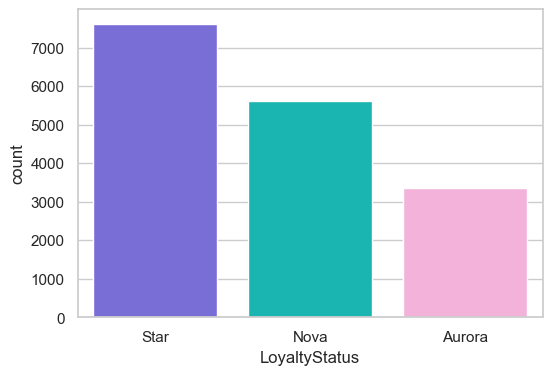

In [502]:
plt.figure(figsize=(6, 4))
sns.countplot(
    data=CustomerDB,
    x="LoyaltyStatus",
    order=["Star", "Nova", "Aurora"],
    palette=["#6C5CE7", "#00CEC9", "#FDA7DC"]  # elegant purple-teal-pink palette
)
plt.show()

In [503]:
# Count the number of customers per loyalty tier
tier_counts = CustomerDB['LoyaltyStatus'].value_counts().reindex(["Aurora", "Nova", "Star"], fill_value=0)

# Calculate percentage
tier_percentages = (tier_counts / len(CustomerDB) * 100).round(2)

# Combine into a summary table
loyalty_summary_table = pd.DataFrame({
    'Count': tier_counts,
    'Percentage (%)': tier_percentages
})

print(loyalty_summary_table)


               Count  Percentage (%)
LoyaltyStatus                       
Aurora          3365           20.28
Nova            5611           33.81
Star            7618           45.91


### Income and Customer Lifetime Value

In [504]:

income_clv = CustomerDB[['Income', 'Customer Lifetime Value']].dropna()
threshold_income = income_clv['Income'].quantile(0.1)
threshold_clv = income_clv['Customer Lifetime Value'].quantile(0.9)
suspicious = CustomerDB[
    (CustomerDB['Income'] < threshold_income) &
    (CustomerDB['Customer Lifetime Value'] > threshold_clv)
]

print(f"\nPossible inconsistencies found: {len(suspicious)} customers")
display(suspicious[['Loyalty#', 'Income', 'Customer Lifetime Value']].head(10))


Possible inconsistencies found: 0 customers


Empty DataFrame
Columns: [Loyalty#, Income, Customer Lifetime Value]
Index: []

For **CustomerDB** dataset we checked some inconsistencies:

- We have some rows where **Cancellation Date** is smaller than **Enrollment Date Opening**
- **Latitude** and **Longitude** who don't match with the city or province,
- Some High-tier customers with very low activity


## FlightsDB

In [505]:
numerical_columns_flights = FlightsDB.select_dtypes(include=['number']).columns.tolist()
categorical_columns_flights = FlightsDB.select_dtypes(exclude=['number']).columns.tolist()

for col in numerical_columns_flights:
    print(f"---{col}---")
    print(FlightsDB[col].unique())
    print()

---Year---
[2021 2020 2019]

---Month---
[12  6  5  4  3  2  1 11 10  9  8  7]

---NumFlights---
[ 2  0 10 16  9 12 17  6 11  7  3 13 14  8  5  4  1 15 18 20 19 21]

---NumFlightsWithCompanions---
[ 2  0  3  4  7  9  5  6  1  8 10 11]

---DistanceKM---
[ 9384.      0.  14745.  ... 11732.4 31998.6 26789.4]

---PointsAccumulated---
[ 938    0 1474 ... 4107   23   21]

---PointsRedeemed---
[   0 3213 4638 ... 5691 4598 5527]

---DollarCostPointsRedeemed---
[ 0.  32.  46.  40.  51.  62.  48.  50.  59.  43.  37.  41.  53.  56.
 31.  30.  63.  33.  44.  58.  60.  57.  36.  29.  42.  54.  45.  35.
 67.  39.  65.  34.  61.  66.  38.  47.  55.  68.  69.  64.  52.  49.
 71.  72.  27.  28.  70.  25.  26.  24.  23.  21.  22.  74.  73.  32.4
 36.9 27.9 21.6 26.1 31.5 33.3 22.5 40.5 28.8 37.8 24.3 20.7 29.7 30.6
 35.1 25.2 23.4 34.2 41.4 39.6 19.8 38.7 18.9 51.3 42.3 52.2 50.4 45.9
 47.7 48.6 43.2 46.8 44.1 49.5 53.1 57.6 60.3 62.1 54.9 58.5 55.8 56.7
 63.9 61.2 64.8 59.4 65.7 66.6]



In [506]:
for col in categorical_columns_flights:
    print(f"---{col}---")
    print(FlightsDB[col].unique())
    print()

---Loyalty#---
['413052' '464105' '681785' ... '144328' '179042' '854855']

---YearMonthDate---
<DatetimeArray>
['2021-12-01 00:00:00', '2020-06-01 00:00:00', '2020-05-01 00:00:00',
 '2020-04-01 00:00:00', '2020-03-01 00:00:00', '2020-02-01 00:00:00',
 '2020-01-01 00:00:00', '2021-11-01 00:00:00', '2021-10-01 00:00:00',
 '2021-06-01 00:00:00', '2021-09-01 00:00:00', '2021-05-01 00:00:00',
 '2021-04-01 00:00:00', '2021-08-01 00:00:00', '2021-07-01 00:00:00',
 '2021-03-01 00:00:00', '2021-02-01 00:00:00', '2021-01-01 00:00:00',
 '2020-12-01 00:00:00', '2020-11-01 00:00:00', '2020-10-01 00:00:00',
 '2020-09-01 00:00:00', '2020-08-01 00:00:00', '2020-07-01 00:00:00',
 '2019-01-01 00:00:00', '2019-02-01 00:00:00', '2019-03-01 00:00:00',
 '2019-04-01 00:00:00', '2019-05-01 00:00:00', '2019-06-01 00:00:00',
 '2019-07-01 00:00:00', '2019-08-01 00:00:00', '2019-09-01 00:00:00',
 '2019-10-01 00:00:00', '2019-11-01 00:00:00', '2019-12-01 00:00:00']
Length: 36, dtype: datetime64[ns]



### Month

In [507]:
# Check months are between 1 and 12
invalid_months = FlightsDB[(FlightsDB['Month'] < 1) | (FlightsDB['Month'] > 12)]
print("Invalid months (should be 1-12):")
print(invalid_months[['YearMonthDate', 'Month']])


Invalid months (should be 1-12):
Empty DataFrame
Columns: [YearMonthDate, Month]
Index: []


### YearMonthDate

In [508]:
# Extract date components without modifying the original DataFrame
month = FlightsDB['YearMonthDate'].dt.month
day = FlightsDB['YearMonthDate'].dt.day
year = FlightsDB['YearMonthDate'].dt.year

# Check validity
invalid_months = FlightsDB[(month < 1) | (month > 12)]
invalid_days = FlightsDB[(day < 1) | (day > 31)]
invalid_years = FlightsDB[~year.isin([2019, 2020, 2021])]

# Print only relevant columns
print("Invalid months:\n", invalid_months[['YearMonthDate']])
print("Invalid days:\n", invalid_days[['YearMonthDate']])
print("Invalid years (should only be 2019, 2020, 2021):\n", invalid_years[['YearMonthDate']])

# Summary of results
total_issues = len(invalid_months) + len(invalid_days) + len(invalid_years)

if total_issues == 0:
    print("✅ All dates appear valid.")
else:
    print(f"⚠️ Invalid date components detected: {total_issues} issues.")


Invalid months:
 Empty DataFrame
Columns: [YearMonthDate]
Index: []
Invalid days:
 Empty DataFrame
Columns: [YearMonthDate]
Index: []
Invalid years (should only be 2019, 2020, 2021):
 Empty DataFrame
Columns: [YearMonthDate]
Index: []
✅ All dates appear valid.


### Numerical Features > 0

In [509]:
invalid_numeric = FlightsDB[(FlightsDB[numerical_columns_flights] < 0).any(axis=1)]

print("\nRows with negative numeric values:")
print(invalid_numeric[['YearMonthDate'] + numerical_columns_flights])

# Summary
if invalid_months.empty and invalid_numeric.empty:
    print("\nAll months and numeric values are valid.")
else:
    print(f"\nFound {len(invalid_months)} invalid months and {len(invalid_numeric)} rows with negative numeric values.")


Rows with negative numeric values:
Empty DataFrame
Columns: [YearMonthDate, Year, Month, NumFlights, NumFlightsWithCompanions, DistanceKM, PointsAccumulated, PointsRedeemed, DollarCostPointsRedeemed]
Index: []

All months and numeric values are valid.


### Points Accumulated and Points Redeemed

In [510]:
# Group by Loyalty# and sum the relevant numeric columns
FlightsDB = FlightsDB.copy()

loyalty_summary = FlightsDB.groupby('Loyalty#').agg({
    'PointsAccumulated': 'sum',
    'PointsRedeemed': 'sum',
    'NumFlights': 'sum',
    'NumFlightsWithCompanions': 'sum',
    'DistanceKM': 'sum'
}).reset_index()

# Check points consistency: PointsAccumulated >= PointsRedeemed
loyalty_summary['points_consistent'] = loyalty_summary['PointsAccumulated'] >= loyalty_summary['PointsRedeemed']

# Identify rows where consistency fails
points_issues = loyalty_summary[loyalty_summary['points_consistent'] == False]

print("Loyalty# with Points Issues (Accumulated < Redeemed):")

print(f"Customers with points violations: {len(points_issues)}")
points_issues.head()



Loyalty# with Points Issues (Accumulated < Redeemed):
Customers with points violations: 458


Loyalty#  PointsAccumulated  PointsRedeemed  NumFlights  \
81    103975               5457            9014          50   
120   106444              12108           12947          47   
170   108857               8036           10549          44   
174   109023              21902           25590         165   
299   116238               6771            6798          48   

     NumFlightsWithCompanions  DistanceKM  points_consistent  
81                         11     54588.0              False  
120                        10    121106.0              False  
170                        10     80398.9              False  
174                        41    219114.3              False  
299                        14     67729.0              False

In [511]:
num_customers_with_issues = len(points_issues)
print(f"Number of customers with points issues: {num_customers_with_issues}")
total_customers = FlightsDB['Loyalty#'].nunique()
print(f"Total number of customers: {total_customers}")
percentage_with_issues = (num_customers_with_issues / total_customers) * 100
print(f"Percentage of customers with points issues: {percentage_with_issues:.2f}%")


Number of customers with points issues: 458
Total number of customers: 16737
Percentage of customers with points issues: 2.74%


In [512]:
# --- Step 1: Identify loyalty IDs with issues ---
loyalty_ids_with_issues = points_issues['Loyalty#'].unique()

print(f"Total customers with inconsistent points: {len(loyalty_ids_with_issues)}")

# --- Step 2: Filter FlightsDB for those customers ---
flights_with_issues = FlightsDB[FlightsDB['Loyalty#'].isin(loyalty_ids_with_issues)]

print(f"Total flight records for inconsistent customers: {len(flights_with_issues)}")


# --- Step 3: Export to CSV ---
flights_with_issues.to_csv('flights_with_points_issues.csv', index=False)

print("✅ File 'flights_with_points_issues.csv' created successfully.")


Total customers with inconsistent points: 458
Total flight records for inconsistent customers: 16488
✅ File 'flights_with_points_issues.csv' created successfully.


In [513]:
activity_issues = loyalty_summary[
    (loyalty_summary['NumFlights'] == 0) |
    (loyalty_summary['DistanceKM'] == 0)
]
print(f"Customers with flight or distance = 0: {len(activity_issues)}")
overlap = set(points_issues['Loyalty#']) & set(activity_issues['Loyalty#'])
print(f"Overlap of points issues and no-activity customers: {len(overlap)}")


Customers with flight or distance = 0: 1501
Overlap of points issues and no-activity customers: 0


In [514]:
# Check inconsistencies are related to certain years
points_year = FlightsDB.groupby('Year')[['PointsAccumulated','PointsRedeemed']].sum()
points_year['Diff'] = points_year['PointsAccumulated'] - points_year['PointsRedeemed']
print(points_year)


      PointsAccumulated  PointsRedeemed       Diff
Year                                              
2019          142361719        42160104  100201615
2020          158189675        46850140  111339535
2021          182362908        54120324  128242584


Let's compare this customers with their Loyalty Status

In [515]:
loyalty_ids_with_issues = points_issues['Loyalty#'].unique()
print(f"Total customers with inconsistent points: {len(loyalty_ids_with_issues)}")

customers_with_issues = CustomerDB[CustomerDB['Loyalty#'].isin(loyalty_ids_with_issues)]

cols_to_show = ['Loyalty#', 'LoyaltyStatus', 'Customer Lifetime Value', 'Income']
customers_with_issues = customers_with_issues[cols_to_show]

status_summary = customers_with_issues['LoyaltyStatus'].value_counts().reset_index()
status_summary.columns = ['LoyaltyStatus', 'NumCustomers']

print("✅ Customers with inconsistent points by LoyaltyStatus:\n")
print(status_summary)

customers_with_issues.to_csv('customers_with_points_issues.csv', index=False)
print("\nFile 'customers_with_points_issues.csv' created successfully.")


Total customers with inconsistent points: 458
✅ Customers with inconsistent points by LoyaltyStatus:

  LoyaltyStatus  NumCustomers
0          Star           195
1          Nova           163
2        Aurora           100

File 'customers_with_points_issues.csv' created successfully.


See if exists some timing lag between month of redeemed and month of accumulation

In [516]:
import pandas as pd

points_issues_ids = loyalty_summary.loc[loyalty_summary['PointsAccumulated'] < loyalty_summary['PointsRedeemed'], 'Loyalty#']

flights_issues = FlightsDB[FlightsDB['Loyalty#'].isin(points_issues_ids)].copy()

monthly_points = (
    flights_issues
    .groupby(['Loyalty#', 'Year', 'Month'], as_index=False)
    .agg({
        'PointsAccumulated': 'sum',
        'PointsRedeemed': 'sum'
    })
)

monthly_points['net_points'] = monthly_points['PointsAccumulated'] - monthly_points['PointsRedeemed']

monthly_points['cumulative_balance'] = (
    monthly_points
    .sort_values(['Loyalty#', 'Year', 'Month'])
    .groupby('Loyalty#')['net_points']
    .cumsum()
)

recovered = (
    monthly_points.groupby('Loyalty#')['cumulative_balance']
    .agg(['min', 'max'])
)
recovered['lag_issue'] = (recovered['min'] < 0) & (recovered['max'] > 0)

timing_lag_customers = recovered[recovered['lag_issue']].index
print(f"Customers with evidence of timing lag: {len(timing_lag_customers)}")

example_lag = monthly_points[monthly_points['Loyalty#'].isin(timing_lag_customers)].head(20)
display(example_lag)


Customers with evidence of timing lag: 302


Loyalty#  Year  Month  PointsAccumulated  PointsRedeemed  net_points  \
36   106444  2019      1                  0               0           0   
37   106444  2019      2                  0               0           0   
38   106444  2019      3                  0               0           0   
39   106444  2019      4                  0               0           0   
40   106444  2019      5                  0               0           0   
41   106444  2019      6                  0               0           0   
42   106444  2019      7                  0               0           0   
43   106444  2019      8                  0               0           0   
44   106444  2019      9                  0               0           0   
45   106444  2019     10                  0               0           0   
46   106444  2019     11                  0               0           0   
47   106444  2019     12                  0               0           0   
48   106444  2020      1                  0               0           0   
49   106444  2020      2                  0               0           0   
50   106444  2020      3                  0               0           0   
51   106444  2020      4                  0               0           0   
52   106444  2020      5                  0               0           0   
53   106444  2020      6                  0               0           0   
54   106444  2020      7                  0               0           0   
55   106444  2020      8                  0               0           0   

    cumulative_balance  
36                   0  
37                   0  
38                   0  
39                   0  
40                   0  
41                   0  
42                   0  
43                   0  
44                   0  
45                   0  
46                   0  
47                   0  
48                   0  
49                   0  
50                   0  
51                   0  
52                   0  
53                   0  
54                   0  
55                   0

Customers showing timing lag evidence: 3900


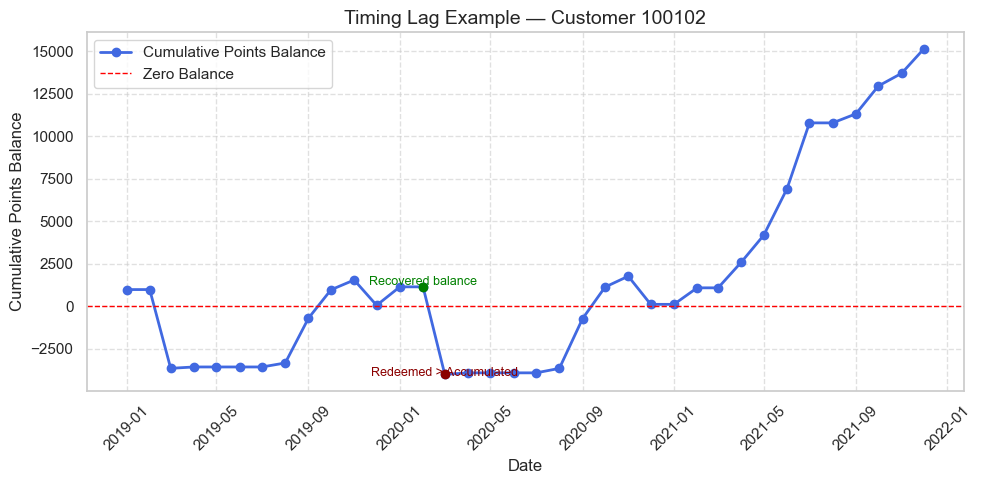

In [517]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Detect customers with timing lag between redemptions and accumulations ---

# Sort data by customer and time
FlightsDB_sorted = FlightsDB.sort_values(by=['Loyalty#', 'YearMonthDate']).copy()

# Compute monthly net points and cumulative balance
FlightsDB_sorted['NetPoints'] = FlightsDB_sorted['PointsAccumulated'] - FlightsDB_sorted['PointsRedeemed']
FlightsDB_sorted['CumulativePoints'] = FlightsDB_sorted.groupby('Loyalty#')['NetPoints'].cumsum()

# Find customers who went negative (redeemed more than accumulated) but later recovered
timing_candidates = FlightsDB_sorted.groupby('Loyalty#')['CumulativePoints'].agg(['min', 'max'])
timing_lag_clients = timing_candidates[(timing_candidates['min'] < 0) & (timing_candidates['max'] > 0)].index

print(f"Customers showing timing lag evidence: {len(timing_lag_clients)}")

# Pick one example client
example_client = timing_lag_clients[0]
client_data = FlightsDB_sorted[FlightsDB_sorted['Loyalty#'] == example_client]

# --- Plot evolution of cumulative points over time ---
plt.figure(figsize=(10, 5))
plt.plot(client_data['YearMonthDate'], client_data['CumulativePoints'],
         marker='o', linewidth=2, color='royalblue', label='Cumulative Points Balance')

# Reference line at zero
plt.axhline(0, color='red', linestyle='--', linewidth=1, label='Zero Balance')

# Add annotations for when balance drops below and recovers
min_idx = client_data['CumulativePoints'].idxmin()
recover_idx = client_data[client_data['CumulativePoints'] > 0].index.min()

if pd.notna(min_idx):
    plt.scatter(client_data.loc[min_idx, 'YearMonthDate'], client_data.loc[min_idx, 'CumulativePoints'],
                color='darkred', zorder=5)
    plt.text(client_data.loc[min_idx, 'YearMonthDate'], client_data.loc[min_idx, 'CumulativePoints'] - 100,
             "Redeemed > Accumulated", color='darkred', fontsize=9, ha='center')

if pd.notna(recover_idx):
    plt.scatter(client_data.loc[recover_idx, 'YearMonthDate'], client_data.loc[recover_idx, 'CumulativePoints'],
                color='green', zorder=5)
    plt.text(client_data.loc[recover_idx, 'YearMonthDate'], client_data.loc[recover_idx, 'CumulativePoints'] + 100,
             "Recovered balance", color='green', fontsize=9, ha='center')

# Labels and legend
plt.title(f"Timing Lag Example — Customer {example_client}", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Cumulative Points Balance", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


### Number of Flights and Number of Flights with Companions

In [518]:
# Check flights consistency: NumFlights >= NumFlightsWithCompanions
loyalty_summary['flights_consistent'] = loyalty_summary['NumFlights'] >= loyalty_summary['NumFlightsWithCompanions']

flights_issues = loyalty_summary[loyalty_summary['flights_consistent']==False]
print("\nLoyalty# with Flights Issues (NumFlights < NumFlightsWithCompanions):")
flights_issues.head()


Loyalty# with Flights Issues (NumFlights < NumFlightsWithCompanions):


Empty DataFrame
Columns: [Loyalty#, PointsAccumulated, PointsRedeemed, NumFlights, NumFlightsWithCompanions, DistanceKM, points_consistent, flights_consistent]
Index: []

### Distance KM and Points Accumulated

In [519]:
# Filter rows where DistanceKM > 0 but PointsAccumulated is 0 or missing
FlightsDB = FlightsDB.copy()

distance_no_points = FlightsDB[
    (FlightsDB['DistanceKM'] > 0) &
    ((FlightsDB['PointsAccumulated'] == 0) | (FlightsDB['PointsAccumulated'].isna()))
]

# Show first few problematic rows
print("Sample rows where DistanceKM > 0 but PointsAccumulated is missing or zero:")
print(distance_no_points.head())

# Count total number of such rows
num_distance_no_points = distance_no_points.shape[0]
print(f"\nTotal rows with DistanceKM > 0 but PointsAccumulated = 0 or NaN: {num_distance_no_points}")


Sample rows where DistanceKM > 0 but PointsAccumulated is missing or zero:
Empty DataFrame
Columns: [Loyalty#, Year, Month, YearMonthDate, NumFlights, NumFlightsWithCompanions, DistanceKM, PointsAccumulated, PointsRedeemed, DollarCostPointsRedeemed]
Index: []

Total rows with DistanceKM > 0 but PointsAccumulated = 0 or NaN: 0


In [520]:
# Filter rows where PointsAccumulated > 0 but DistanceKM is 0 or missing
points_no_distance = FlightsDB[
    (FlightsDB['PointsAccumulated'] > 0) &
    ((FlightsDB['DistanceKM'] == 0) | (FlightsDB['DistanceKM'].isna()))
]

# Show first few problematic rows
print("Sample rows where PointsAccumulated > 0 but DistanceKM = 0 or NaN:")
print(points_no_distance.head())

# Count total number of such rows
num_points_no_distance = points_no_distance.shape[0]
print(f"\nTotal rows with PointsAccumulated > 0 but DistanceKM = 0 or NaN: {num_points_no_distance}")


Sample rows where PointsAccumulated > 0 but DistanceKM = 0 or NaN:
Empty DataFrame
Columns: [Loyalty#, Year, Month, YearMonthDate, NumFlights, NumFlightsWithCompanions, DistanceKM, PointsAccumulated, PointsRedeemed, DollarCostPointsRedeemed]
Index: []

Total rows with PointsAccumulated > 0 but DistanceKM = 0 or NaN: 0


### Points Redeemed and Dollar Cost Points Redeemed

In [521]:
FlightsDB = FlightsDB.copy()

# Check logical consistency between PointsRedeemed and DollarCostPointsRedeemed
inconsistent_costs = FlightsDB[
    (FlightsDB["PointsRedeemed"] == 0) & (FlightsDB["DollarCostPointsRedeemed"] > 0)
]

print(f"Number of inconsistent rows: {len(inconsistent_costs)}")

# Optional: show some examples
if not inconsistent_costs.empty:
    display(inconsistent_costs.head(10))


Number of inconsistent rows: 0


Some inconsistencies found in **FlightsDB**:
- There are some rows where **Points Accumulated** are smaller than **Points Redeemed**

## CustomerDB

### Univariate Analysis

In [522]:
CustomerDB.to_csv('CustomerDB_clean.csv')

#### Categorical Features

##### Histograms

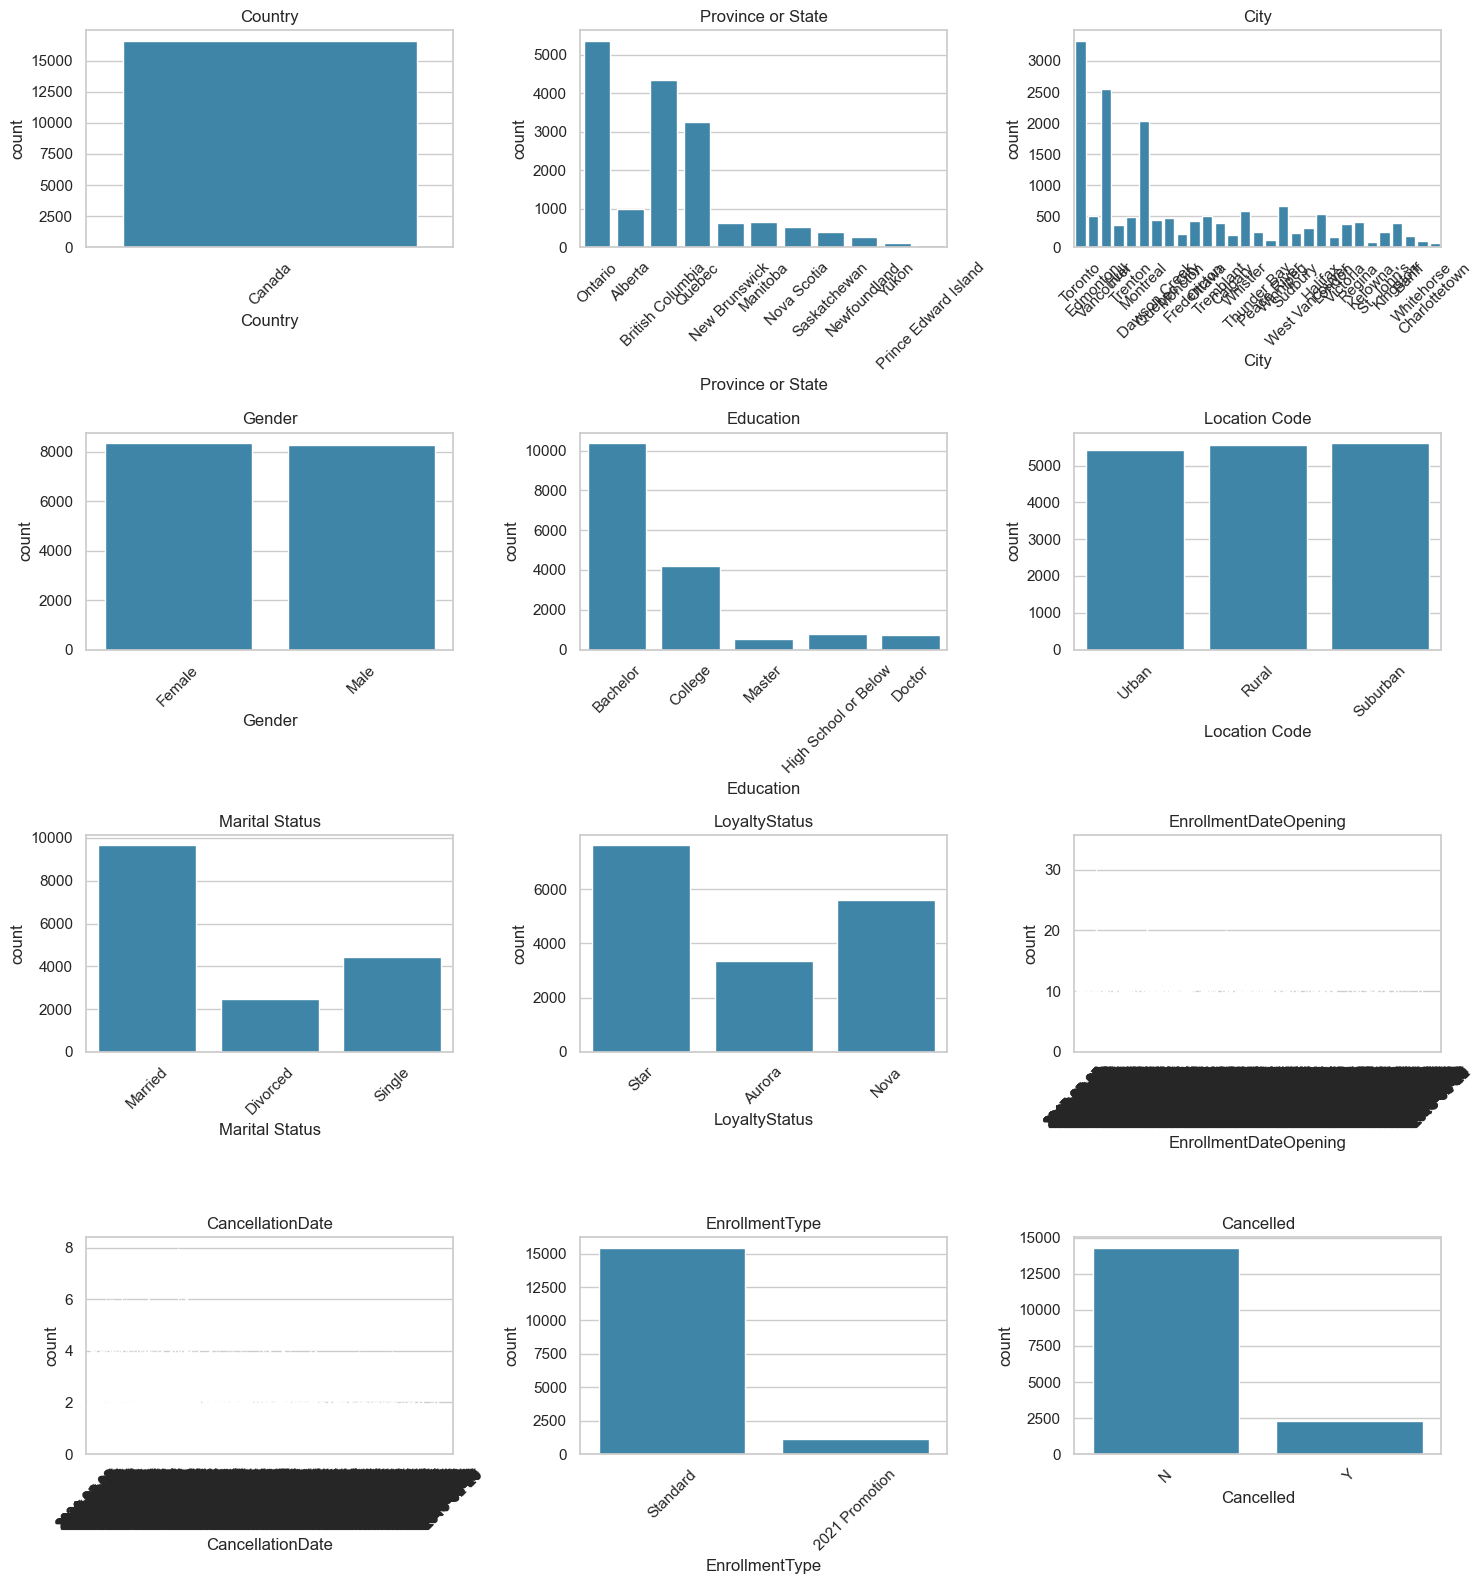

In [523]:
exclude_cols = ['First Name', 'Customer Name', 'Postal code', 'Last Name', 'Loyalty#']
categorical_cols_filtered = [col for col in categorical_columns_customer if col not in exclude_cols]

# Number of columns per row
cols_per_row = 3

# Calculate number of rows needed
num_rows = math.ceil(len(categorical_cols_filtered) / cols_per_row)

# Set up the figure
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(5*cols_per_row, 4*num_rows))
axes = axes.flatten()  # flatten in case we have less plots than grid

for i, col in enumerate(categorical_cols_filtered):
    sns.countplot(data=CustomerDB, x=col, ax=axes[i], color = '#2d8bba')
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=45)

# Turn off any unused subplots
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

- **Gender**: similar proportion for both men and women, indicating that it holds significance for cluster analysis
- **Location Code**: also demonstrastes a good distribution, making it useful for clustering.
- **EnrollmentType**, **Education** and **Marital Status** exhibit substantial proportional differences, which suggests they may not serve as strong indicators for defininf clusters

In [524]:
import pandas as pd

categorical = ['Education', 'Marital Status', 'Location Code']
summary_dict = {}

for col in categorical:
    counts = CustomerDB[col].value_counts(dropna=False)  # include NaNs
    percentages = (counts / len(CustomerDB) * 100).round(2)
    summary_table = pd.DataFrame({
        'Count': counts,
        'Percentage (%)': percentages
    })
    summary_dict[col] = summary_table

# Example: show the table for the first column
first_col = categorical[0]
print(f"Summary for '{first_col}':")
print(summary_dict[first_col])

# Optional: to display all tables sequentially
for col, table in summary_dict.items():
    print(f"\nSummary for '{col}':")
    print(table)


Summary for 'Education':
                      Count  Percentage (%)
Education                                  
Bachelor              10386           62.59
College                4208           25.36
High School or Below    772            4.65
Doctor                  724            4.36
Master                  504            3.04

Summary for 'Education':
                      Count  Percentage (%)
Education                                  
Bachelor              10386           62.59
College                4208           25.36
High School or Below    772            4.65
Doctor                  724            4.36
Master                  504            3.04

Summary for 'Marital Status':
                Count  Percentage (%)
Marital Status                       
Married          9658           58.20
Single           4449           26.81
Divorced         2487           14.99

Summary for 'Location Code':
               Count  Percentage (%)
Location Code                       
Suburban

##### Analyse State and Cities

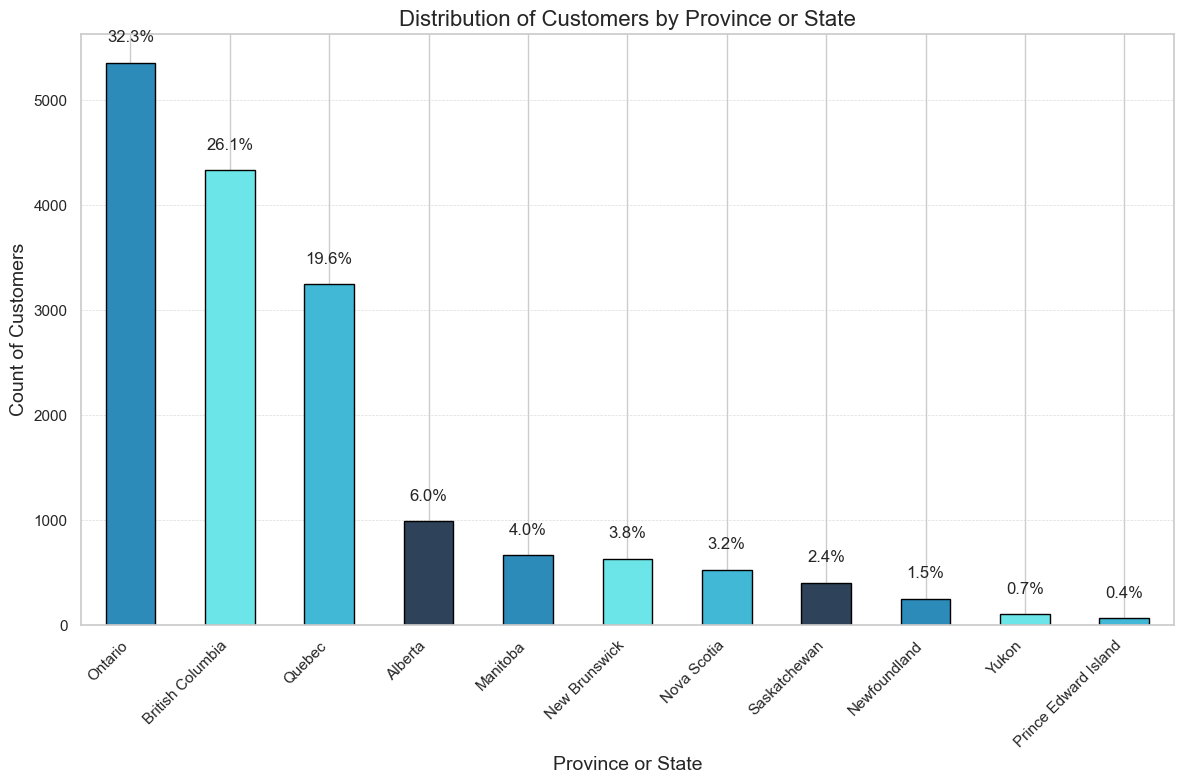

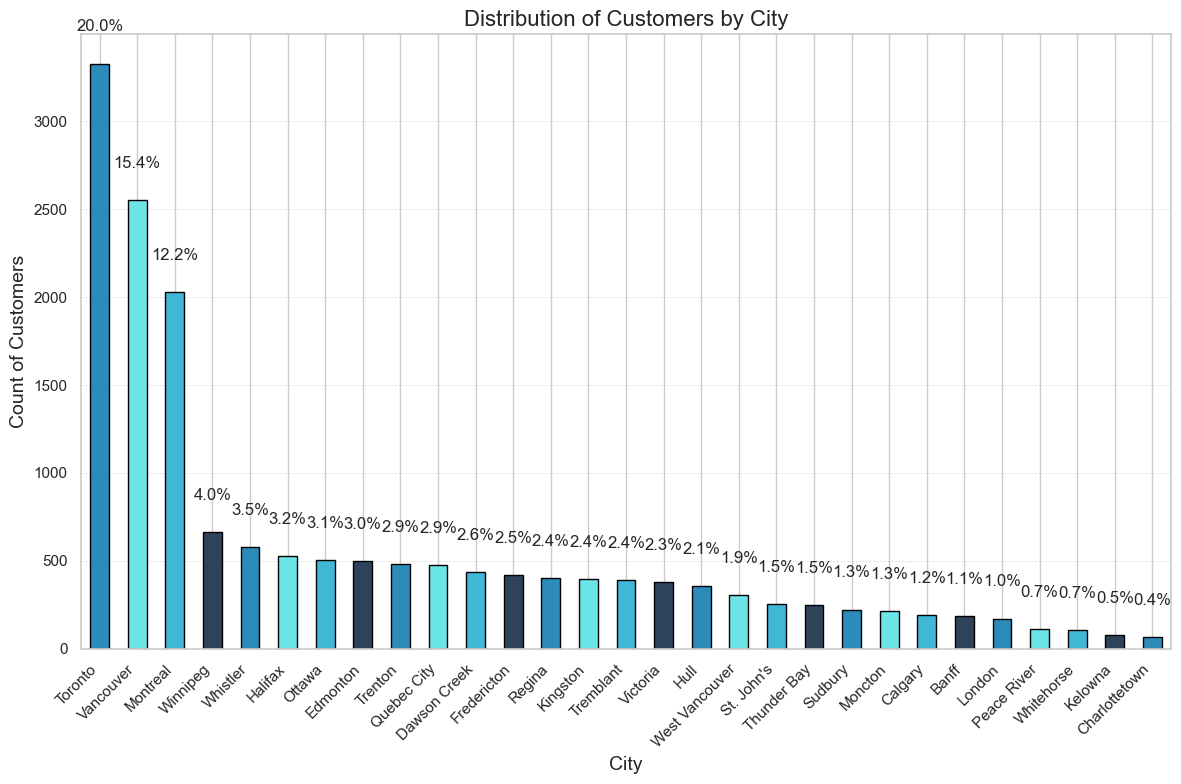

In [525]:
import matplotlib.pyplot as plt

columns_to_plot = ['Province or State', 'City']
colors = ['#2d8bba', '#6ce5e8', '#41b8d5', '#2e425a']  # your custom colors


for col in columns_to_plot:
    counts = CustomerDB[col].value_counts()
    total = counts.sum()
    pct = (counts / total * 100).round(1)  # e.g. 1 decimal place

    plt.figure(figsize=(12, 8))
    ax = counts.plot(kind='bar', color=colors[:len(counts)], edgecolor='black')

    # Add labels (percentage) on each bar
    for i, (count, p) in enumerate(zip(counts, pct)):
        ax.text(i, count + total*0.01,   # a little above the bar (1% of total height)
                f'{p}%', ha='center', va='bottom', fontsize=12)

    plt.title(f'Distribution of Customers by {col}', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Count of Customers', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.tight_layout()
    plt.show()



#### Geospatial Data

In [526]:
import folium

# initialize the map and store it in a m object
m = folium.Map(location = [56.130, -106.35],
               zoom_start = 4)

# show the map
m.save('my_map.html')


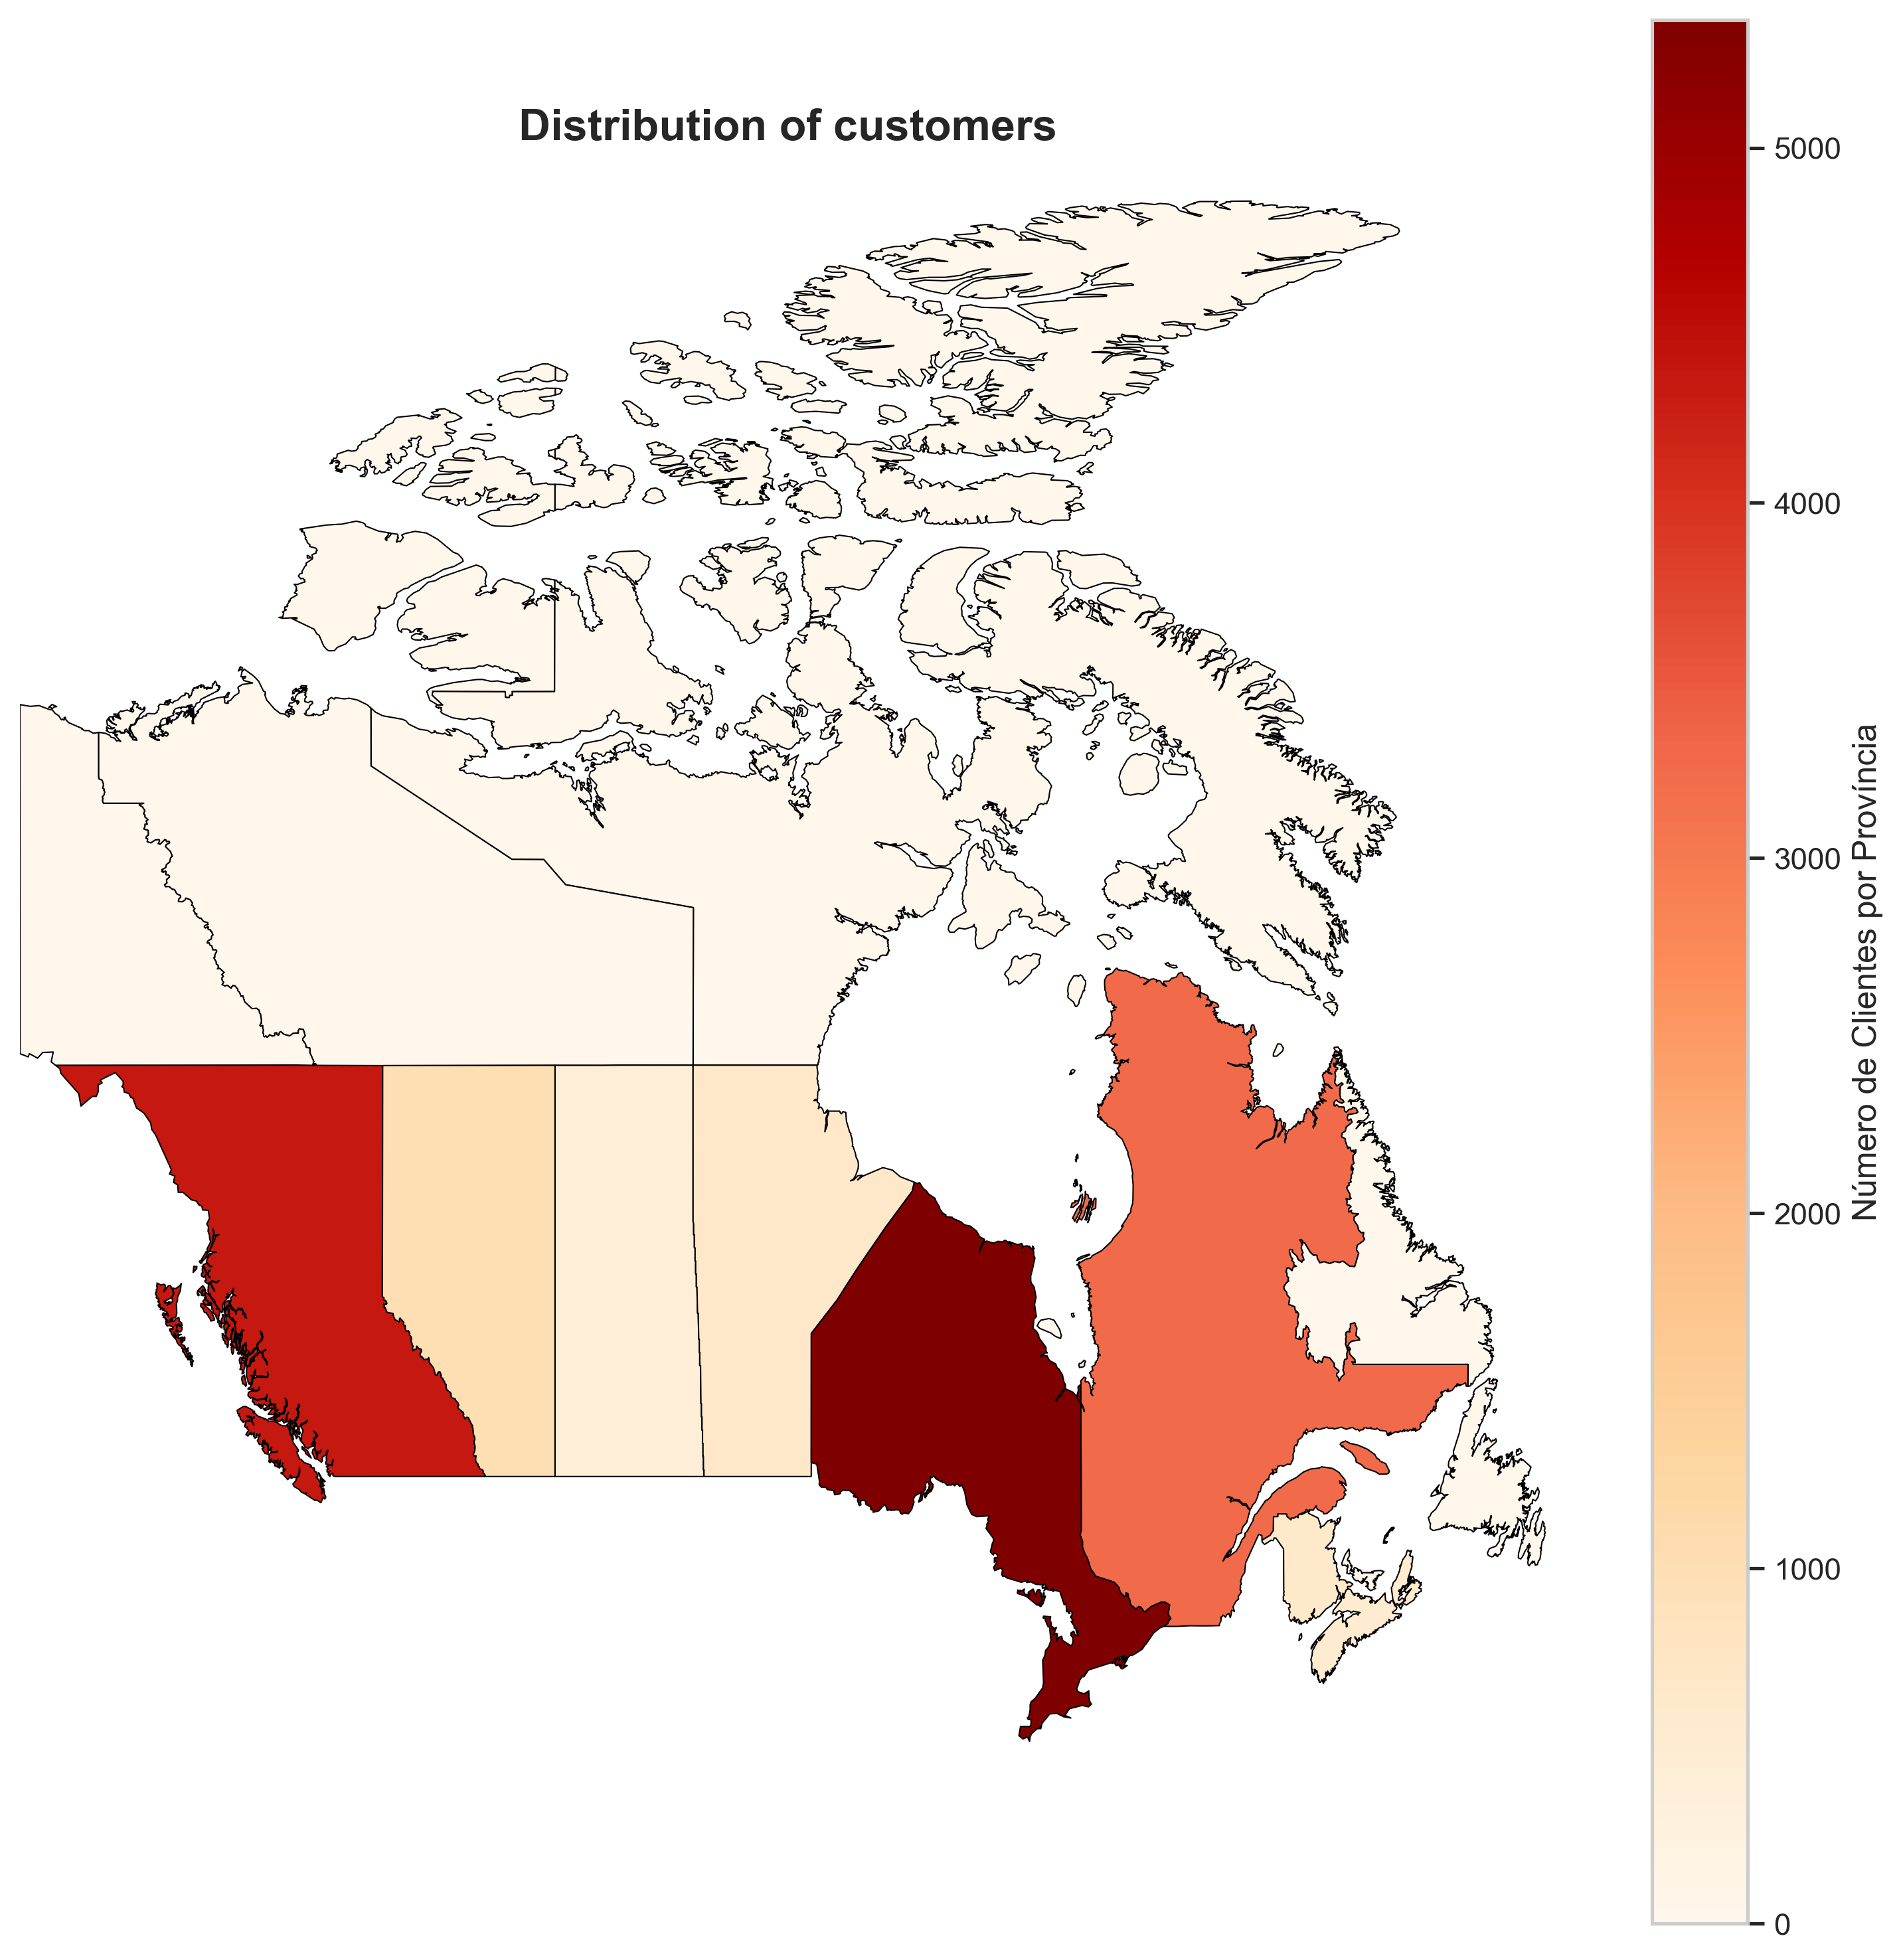

In [527]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd

# ------------------------------------------
# 1️⃣ Agrupar os dados do CustomerDB por província
# ------------------------------------------
# Exemplo: contar quantos clientes por província
clientes_por_provincia = (
    CustomerDB.groupby("Province or State")
    .size()
    .reset_index(name="TotalClientes")
)

# ------------------------------------------
# 2️⃣ Carregar o mapa das províncias do Canadá
# ------------------------------------------
provinces = gpd.read_file(
    "https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/canada.geojson"
)

# Visualiza as colunas disponíveis (para saber o nome da coluna de província)
# print(provinces.columns)
# print(provinces.head())

# O GeoJSON usa a coluna "name" para o nome da província

# ------------------------------------------
# 3️⃣ Unir o shapefile com os dados
# ------------------------------------------
provinces = provinces.merge(
    clientes_por_provincia,
    how="left",
    left_on="name",
    right_on="Province or State"
)

# Substituir valores NaN (províncias sem clientes) por 0
provinces["TotalClientes"] = provinces["TotalClientes"].fillna(0)

# ------------------------------------------
# 4️⃣ Criar o mapa
# ------------------------------------------
fig, ax = plt.subplots(figsize=(10, 10), dpi=300)

# Criar o choropleth
provinces.plot(
    ax=ax,
    column="TotalClientes",
    cmap="OrRd",          # esquema de cores (amarelo → vermelho)
    linewidth=0.5,
    edgecolor="black",
    legend=True,
    legend_kwds={
        "label": "Número de Clientes por Província",
        "orientation": "vertical"
    }
)

ax.set_xlim(-141, -52)
ax.set_ylim(41, 84)
ax.set_axis_off()
ax.set_title("Distribution of customers", fontsize=16, fontweight="bold", pad=10)

plt.tight_layout()
plt.show()




In [528]:
import pandas as pd
import geopandas as gpd


gdf_clientes = gpd.GeoDataFrame(
    CustomerDB,
    geometry=gpd.points_from_xy(CustomerDB['Longitude'], CustomerDB['Latitude']),
    crs="EPSG:4326"
)

print("GeoDataFrame created with success!")
print(gdf_clientes.head())

GeoDataFrame created with success!
  Loyalty# First Name    Last Name        Customer Name Country  \
0   480934    Cecilia  Householder  Cecilia Householder  Canada   
1   549612      Dayle        Menez          Dayle Menez  Canada   
2   429460     Necole       Hannon        Necole Hannon  Canada   
3   608370      Queen        Hagee          Queen Hagee  Canada   
4   530508     Claire      Latting       Claire Latting  Canada   

  Province or State       City   Latitude   Longitude Postal code  ...  \
0           Ontario    Toronto  43.653225  -79.383186     M2Z 4K1  ...   
1           Alberta   Edmonton  53.544388 -113.490930     T3G 6Y6  ...   
2  British Columbia  Vancouver  49.282730 -123.120740     V6E 3D9  ...   
3           Ontario    Toronto  43.653225  -79.383186     P1W 1K4  ...   
4            Quebec       Hull  45.428730  -75.713364     J8Y 3Z5  ...   

    Income Marital Status LoyaltyStatus  EnrollmentDateOpening  \
0  70146.0        Married          Star            

In [529]:
import folium
from folium.plugins import HeatMap

# 1. Criar um mapa base centrado no Canadá
# Coordenadas aproximadas do centro do Canadá e nível de zoom inicial
mapa_canada = folium.Map(location=[56.1304, -106.3468], zoom_start=4)

# 2. Preparar os dados para o heatmap
# O plugin HeatMap precisa de uma lista de [latitude, longitude]
dados_heatmap = gdf_clientes[['Latitude', 'Longitude']].values.tolist()

# 3. Adicionar a camada de heatmap ao mapa
HeatMap(dados_heatmap, radius=15).add_to(mapa_canada)

# 4. Guardar o mapa num ficheiro HTML
mapa_canada.save('heatmap_customer.html')

print("HeatMap 'heatmap_customer.html' created with sucess!")

HeatMap 'heatmap_customer.html' created with sucess!


In [530]:
import folium
from folium.plugins import MarkerCluster

# 1. Criar um mapa base centrado no Canadá
mapa_canada_cluster = folium.Map(location=[56.1304, -106.3468], zoom_start=4)

# 2. Criar um objeto de cluster
marker_cluster = MarkerCluster().add_to(mapa_canada_cluster)

# 3. Adicionar cada cliente ao objeto de cluster
for idx, row in gdf_clientes.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['City'] # Opcional: mostrar a cidade ao clicar
    ).add_to(marker_cluster)

# 4. Guardar o mapa num ficheiro HTML
mapa_canada_cluster.save('clusters_map_customers.html')

print("Clusters map 'clusters_map_customers.html' created with sucess!")

Clusters map 'clusters_map_customers.html' created with sucess!


##### Enrollment Type

In [531]:
enrollment_prop = CustomerDB['EnrollmentType'].value_counts(normalize=True).round(4) * 100

print(enrollment_prop.reset_index().rename(columns={'index': 'EnrollmentType', 'EnrollmentType': 'Percentage (%)'}))

   Percentage (%)  proportion
0        Standard       93.14
1  2021 Promotion        6.86


### Numerical Features

#### HIstograms

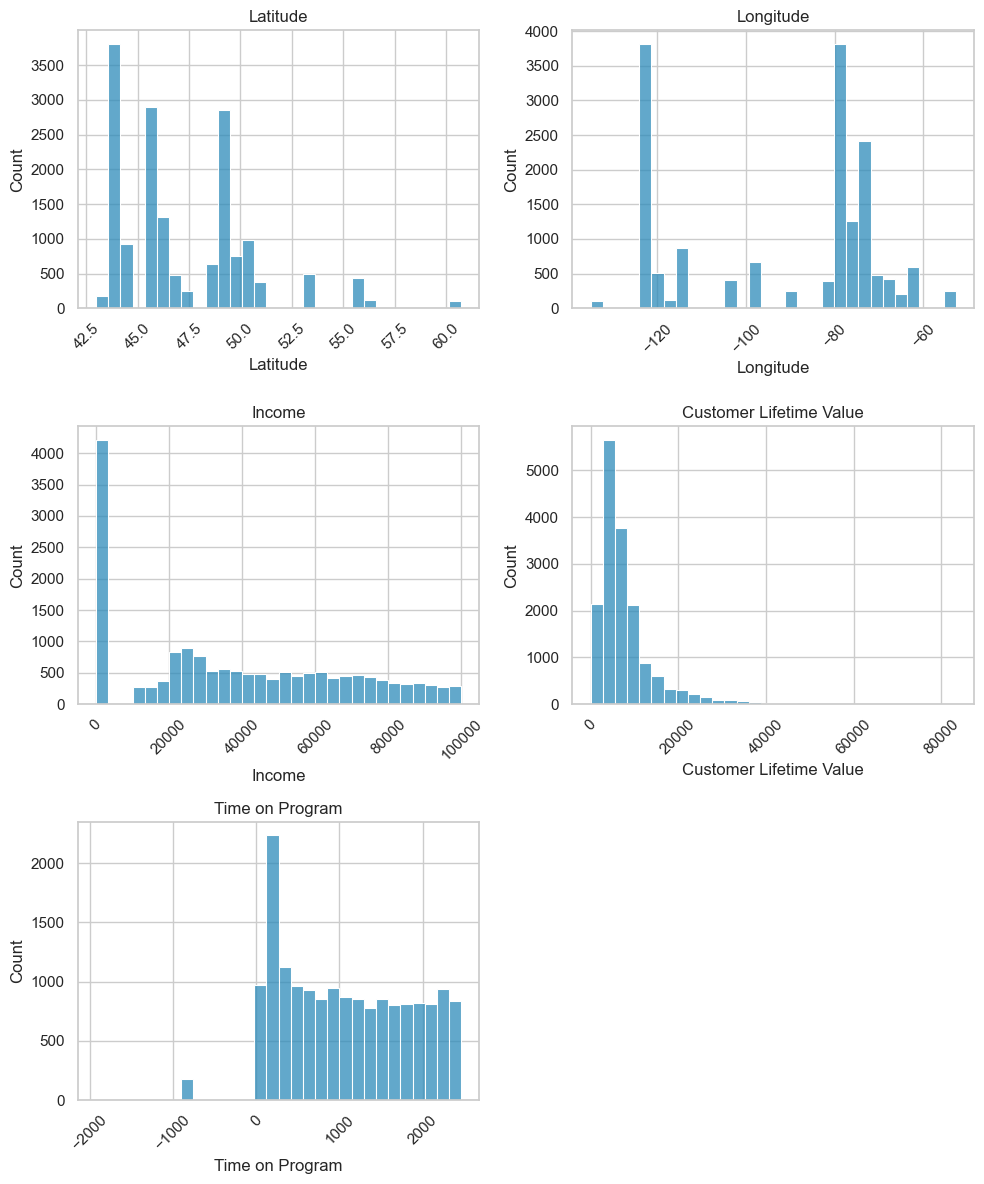

In [532]:
exclude_numeric_cols = ['Loyalty#']

CustomerDB['Time on Program'] = CustomerDB['Time on Program'].dt.days


numeric_cols_filtered = [col for col in numerical_columns_customer if col not in exclude_numeric_cols]

cols_per_row = 2

num_rows = math.ceil(len(numeric_cols_filtered) / cols_per_row)

fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(5*cols_per_row, 4*num_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols_filtered):
    sns.histplot(CustomerDB[col], kde=False, ax=axes[i], bins=30, color = '#2d8bba')
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


#### Boxplots

##### Outliers

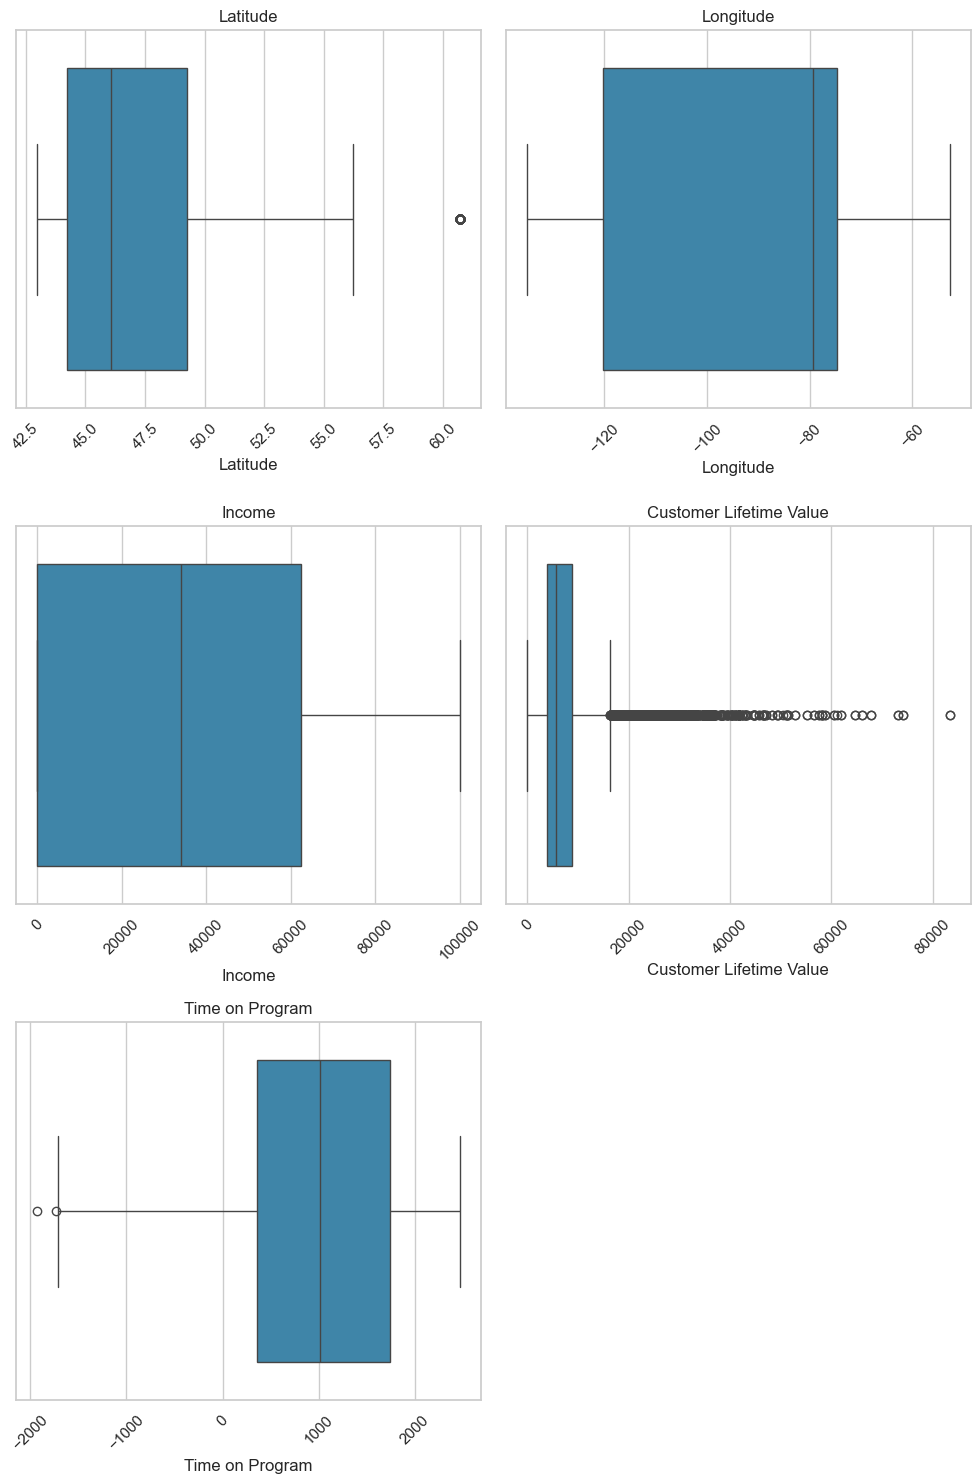

In [533]:
cols_per_row = 2

num_rows = math.ceil(len(numeric_cols_filtered) / cols_per_row)

fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(5*cols_per_row, 5*num_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols_filtered):
    sns.boxplot(data=CustomerDB, x=col, ax=axes[i], color='#2d8bba')
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


**Latitude** – There is a single noticeable outlier at around 60°, which might represent a customer located much farther north than most (possibly from Alaska or Northern Canada if this is U.S.-based data).

**Longitude** – No major outliers are visible; values are mostly within a normal U.S. range (around -130° to -60°).

**Income** – The distribution looks relatively symmetric, and there are no strong outliers. Most incomes fall below 100,000.

**Customer Lifetime Value (CLV)** – This variable has a significant number of outliers on the higher end. Many points are scattered far beyond the upper whisker, indicating customers with exceptionally high lifetime values compared to the rest.
These may represent high-value or loyal customers, or possibly data entry errors (e.g., misplaced decimal points).

##### Latitude

In [535]:
Q1 = CustomerDB['Latitude'].quantile(0.25)
Q3 = CustomerDB['Latitude'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_latitude = CustomerDB[(CustomerDB['Latitude'] < lower_bound) | (CustomerDB['Latitude'] > upper_bound)]

print("Outlier boundaries:")
print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")

print("\nOutlier rows:")
print(outliers_latitude[['Latitude']])

count = outliers_latitude.shape[0]
print(f"\nTotal number of outliers in Latitude: {count}")


Outlier boundaries:
Lower bound: 36.65383250000001
Upper bound: 56.8600685

Outlier rows:
        Latitude
394    60.721188
397    60.721188
499    60.721188
648    60.721188
809    60.721188
...          ...
16021  60.721188
16029  60.721188
16161  60.721188
16215  60.721188
16507  60.721188

[108 rows x 1 columns]

Total number of outliers in Latitude: 108


In [536]:
outliers_latitude.head(10).sort_values(by='Loyalty#')

Loyalty# First Name Last Name      Customer Name Country  \
648    121935      Lesia   Droesch      Lesia Droesch  Canada   
394    211043       Ngoc  Naughton      Ngoc Naughton  Canada   
499    304944    Seymour   Sheerin    Seymour Sheerin  Canada   
1754   356618        Jae  Broccoli       Jae Broccoli  Canada   
809    399575        Amy  Bradigan       Amy Bradigan  Canada   
944    508115     Agatha    Gilden      Agatha Gilden  Canada   
397    517758     Golden      Maag        Golden Maag  Canada   
935    526064   Meredith  Adriance  Meredith Adriance  Canada   
1247   621750     Norris     Louro       Norris Louro  Canada   
1776   792332  Kimberely     Dejes    Kimberely Dejes  Canada   

     Province or State        City   Latitude  Longitude Postal code  ...  \
648              Yukon  Whitehorse  60.721188 -135.05684     Y2K 6R0  ...   
394              Yukon  Whitehorse  60.721188 -135.05684     Y2K 6R0  ...   
499              Yukon  Whitehorse  60.721188 -135.05684     Y2K 6R0  ...   
1754             Yukon  Whitehorse  60.721188 -135.05684     Y2K 6R0  ...   
809              Yukon  Whitehorse  60.721188 -135.05684     Y2K 6R0  ...   
944              Yukon  Whitehorse  60.721188 -135.05684     Y2K 6R0  ...   
397              Yukon  Whitehorse  60.721188 -135.05684     Y2K 6R0  ...   
935              Yukon  Whitehorse  60.721188 -135.05684     Y2K 6R0  ...   
1247             Yukon  Whitehorse  60.721188 -135.05684     Y2K 6R0  ...   
1776             Yukon  Whitehorse  60.721188 -135.05684     Y2K 6R0  ...   

     Location Code   Income Marital Status  LoyaltyStatus  \
648       Suburban  29950.0        Married           Star   
394          Urban      0.0         Single           Star   
499          Rural      0.0         Single           Star   
1754         Rural  28792.0         Single         Aurora   
809          Rural  68331.0        Married         Aurora   
944          Rural  97131.0        Married         Aurora   
397          Urban  27538.0       Divorced           Star   
935       Suburban  88081.0        Married         Aurora   
1247         Rural  75963.0       Divorced         Aurora   
1776         Rural  23772.0        Married         Aurora   

     EnrollmentDateOpening CancellationDate Customer Lifetime Value  \
648             2018-10-19              NaT                 4878.83   
394             2015-07-09              NaT                 4566.12   
499             2017-01-04              NaT                 4703.72   
1754            2017-03-08              NaT                 6612.62   
809             2019-03-23              NaT                 5033.39   
944             2020-03-04              NaT                 5181.62   
397             2015-12-07              NaT                 4570.67   
935             2021-05-22              NaT                 5174.08   
1247            2017-07-31              NaT                 5515.25   
1776            2015-06-26              NaT                 6687.59   

      EnrollmentType  Cancelled Time on Program  
648   2021 Promotion          N            1168  
394         Standard          N            2366  
499         Standard          N            1821  
1754        Standard          N            1758  
809         Standard          N            1013  
944         Standard          N             666  
397         Standard          N            2215  
935         Standard          N             222  
1247        Standard          N            1613  
1776        Standard          N            2379  

[10 rows x 22 columns]

The latitude outliers identified in the dataset correspond to customers located in Whitehorse, Yukon (Latitude ≈ 60.72°). While they appear as statistical outliers due to their northern position relative to most customers, they are valid and meaningful records that reflect real business presence in northern regions.

Therefore, we have decided to retain these entries in the dataset.

##### Customer Lifetime Value

In [538]:
Q1 = CustomerDB['Customer Lifetime Value'].quantile(0.25)
Q3 = CustomerDB['Customer Lifetime Value'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_CLV = CustomerDB[(CustomerDB['Customer Lifetime Value'] < lower_bound) | (CustomerDB['Customer Lifetime Value'] > upper_bound)].sort_values(by='Customer Lifetime Value', ascending=False)

print("Outlier boundaries:")
print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")

print("\nOutlier rows:")
print(outliers_CLV[['Customer Lifetime Value']])

count = outliers_CLV.shape[0]
print(f"\nTotal number of outliers in CLV: {count}")


Outlier boundaries:
Lower bound: -3493.655000000002
Upper bound: 16395.585000000003

Outlier rows:
       Customer Lifetime Value
16900                 83325.38
16899                 83325.38
16898                 74228.52
9884                  74228.52
4161                  73225.96
...                        ...
9392                  16464.37
9391                  16460.08
16373                 16414.04
9390                  16407.66
3685                  16407.66

[1463 rows x 1 columns]

Total number of outliers in CLV: 1463


In [539]:
outliers_CLV.head(10)

Loyalty# First Name  Last Name    Customer Name Country  \
16900   652627     Ariane     Peyton    Ariane Peyton  Canada   
16899   615459     Dannie     Paplow    Dannie Paplow  Canada   
16898   776187     Janina       Lumb      Janina Lumb  Canada   
9884    844145    Tabitha    Simonds  Tabitha Simonds  Canada   
4161    592003     Cletus      Chafe     Cletus Chafe  Canada   
4162    767366      Alana  Sullinger  Alana Sullinger  Canada   
16897   680886      Jamee       Ahlm       Jamee Ahlm  Canada   
4160    838263    Delaine     Sitaca   Delaine Sitaca  Canada   
9883    495253      Petra       Rieu       Petra Rieu  Canada   
4159    179870       Inge      Brunn       Inge Brunn  Canada   

      Province or State         City   Latitude   Longitude Postal code  ...  \
16900          Manitoba     Winnipeg  49.895138  -97.138374     R2C 0M5  ...   
16899            Quebec     Montreal  45.501690  -73.567253     H2Y 4R4  ...   
16898  British Columbia    Vancouver  49.282730 -123.120740     V5R 1W3  ...   
9884            Ontario      Toronto  43.653225  -79.383186     P1J 8T7  ...   
4161      New Brunswick  Fredericton  45.963589  -66.643112     E3B 2H2  ...   
4162             Quebec     Montreal  45.501690  -73.567253     H4G 3T4  ...   
16897      Saskatchewan       Regina  50.445210 -104.618900     S1J 3C5  ...   
4160        Nova Scotia      Halifax  44.648766  -63.575237     B3J 9S2  ...   
9883   British Columbia     Whistler  50.116322 -122.957360     V6T 1Y8  ...   
4159             Quebec     Montreal  45.501690  -73.567253     H2Y 2W2  ...   

      Location Code   Income Marital Status  LoyaltyStatus  \
16900      Suburban  58958.0        Married           Star   
16899         Urban  58958.0        Married           Star   
16898         Urban      0.0         Single           Star   
9884          Urban      0.0         Single           Nova   
4161          Urban  39547.0        Married         Aurora   
4162          Rural  39547.0        Married         Aurora   
16897         Rural  78310.0        Married           Star   
4160          Rural  78310.0        Married         Aurora   
9883          Rural  33481.0         Single           Nova   
4159          Rural  33481.0         Single         Aurora   

      EnrollmentDateOpening CancellationDate Customer Lifetime Value  \
16900            2018-12-03       2019-08-03                83325.38   
16899            2021-04-22       2021-12-22                83325.38   
16898            2017-03-24              NaT                74228.52   
9884             2018-09-09       2019-04-07                74228.52   
4161             2021-03-11              NaT                73225.96   
4162             2020-03-21       2020-11-21                73225.96   
16897            2017-09-06              NaT                67907.27   
4160             2015-07-25              NaT                67907.27   
9883             2018-04-08              NaT                66025.75   
4159             2020-07-02              NaT                66025.75   

       EnrollmentType  Cancelled Time on Program  
16900        Standard          Y             243  
16899  2021 Promotion          Y             244  
16898        Standard          N            1742  
9884         Standard          Y             210  
4161   2021 Promotion          N             294  
4162         Standard          Y             245  
16897        Standard          N            1576  
4160         Standard          N            2350  
9883         Standard          N            1362  
4159         Standard          N             546  

[10 rows x 22 columns]

We will take a more deep look beyond of this outliers, since by this heading we cannot yet conclude anything.

For this problem we can do one of three things:
- log transformation
- standard scaling
- min max scaling

## Bivariate and Multivariate Analysis

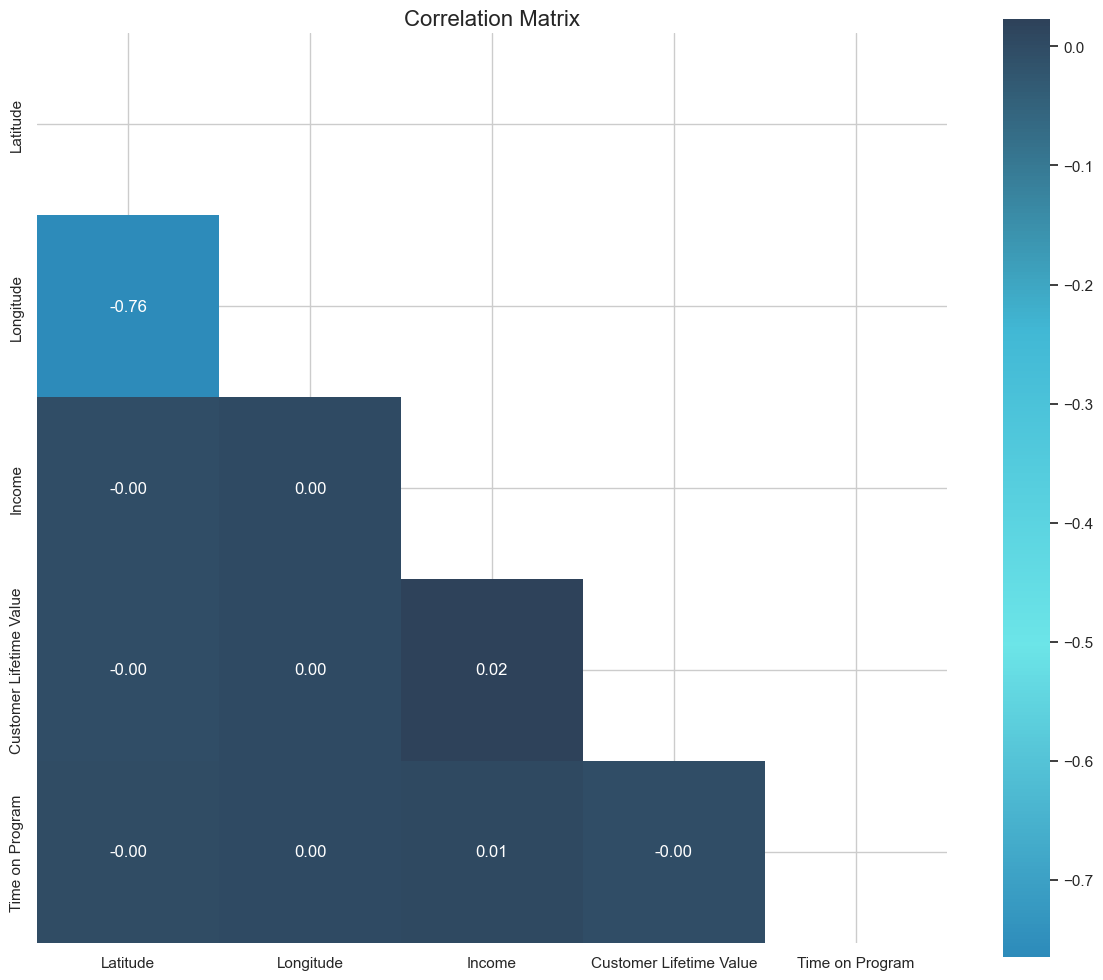

In [540]:

# Custom colors
custom_colors = ['#2d8bba', '#6ce5e8', '#41b8d5', '#2e425a']
cmap = LinearSegmentedColormap.from_list("custom_cmap", custom_colors)

# Correlation matrix
corr_matrix = CustomerDB[numeric_cols_filtered].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap=cmap, cbar=True, square=True)

plt.title("Correlation Matrix", fontsize=16)
plt.tight_layout()
plt.show()


Strong negative correlation between Latitude and Longitude → as Latitude increases, Longitude tends to decrease (or vice versa)

Makes sense geographically if customers are concentrated in a specific region.

No significant linear relationship between location and income or CLV.

Suggests other factors (like number of flights, engagement, loyalty) likely drive CLV more.

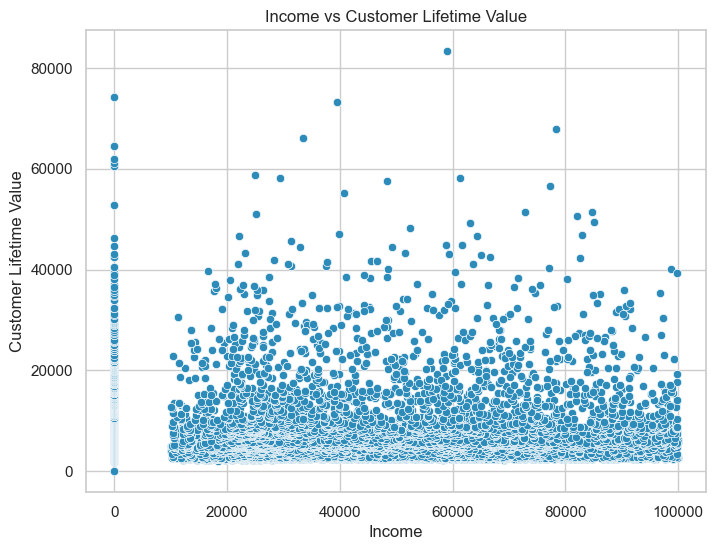

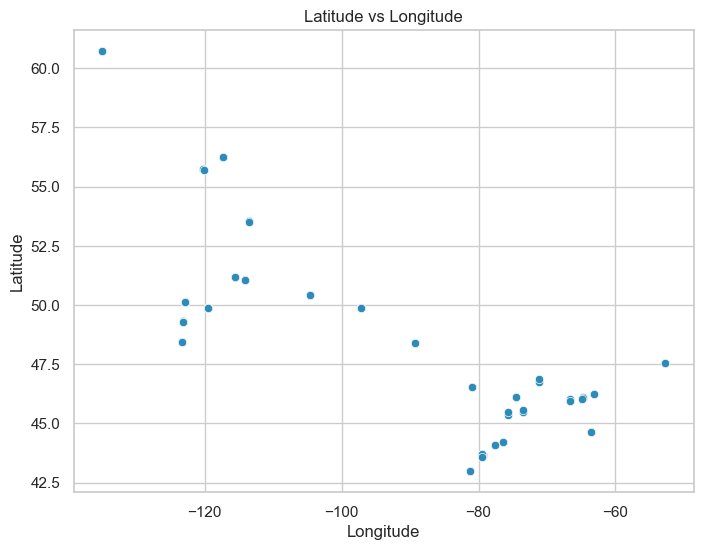

In [541]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=CustomerDB, x='Income', y='Customer Lifetime Value',color='#2d8bba')
plt.title('Income vs Customer Lifetime Value')
plt.xlabel('Income')
plt.ylabel('Customer Lifetime Value')
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(data=CustomerDB, x='Longitude', y='Latitude', color = '#2d8bba')
plt.title('Latitude vs Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


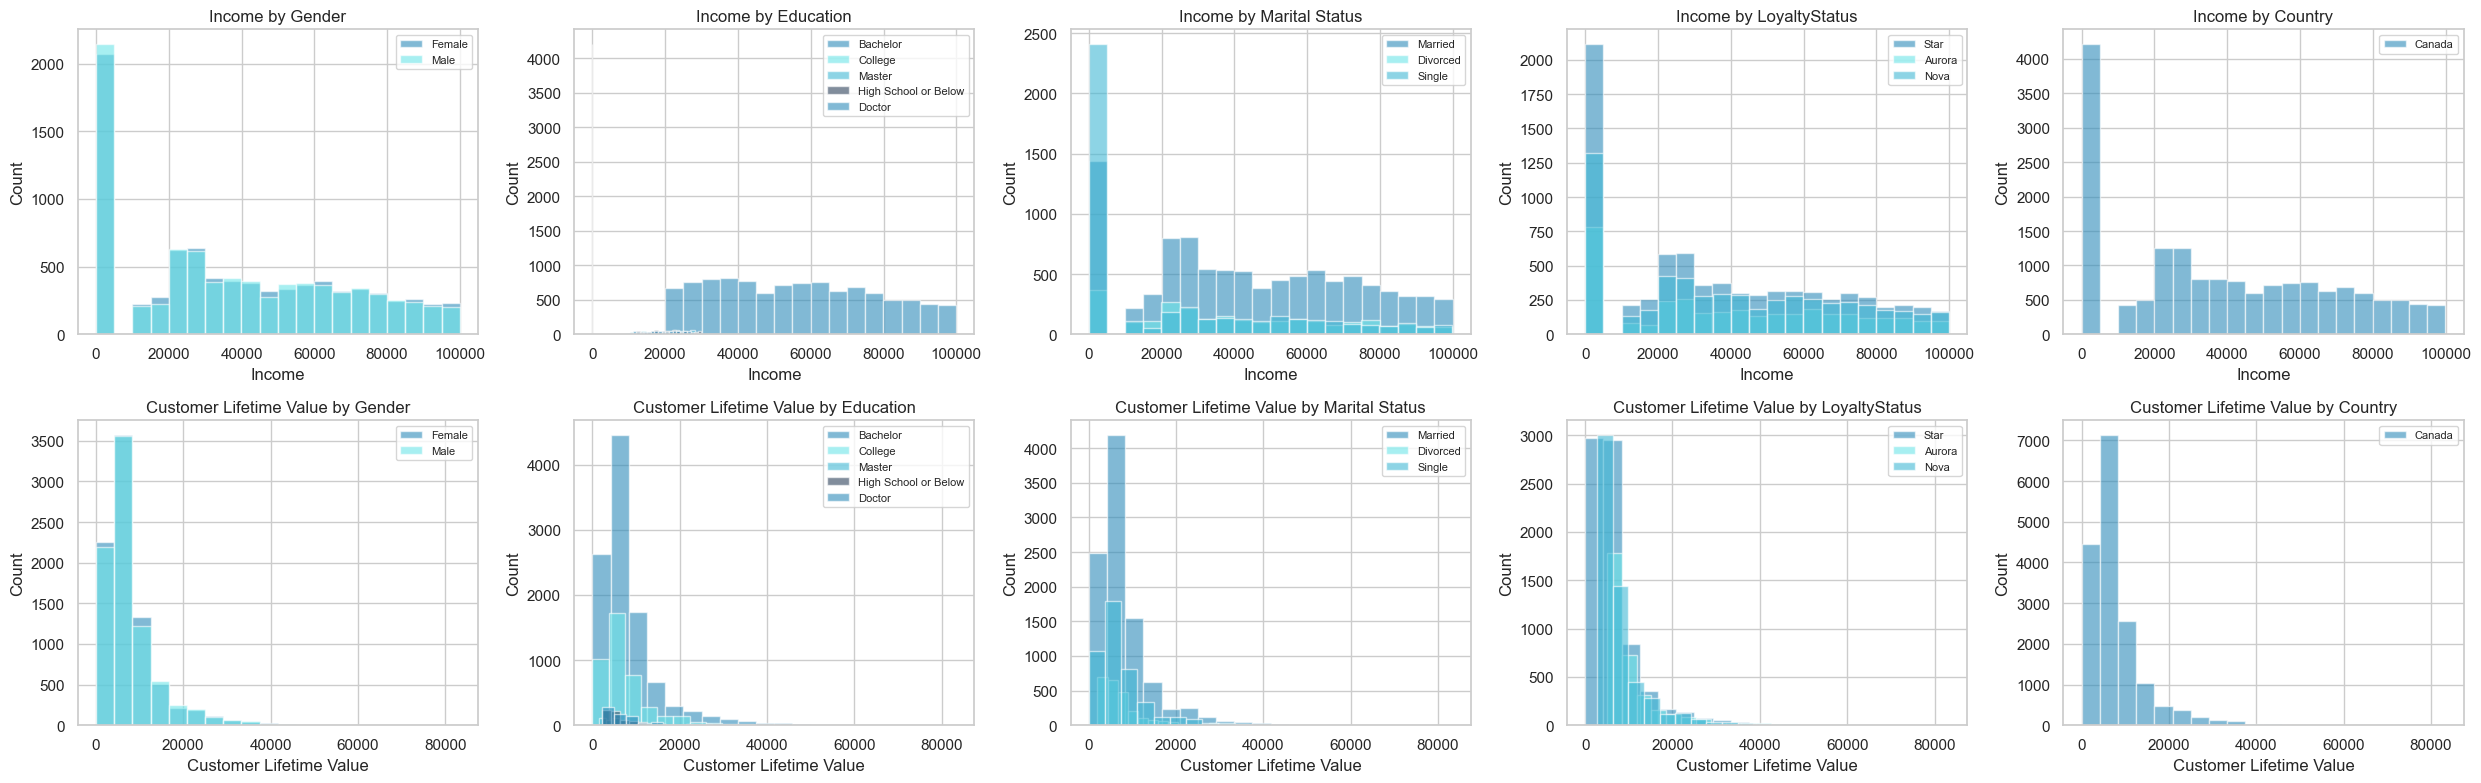

In [542]:
sns.set_style('whitegrid')

num_cols = ['Income', 'Customer Lifetime Value']
cat_cols = ['Gender', 'Education', 'Marital Status', 'LoyaltyStatus', 'Country']

colors = ['#2d8bba', '#6ce5e8', '#41b8d5', '#2e425a']


# Grid layout
n_rows = len(num_cols)
n_cols = len(cat_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))

for i, num in enumerate(num_cols):
    for j, cat in enumerate(cat_cols):
        ax = axes[i, j]
        categories = CustomerDB[cat].dropna().unique()
        for k, c in enumerate(categories):
            subset = CustomerDB[CustomerDB[cat] == c]
            ax.hist(subset[num], bins=20, alpha=0.6, label=str(c), color=colors[k % len(colors)])
        ax.set_title(f'{num} by {cat}', fontsize=12)
        ax.set_xlabel(num)
        ax.set_ylabel('Count')
        ax.legend(fontsize=8)

plt.tight_layout()
plt.show()

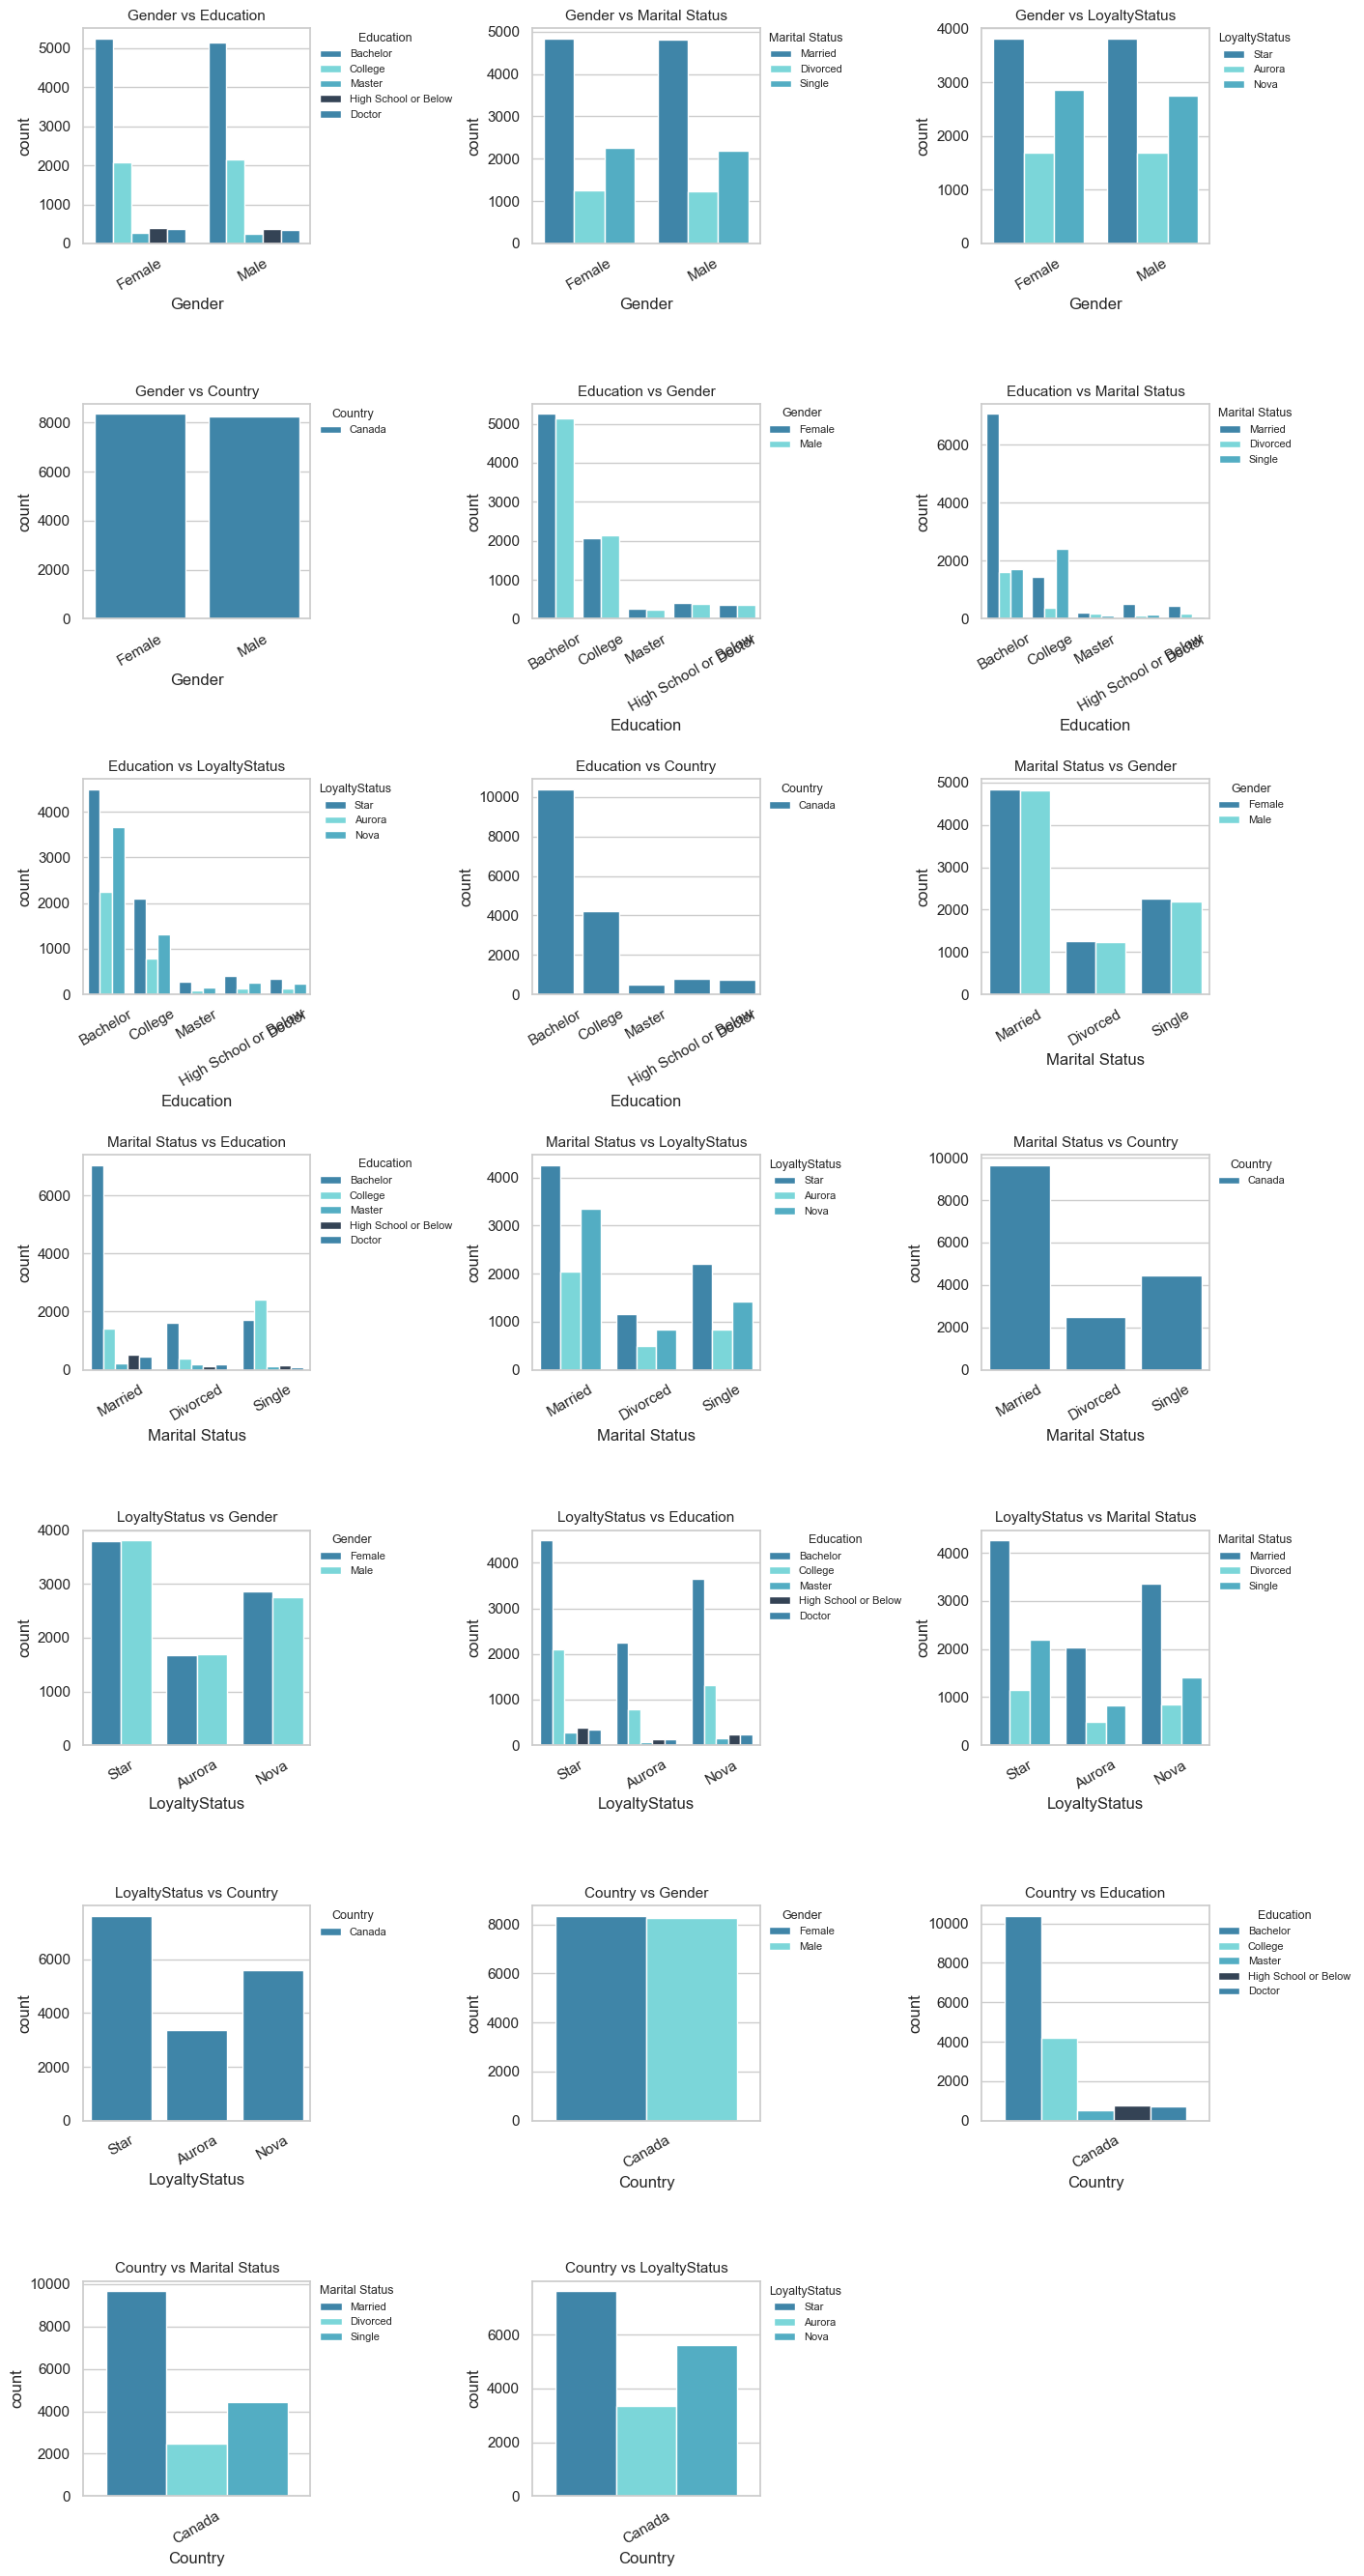

In [543]:

sns.set_style('whitegrid')

cat_cols = ['Gender', 'Education', 'Marital Status', 'LoyaltyStatus', 'Country']

# Custom colors
custom_colors = ['#2d8bba', '#6ce5e8', '#41b8d5', '#2e425a']

# Calculate total number of plots (excluding same-variable pairs)
total_plots = len(cat_cols) * (len(cat_cols) - 1)

# Define grid size
n_cols = 3  # fewer columns makes plots more readable
n_rows = math.ceil(total_plots / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

plot_idx = 0
for i, cat1 in enumerate(cat_cols):
    for j, cat2 in enumerate(cat_cols):
        if cat1 == cat2:
            continue
        ax = axes[plot_idx]

        # Get unique hue categories and assign colors
        hue_categories = CustomerDB[cat2].dropna().unique()
        palette_dict = {hue: custom_colors[k % len(custom_colors)] for k, hue in enumerate(hue_categories)}

        sns.countplot(
            data=CustomerDB,
            x=cat1,
            hue=cat2,
            palette=palette_dict,
            ax=ax
        )
        ax.set_title(f'{cat1} vs {cat2}', fontsize=11)
        ax.tick_params(axis='x', rotation=30)

        # Move legend outside but below the title
        ax.legend(
            title=cat2,
            bbox_to_anchor=(1.02, 1),
            loc='upper left',
            borderaxespad=0,
            frameon=False,
            fontsize=8,
            title_fontsize=9
        )

        plot_idx += 1

# Remove unused subplots
for k in range(plot_idx, len(axes)):
    fig.delaxes(axes[k])

# Adjust spacing and layout automatically
plt.tight_layout(pad=2.0, w_pad=1.0, h_pad=2.0)
plt.subplots_adjust(top=0.95, right=0.85)  # leave space for legends
plt.show()

Relationships:

Gender is not a determining factor.

There are no major demographic differences among the loyalty status groups.

Customers with higher loyalty levels generally have higher education.

The married group is more represented in the higher loyalty categories.



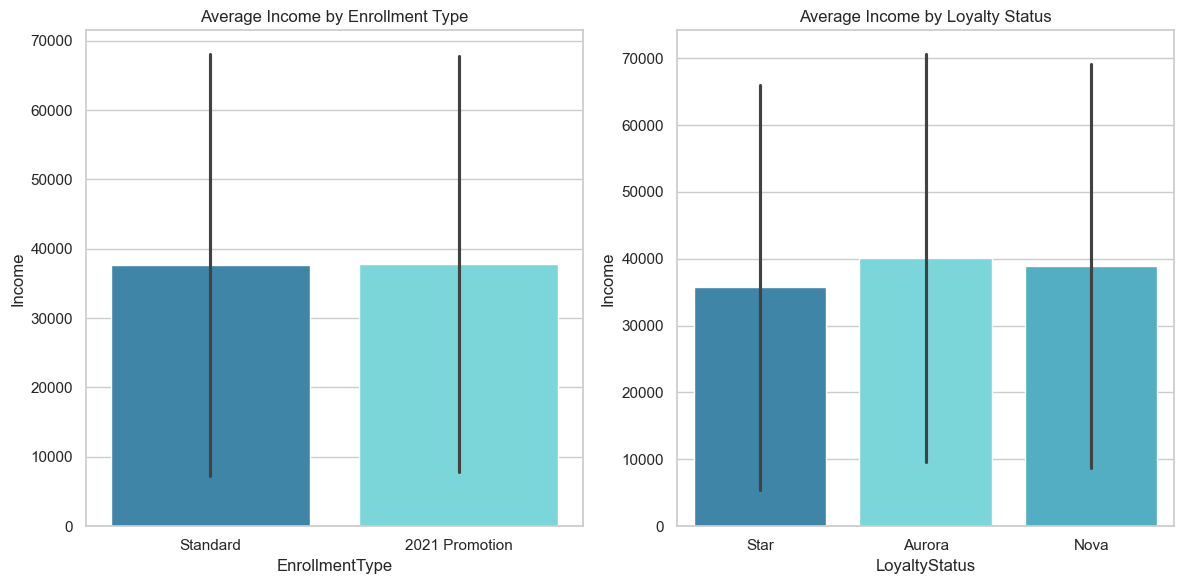

In [544]:
plt.figure(figsize=(12,6))

# Custom colors
custom_colors = ['#2d8bba', '#6ce5e8', '#41b8d5', '#2e425a']

# EnrollmentType vs Income
plt.subplot(1, 2, 1)
enroll_categories = CustomerDB['EnrollmentType'].dropna().unique()
palette_enroll = {cat: custom_colors[i % len(custom_colors)] for i, cat in enumerate(enroll_categories)}

sns.barplot(
    data=CustomerDB,
    x='EnrollmentType',
    y='Income',
    palette=palette_enroll,
    ci='sd'
)
plt.title('Average Income by Enrollment Type')

# LoyaltyStatus vs Income
plt.subplot(1, 2, 2)
loyalty_categories = CustomerDB['LoyaltyStatus'].dropna().unique()
palette_loyalty = {cat: custom_colors[i % len(custom_colors)] for i, cat in enumerate(loyalty_categories)}

sns.barplot(
    data=CustomerDB,
    x='LoyaltyStatus',
    y='Income',
    palette=palette_loyalty,
    ci='sd'
)
plt.title('Average Income by Loyalty Status')

plt.tight_layout()
plt.show()

The average Income for both standard and 2021 promotion is almost identical

The error bars are quite long - indicates high variability

Enrollment Type does not significantly influence income

For Loyalty Status, the error bars overlap substantially, meaning the differences are not statistically significant. There's no strong correlation between loyalty status and income, though Aurora and Nova members have a slightly higher average.

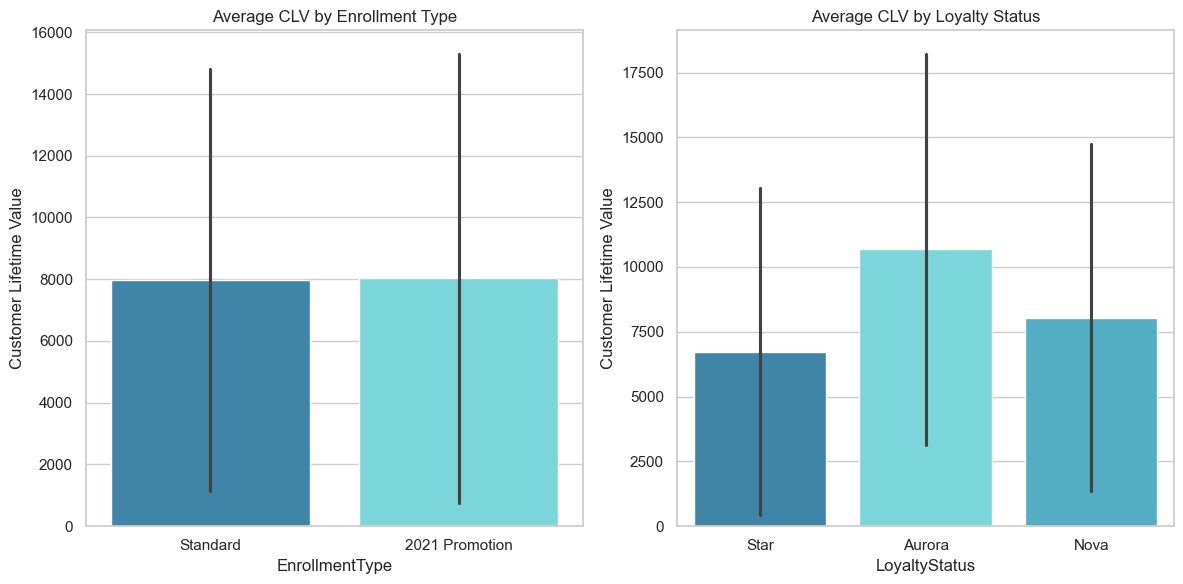

In [545]:
plt.figure(figsize=(12,6))

# Custom colors
custom_colors = ['#2d8bba', '#6ce5e8', '#41b8d5', '#2e425a']

# EnrollmentType vs CLV
plt.subplot(1, 2, 1)
enroll_categories = CustomerDB['EnrollmentType'].dropna().unique()
palette_enroll = {cat: custom_colors[i % len(custom_colors)] for i, cat in enumerate(enroll_categories)}

sns.barplot(
    data=CustomerDB,
    x='EnrollmentType',
    y='Customer Lifetime Value',
    palette=palette_enroll,
    ci='sd'
)
plt.title('Average CLV by Enrollment Type')

# LoyaltyStatus vs CLV
plt.subplot(1, 2, 2)
loyalty_categories = CustomerDB['LoyaltyStatus'].dropna().unique()
palette_loyalty = {cat: custom_colors[i % len(custom_colors)] for i, cat in enumerate(loyalty_categories)}

sns.barplot(
    data=CustomerDB,
    x='LoyaltyStatus',
    y='Customer Lifetime Value',
    palette=palette_loyalty,
    ci='sd'
)
plt.title('Average CLV by Loyalty Status')

plt.tight_layout()
plt.show()

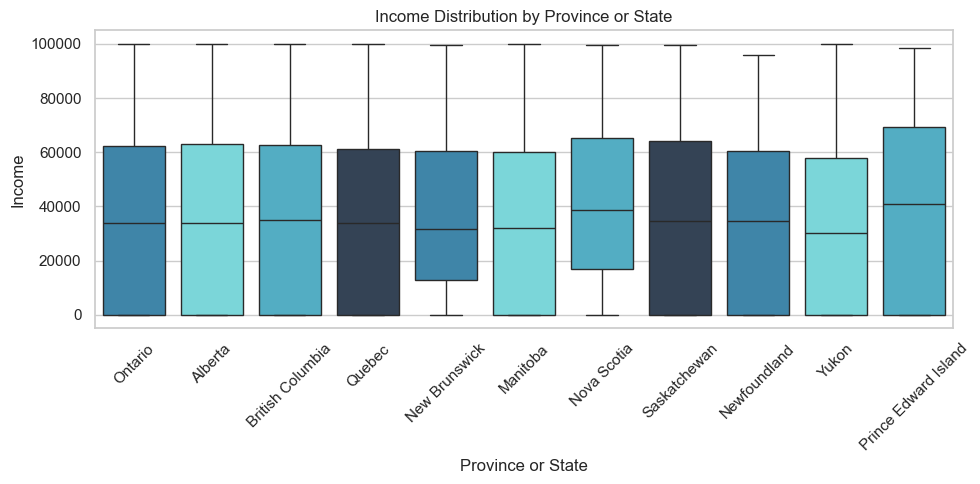

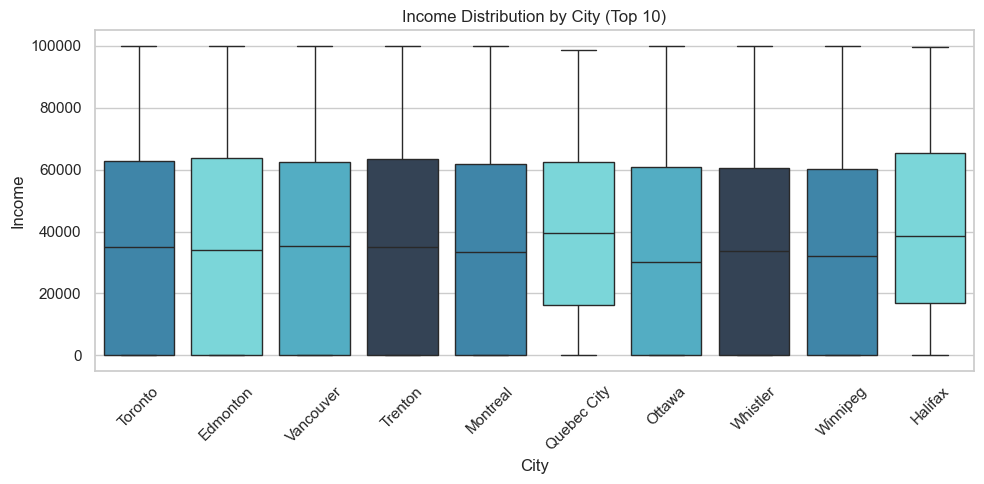

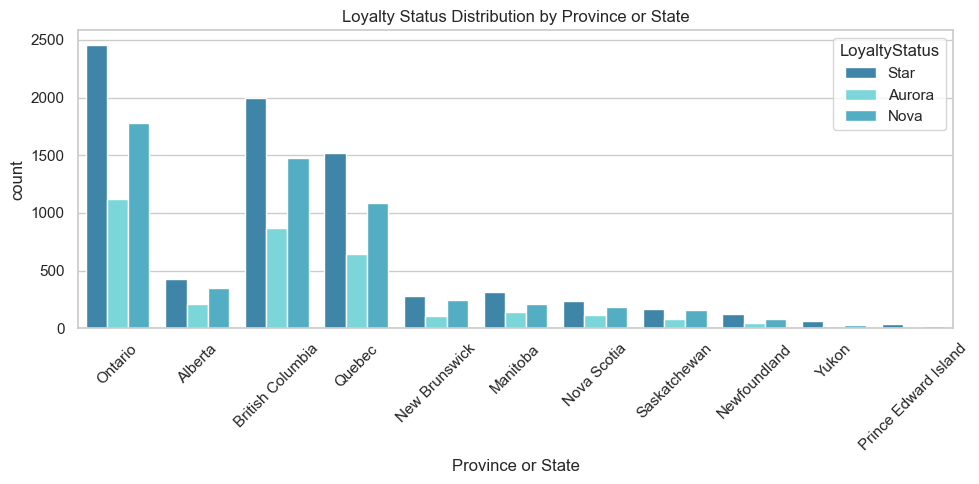

In [546]:
sns.set_style('whitegrid')

top_cities = (
    CustomerDB['City']
    .value_counts()
    .nlargest(10)
    .index
)

df_top = CustomerDB[CustomerDB['City'].isin(top_cities)]

# Custom colors
custom_colors = ['#2d8bba', '#6ce5e8', '#41b8d5', '#2e425a']

# ===========================
# 1️⃣ Income by Province
plt.figure(figsize=(10, 5))
province_categories = CustomerDB['Province or State'].dropna().unique()
palette_province = {cat: custom_colors[i % len(custom_colors)] for i, cat in enumerate(province_categories)}

sns.boxplot(
    data=CustomerDB,
    x='Province or State',
    y='Income',
    palette=palette_province
)
plt.title('Income Distribution by Province or State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ===========================
# 2️⃣ Income by City (Top 10)
plt.figure(figsize=(10, 5))
city_categories = df_top['City'].dropna().unique()
palette_city = {cat: custom_colors[i % len(custom_colors)] for i, cat in enumerate(city_categories)}

sns.boxplot(
    data=df_top,
    x='City',
    y='Income',
    palette=palette_city
)
plt.title('Income Distribution by City (Top 10)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ===========================
# 3️⃣ LoyaltyStatus by Province
plt.figure(figsize=(10, 5))
loyalty_categories = CustomerDB['LoyaltyStatus'].dropna().unique()
palette_loyalty = {cat: custom_colors[i % len(custom_colors)] for i, cat in enumerate(loyalty_categories)}

sns.countplot(
    data=CustomerDB,
    x='Province or State',
    hue='LoyaltyStatus',
    palette=palette_loyalty
)
plt.title('Loyalty Status Distribution by Province or State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The proportion of each status is equal, independently of the city, which means that does not influence anything.

## FlightsDB

### Univariate Analysis

#### Numerical Features

In [547]:
# Remove 'Loyalty#' from the list if it exists
numerical_columns_flights = [col for col in numerical_columns_flights if col != 'Loyalty#']

# Print unique values for each numeric column
for col in numerical_columns_flights:
    print(f'{col}: {FlightsDB[col].unique()}')


Year: [2021 2020 2019]
Month: [12  6  5  4  3  2  1 11 10  9  8  7]
NumFlights: [ 2  0 10 16  9 12 17  6 11  7  3 13 14  8  5  4  1 15 18 20 19 21]
NumFlightsWithCompanions: [ 2  0  3  4  7  9  5  6  1  8 10 11]
DistanceKM: [ 9384.      0.  14745.  ... 11732.4 31998.6 26789.4]
PointsAccumulated: [ 938    0 1474 ... 4107   23   21]
PointsRedeemed: [   0 3213 4638 ... 5691 4598 5527]
DollarCostPointsRedeemed: [ 0.  32.  46.  40.  51.  62.  48.  50.  59.  43.  37.  41.  53.  56.
 31.  30.  63.  33.  44.  58.  60.  57.  36.  29.  42.  54.  45.  35.
 67.  39.  65.  34.  61.  66.  38.  47.  55.  68.  69.  64.  52.  49.
 71.  72.  27.  28.  70.  25.  26.  24.  23.  21.  22.  74.  73.  32.4
 36.9 27.9 21.6 26.1 31.5 33.3 22.5 40.5 28.8 37.8 24.3 20.7 29.7 30.6
 35.1 25.2 23.4 34.2 41.4 39.6 19.8 38.7 18.9 51.3 42.3 52.2 50.4 45.9
 47.7 48.6 43.2 46.8 44.1 49.5 53.1 57.6 60.3 62.1 54.9 58.5 55.8 56.7
 63.9 61.2 64.8 59.4 65.7 66.6]


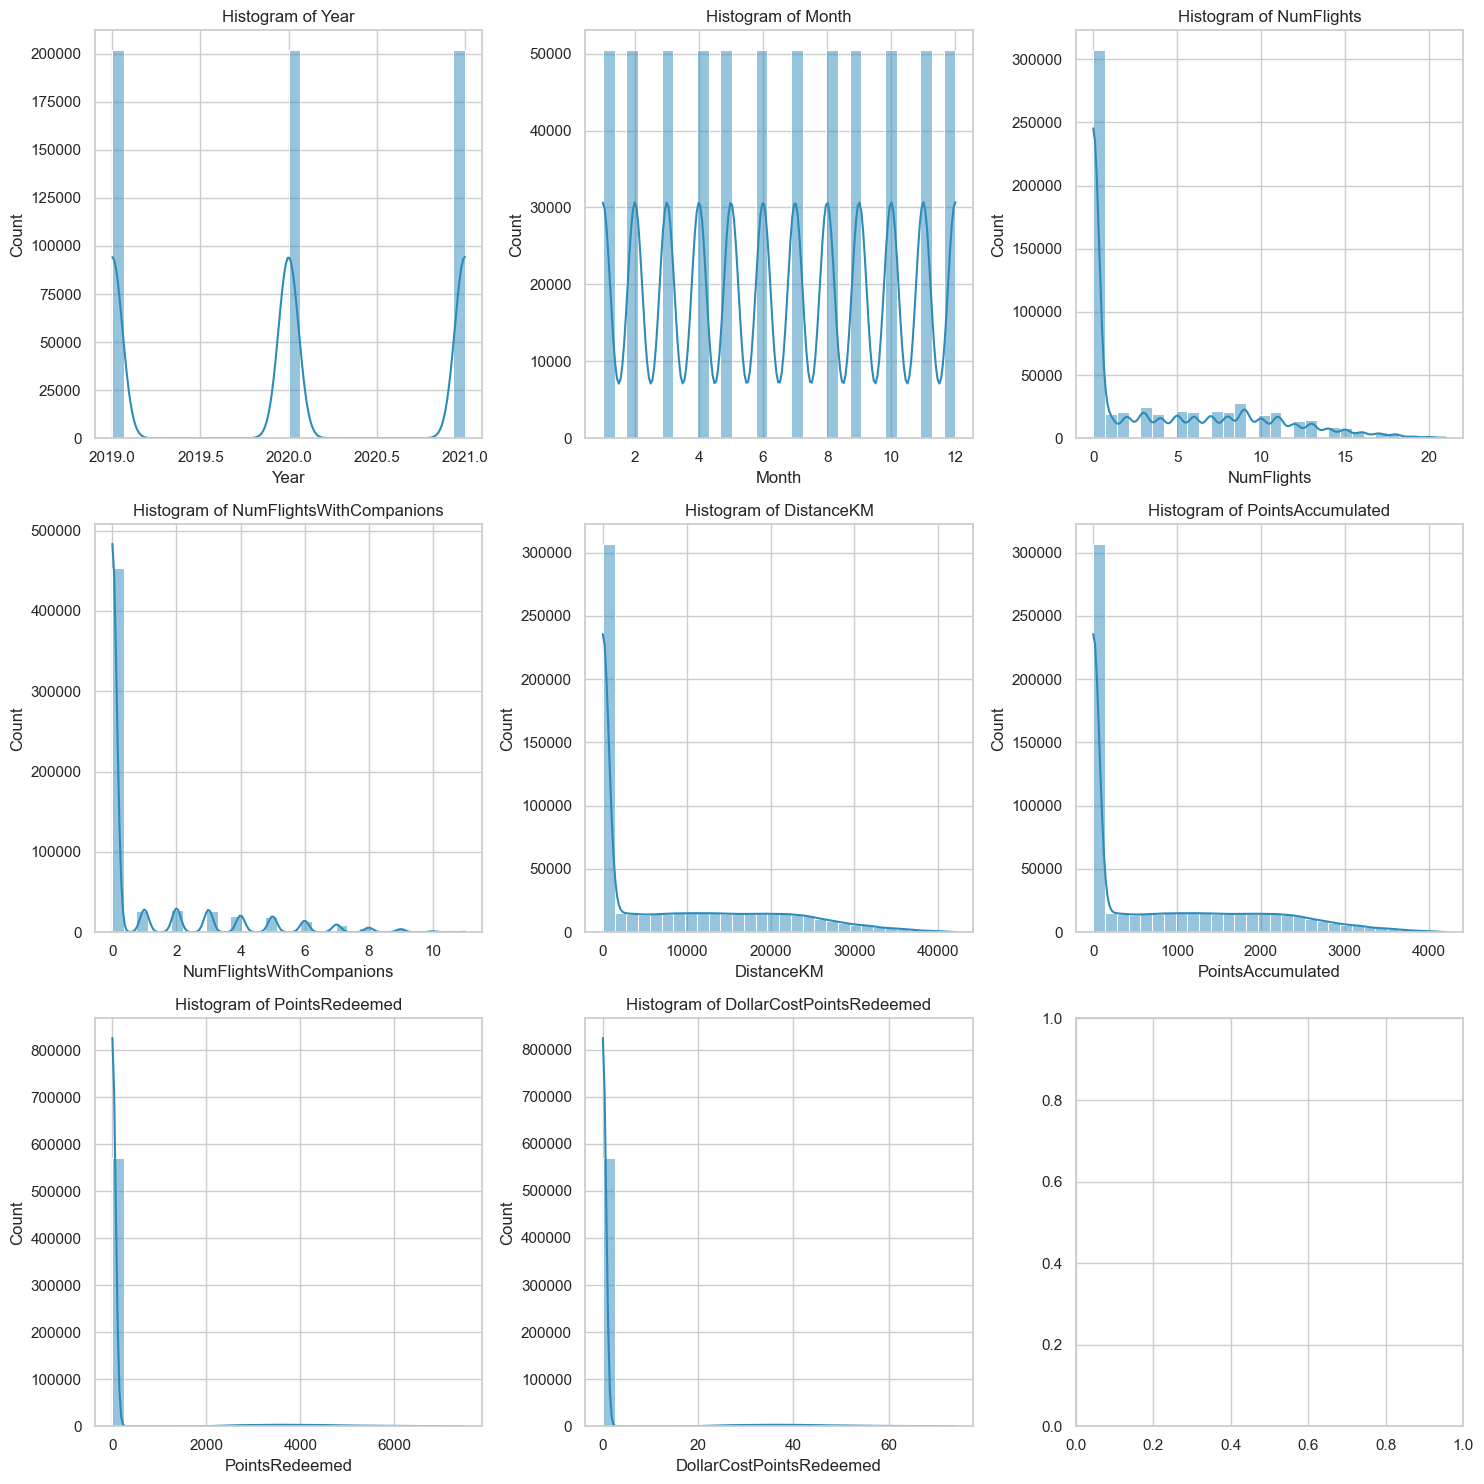

In [548]:
num_cols = len(numerical_columns_flights)
num_rows= (num_cols + 2)//3
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axes = axes.flatten()

for i, col in enumerate(numerical_columns_flights):
    sns.histplot(FlightsDB[col], bins=30, kde=True, color='#2d8bba', ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

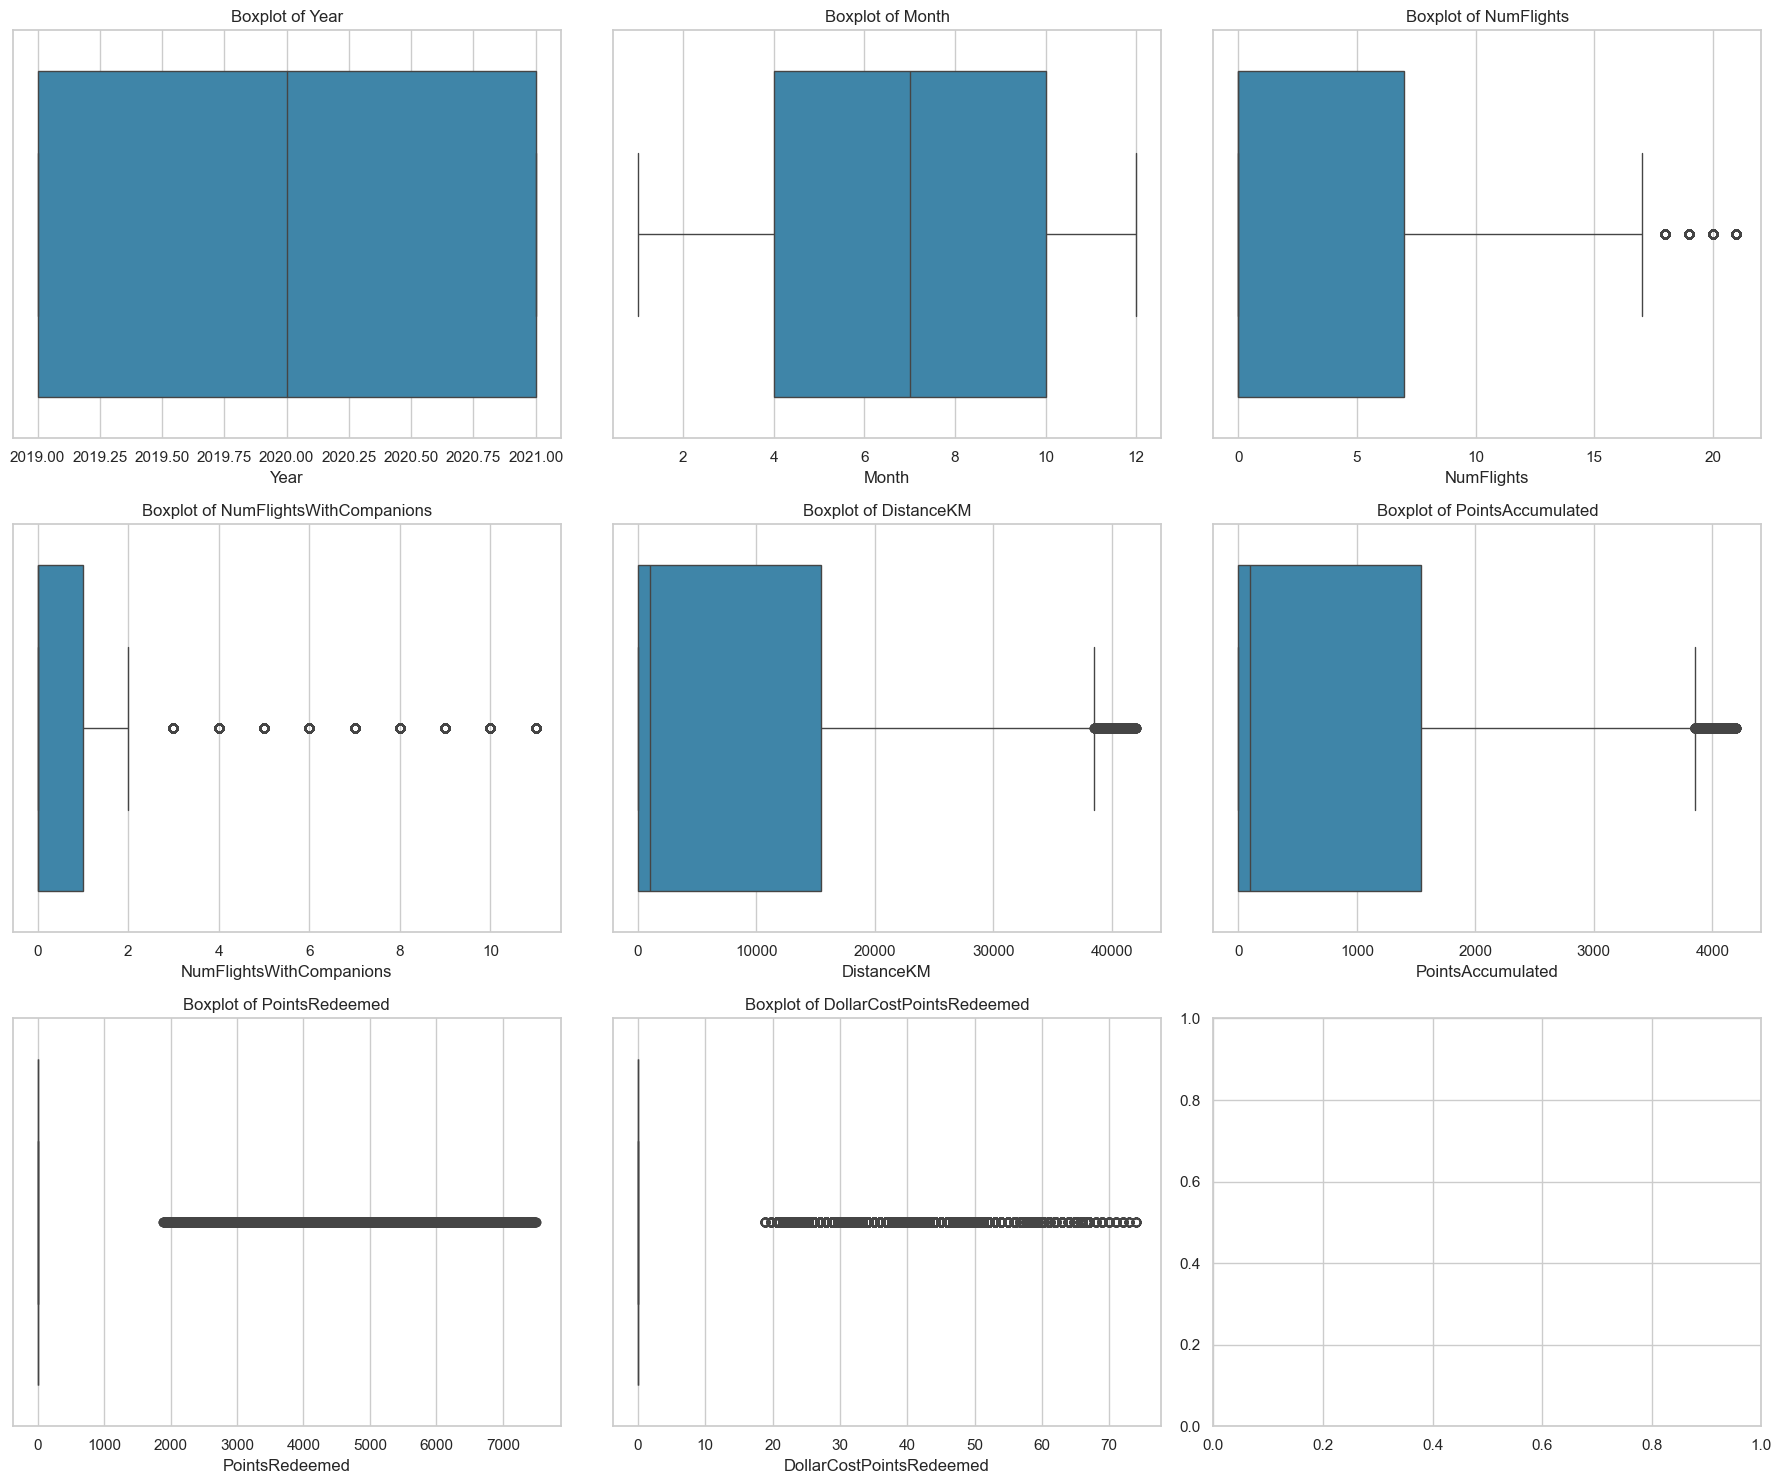

In [549]:
num_vars = 8
num_cols = 3
num_rows = (num_vars + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(6*num_cols, 5*num_rows))
axes = axes.flatten()

for i, col in enumerate(numerical_columns_flights):
    sns.boxplot(x=FlightsDB[col], color='#2d8bba', ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

##### Outliers

In [550]:
outliers = ['NumFlights', 'NumFlightsWithCompanions', 'DistanceKM']

outlier_bounds = {}
outliers_data = {}

for col in outliers:
    Q1 = FlightsDB[col].quantile(0.25)
    Q3 = FlightsDB[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_bounds[col] = (lower_bound, upper_bound)

    # Get outliers for this column
    outliers_data[col] = FlightsDB[(FlightsDB[col] < lower_bound) | (FlightsDB[col] > upper_bound)].sort_values(by=col, ascending=False)

# Print results
for col in outliers:
    lb, ub = outlier_bounds[col]
    print(f"{col} - Lower bound: {lb}, Upper bound: {ub}")
    print(f"Number of outliers in {col}: {len(outliers_data[col])}\n")


NumFlights - Lower bound: -10.5, Upper bound: 17.5
Number of outliers in NumFlights: 6919

NumFlightsWithCompanions - Lower bound: -1.5, Upper bound: 2.5
Number of outliers in NumFlightsWithCompanions: 97348

DistanceKM - Lower bound: -23113.35, Upper bound: 38522.25
Number of outliers in DistanceKM: 1830



In [551]:
for col, df_outliers in outliers_data.items():
    print(f"Outliers for column: {col}")

    #See the first and last 2 rows for each outlier column
    values = pd.concat([df_outliers[col].head(2), df_outliers[col].tail(2)])

    print(values)
    print("\n" + "-"*50 + "\n")


Outliers for column: NumFlights
227374    21
380969    21
522517    18
522607    18
Name: NumFlights, dtype: int64

--------------------------------------------------

Outliers for column: NumFlightsWithCompanions
383022    11
199782    11
608367     3
403310     3
Name: NumFlightsWithCompanions, dtype: int64

--------------------------------------------------

Outliers for column: DistanceKM
390460    42040.0
227550    42013.0
118773    38527.0
211459    38526.0
Name: DistanceKM, dtype: float64

--------------------------------------------------



In [552]:
outliers = ['PointsAccumulated', 'PointsRedeemed', 'DollarCostPointsRedeemed']

outlier_bounds = {}
outliers_data = {}

for col in outliers:
    Q1 = FlightsDB[col].quantile(0.25)
    Q3 = FlightsDB[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_bounds[col] = (lower_bound, upper_bound)

    # Get outliers for this column
    outliers_data[col] = FlightsDB[(FlightsDB[col] < lower_bound) | (FlightsDB[col] > upper_bound)].sort_values(by=col, ascending=False)

# Print results
for col in outliers:
    lb, ub = outlier_bounds[col]
    print(f"{col} - Lower bound: {lb}, Upper bound: {ub}")
    print(f"Number of outliers in {col}: {len(outliers_data[col])}\n")


PointsAccumulated - Lower bound: -2310.0, Upper bound: 3850.0
Number of outliers in PointsAccumulated: 1842

PointsRedeemed - Lower bound: 0.0, Upper bound: 0.0
Number of outliers in PointsRedeemed: 35393

DollarCostPointsRedeemed - Lower bound: 0.0, Upper bound: 0.0
Number of outliers in DollarCostPointsRedeemed: 35393



In [553]:
for col, df_outliers in outliers_data.items():
    print(f"Outliers for column: {col}")

    #See the first and last 2 rows for each outlier column
    values = pd.concat([df_outliers[col].head(2), df_outliers[col].tail(2)])

    print(values)
    print("\n" + "-"*50 + "\n")


Outliers for column: PointsAccumulated
390460    4204
227550    4201
233268    3851
1166      3851
Name: PointsAccumulated, dtype: int64

--------------------------------------------------

Outliers for column: PointsRedeemed
213042    7496
371432    7496
431868    1894
422605    1890
Name: PointsRedeemed, dtype: int64

--------------------------------------------------

Outliers for column: DollarCostPointsRedeemed
369122    74.0
369358    74.0
425032    18.9
438781    18.9
Name: DollarCostPointsRedeemed, dtype: float64

--------------------------------------------------



##### Active Redeemer

In [554]:
# Ensure dataset is sorted by customer and month
FlightsDB = FlightsDB.sort_values(by=['Loyalty#', 'Month'])  # Replace 'Month' with your actual time variable

# Compute the ActiveRedeemer flag per customer
active_redeemer = (
    FlightsDB
    .groupby('Loyalty#')
    .apply(lambda g: (g.tail(3)['PointsRedeemed'] > 0).any())  # last 3 months
    .astype(int)
)

# Map the result back to FlightsDB
FlightsDB['ActiveRedeemer'] = FlightsDB['Loyalty#'].map(active_redeemer)


In [555]:
# Percentage of active redeemers
redeemer_stats = FlightsDB[['Loyalty#', 'ActiveRedeemer']].drop_duplicates()
redeemer_ratio = redeemer_stats['ActiveRedeemer'].mean() * 100

print(f"Active redeemers: {redeemer_stats['ActiveRedeemer'].sum()} customers "
      f"({redeemer_ratio:.2f}% of all customers).")


Active redeemers: 2066 customers (12.34% of all customers).


### Analysing Customers Behaviour and Sazonality in FlightsDB

#### Agg_Sum

In [556]:
import matplotlib.pyplot as plt
import numpy as np


agg_sum = FlightsDB.groupby('Loyalty#').agg({
    'NumFlights': 'sum',
    'NumFlightsWithCompanions':'sum',
    'PointsAccumulated': 'sum',
    'PointsRedeemed': 'sum',
    'DistanceKM': 'sum',
    'DollarCostPointsRedeemed': 'sum'
}).reset_index()

# Rename columns
agg_sum.rename(columns={
    'NumFlights': 'TotalFlights',
    'NumFlightsWithCompanions':'TotalFlightsWithCompanion',
    'PointsAccumulated': 'TotalPointsAccumulated',
    'PointsRedeemed': 'TotalPointsRedeemed',
    'DistanceKM': 'TotalDistanceKM',
    'DollarCostPointsRedeemed': 'TotalDollarCostPointsRedeemed'
}, inplace=True)


In [557]:
flight_counts = agg_sum['TotalFlights'].value_counts().sort_index()

flight_percentages = (flight_counts / flight_counts.sum()) * 100

freq_table = pd.DataFrame({
    'NumFlights': flight_counts.index,
    'Count': flight_counts.values,
    'Percentage': flight_percentages.values
})

freq_table_sorted = freq_table.sort_values(by='Percentage', ascending=False)

freq_table_sorted.head()

NumFlights  Count  Percentage
0             0   1501    8.968154
187         187    117    0.699050
206         206    116    0.693075
193         193    115    0.687100
181         181    114    0.681126

In [558]:
# Ratio of points redeemed vs points accumulated
agg_sum['PointsRedeemedRatio'] = agg_sum['TotalPointsRedeemed'] / agg_sum['TotalPointsAccumulated']

# Ratio of flights with companions vs total flights
agg_sum['FlightsWithCompanionsRatio'] = agg_sum['TotalFlightsWithCompanion'] / agg_sum['TotalFlights']

# Average distance per flight
agg_sum['AvgDistancePerFlight'] = np.where(
    agg_sum['TotalFlights'] == 0,
    np.nan,
    agg_sum['TotalDistanceKM'] / agg_sum['TotalFlights']
)

agg_sum['NetPointsPerFlight'] = np.where(
    agg_sum['TotalFlights'] == 0,
    np.nan,
    (agg_sum['TotalPointsAccumulated'] - agg_sum['TotalPointsRedeemed']) / agg_sum['TotalFlights']
)


In [559]:
# Overall points redeemed ratio (percentage)
total_points_redeemed = agg_sum['TotalPointsRedeemed'].sum()
total_points_accumulated = agg_sum['TotalPointsAccumulated'].sum()

overall_points_redeemed_pct = (total_points_redeemed / total_points_accumulated) * 100

print(f"Overall Points Redeemed Ratio: {overall_points_redeemed_pct:.2f}%")


Overall Points Redeemed Ratio: 29.64%


#### Agg_mean

In [560]:
import pandas as pd

FlightsDB = FlightsDB.copy()
agg_mean = FlightsDB.groupby('Loyalty#').agg({
    'NumFlights': 'mean',
    'NumFlightsWithCompanions': 'mean',
    'PointsAccumulated': 'mean',
    'PointsRedeemed': 'mean',
    'DollarCostPointsRedeemed': 'mean',
    'DistanceKM': 'mean'
}).reset_index()


agg_mean.rename(columns={
    'NumFlights': 'AvgMonthlyFlights',
    'NumFlightsWithCompanions': 'AvgFlightsWithCompanions',
    'PointsAccumulated': 'AvgPointsAccumulated',
    'PointsRedeemed': 'AvgPointsRedeemed',
    'DollarCostPointsRedeemed': 'AvgDollarCostPointsRedeemed',
    'DistanceKM': 'AvgDistanceKM'
}, inplace=True)

max_flights = agg_mean['AvgMonthlyFlights'].max()

bins = [0, 1, 3, 5, 7, 10, max_flights + 1]
labels = ['0-1', '1-3', '3-5', '5-7', '7-10', '10+']

flight_bins = pd.cut(
    agg_mean['AvgMonthlyFlights'],
    bins=bins,
    labels=labels,
    right=False
)


flight_counts = flight_bins.value_counts().sort_index()
flight_percent = (flight_counts / flight_counts.sum()) * 100

flight_summary = pd.DataFrame({
    'FlightRange': flight_counts.index,
    'NumberOfCustomers': flight_counts.values,
    'Percentage': flight_percent.values.round(2)
})

print(flight_summary)


  FlightRange  NumberOfCustomers  Percentage
0         0-1               2827       16.89
1         1-3               2523       15.07
2         3-5               5135       30.68
3         5-7               5670       33.88
4        7-10                582        3.48
5         10+                  0        0.00


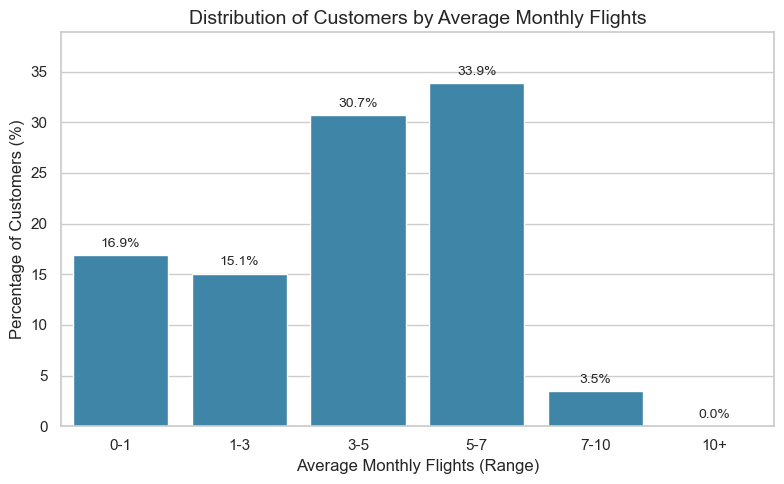

In [561]:
sns.set(style='whitegrid')

plt.figure(figsize=(8,5))

sns.barplot(
    x='FlightRange',
    y='Percentage',
    data=flight_summary,
    color='#2d8bba'  # updated color
)

plt.xlabel('Average Monthly Flights (Range)', fontsize=12)
plt.ylabel('Percentage of Customers (%)', fontsize=12)
plt.title('Distribution of Customers by Average Monthly Flights', fontsize=14)
plt.ylim(0, flight_summary['Percentage'].max() + 5)

# Add percentage labels on top of bars
for index, row in flight_summary.iterrows():
    plt.text(index, row['Percentage'] + 0.5, f"{row['Percentage']:.1f}%",
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [562]:
agg_mean['AvgFlightsWithCompanions'] = pd.to_numeric(
    agg_mean['AvgFlightsWithCompanions'], errors='coerce'
).fillna(0)

max_val = agg_mean['AvgFlightsWithCompanions'].max()

bins = [0, 1, 3, 5, 10]
if max_val > 10:
    bins.append(max_val + 1)
else:
    bins.append(11)

labels = ['0-1', '1-3', '3-5', '5-10', '10+']

temp = pd.cut(
    agg_mean['AvgFlightsWithCompanions'],
    bins=bins,
    labels=labels,
    right=False,
    include_lowest=True
)

counts = temp.value_counts().sort_index()

percent = (counts / counts.sum()) * 100

summary = pd.DataFrame({
    'Range': counts.index,
    'NumberOfCustomers': counts.values,
    'Percentage': percent.values
})

print(summary)


  Range  NumberOfCustomers  Percentage
0   0-1               8632   51.574356
1   1-3               8097   48.377845
2   3-5                  8    0.047798
3  5-10                  0    0.000000
4   10+                  0    0.000000


#### New FlightsDB

In [563]:
FlightsDB_agg = pd.merge(agg_sum, agg_mean, how='inner', on='Loyalty#')
FlightsDB_agg

Loyalty#  TotalFlights  TotalFlightsWithCompanion  \
0       100018           225                         45   
1       100102           245                         55   
2       100140           211                         51   
3       100214           108                         17   
4       100272           181                         50   
...        ...           ...                        ...   
16732   999902           261                         72   
16733   999911             0                          0   
16734   999940            84                         27   
16735   999982            22                          2   
16736   999986           181                         22   

       TotalPointsAccumulated  TotalPointsRedeemed  TotalDistanceKM  \
0                       53008                20562         530230.0   
1                       33900                18759         339114.6   
2                       43189                 4896         432030.8   
3                       36451                12907         364601.7   
4                       42949                10891         429630.5   
...                       ...                  ...              ...   
16732                   61002                10501         610159.5   
16733                       0                    0              0.0   
16734                   23855                 5620         238578.9   
16735                    5264                    0          52654.0   
16736                   34502                18049         345117.6   

       TotalDollarCostPointsRedeemed  PointsRedeemedRatio  \
0                              201.9             0.387904   
1                              186.2             0.553363   
2                               48.0             0.113362   
3                              127.3             0.354092   
4                              107.0             0.253580   
...                              ...                  ...   
16732                          103.1             0.172142   
16733                            0.0                  NaN   
16734                           56.0             0.235590   
16735                            0.0             0.000000   
16736                          177.8             0.523129   

       FlightsWithCompanionsRatio  AvgDistancePerFlight  NetPointsPerFlight  \
0                        0.200000           2356.577778          144.204444   
1                        0.224490           1384.141224           61.800000   
2                        0.241706           2047.539336          181.483412   
3                        0.157407           3375.941667          218.000000   
4                        0.276243           2373.649171          177.116022   
...                           ...                   ...                 ...   
16732                    0.275862           2337.775862          193.490421   
16733                         NaN                   NaN                 NaN   
16734                    0.321429           2840.225000          217.083333   
16735                    0.090909           2393.363636          239.272727   
16736                    0.121547           1906.727072           90.900552   

       AvgMonthlyFlights  AvgFlightsWithCompanions  AvgPointsAccumulated  \
0               6.250000                  1.250000           1472.444444   
1               6.805556                  1.527778            941.666667   
2               5.861111                  1.416667           1199.694444   
3               3.000000                  0.472222           1012.527778   
4               5.027778                  1.388889           1193.027778   
...                  ...                       ...                   ...   
16732           7.250000                  2.000000           1694.500000   
16733           0.000000                  0.000000              0.000000   
16734           2.333333                  0.750000            662.638889   
16

In [564]:
FlightsDB_agg.columns

Index(['Loyalty#', 'TotalFlights', 'TotalFlightsWithCompanion',
       'TotalPointsAccumulated', 'TotalPointsRedeemed', 'TotalDistanceKM',
       'TotalDollarCostPointsRedeemed', 'PointsRedeemedRatio',
       'FlightsWithCompanionsRatio', 'AvgDistancePerFlight',
       'NetPointsPerFlight', 'AvgMonthlyFlights', 'AvgFlightsWithCompanions',
       'AvgPointsAccumulated', 'AvgPointsRedeemed',
       'AvgDollarCostPointsRedeemed', 'AvgDistanceKM'],
      dtype='object')

In [565]:
FlightsDB_agg.describe().round(2).T

count       mean        std      min  \
TotalFlights                   16737.0     139.13      80.36     0.00   
TotalFlightsWithCompanion      16737.0      33.89      22.65     0.00   
TotalPointsAccumulated         16737.0   28853.10   16687.04     0.00   
TotalPointsRedeemed            16737.0    8551.75    8751.40     0.00   
TotalDistanceKM                16737.0  288616.90  166916.27     0.00   
TotalDollarCostPointsRedeemed  16737.0      84.51      86.55     0.00   
PointsRedeemedRatio            15240.0       0.32       0.50     0.00   
FlightsWithCompanionsRatio     15236.0       0.25       0.12     0.00   
AvgDistancePerFlight           15236.0    2194.85    1236.87    26.68   
NetPointsPerFlight             15236.0     153.86     142.14 -4148.00   
AvgMonthlyFlights              16737.0       3.84       2.19     0.00   
AvgFlightsWithCompanions       16737.0       0.94       0.62     0.00   
AvgPointsAccumulated           16737.0     796.23     454.34     0.00   
AvgPointsRedeemed              16737.0     236.09     241.10     0.00   
AvgDollarCostPointsRedeemed    16737.0       2.33       2.38     0.00   
AvgDistanceKM                  16737.0    7964.70    4544.69     0.00   

                                     25%        50%        75%         max  
TotalFlights                       70.00     159.00     199.00      529.00  
TotalFlightsWithCompanion          15.00      35.00      50.00      140.00  
TotalPointsAccumulated          14405.00   33149.00   41390.00   105942.00  
TotalPointsRedeemed                 0.00    6519.00   13607.00    57524.00  
TotalDistanceKM                144081.00  331589.40  413994.20  1059681.00  
TotalDollarCostPointsRedeemed       0.00      64.60     134.70      572.00  
PointsRedeemedRatio                 0.07       0.25       0.44       33.27  
FlightsWithCompanionsRatio          0.18       0.24       0.31        1.00  
AvgDistancePerFlight             1761.81    2072.39    2427.52    43857.70  
NetPointsPerFlight                105.57     150.32     195.73     4385.00  
AvgMonthlyFlights                   1.94       4.42       5.53        9.53  
AvgFlightsWithCompanions            0.42       0.97       1.39        3.31  
AvgPointsAccumulated              399.53     920.06    1147.17     1979.42  
AvgPointsRedeemed                   0.00     180.22     375.89     1597.89  
AvgDollarCostPointsRedeemed         0.00       1.78       3.71       15.89  
AvgDistanceKM                    3996.19    9203.04   11474.55    19798.04

In [566]:
# Count total customers
total_customers = len(FlightsDB_agg)

# Count how many customers have not redeemed any points
no_redeem_customers = (FlightsDB_agg['TotalPointsRedeemed'] == 0).sum()

# Calculate the percentage
no_redeem_percentage = (no_redeem_customers / total_customers) * 100

# Print summary
print(f"Total customers: {total_customers}")
print(f"Customers with no redemptions: {no_redeem_customers}")
print(f"Percentage with no redemptions: {no_redeem_percentage:.2f}%")

avg_ratio = FlightsDB_agg['PointsRedeemedRatio'].mean() * 100
print(avg_ratio)
median_ratio = FlightsDB_agg['PointsRedeemedRatio'].median() * 100
print(median_ratio)

Total customers: 16737
Customers with no redemptions: 5177
Percentage with no redemptions: 30.93%
31.55199538776477
24.709577804518723


In [567]:
FlightsDB_agg['UnredeemedPoints'] = (
    FlightsDB_agg['TotalPointsAccumulated'] - FlightsDB_agg['TotalPointsRedeemed']
).clip(lower=0)

FlightsDB_agg['KMPerRedeemedPoint'] = (
    FlightsDB_agg['TotalDistanceKM'] / FlightsDB_agg['TotalPointsRedeemed']
).replace([float('inf'), -float('inf')], 0).fillna(0)

FlightsDB_agg['LoyaltyIndex'] = (
    FlightsDB_agg['AvgMonthlyFlights'] * 0.4 +
    FlightsDB_agg['AvgDistancePerFlight'] * 0.3 +
    FlightsDB_agg['PointsRedeemedRatio']*0.3
)



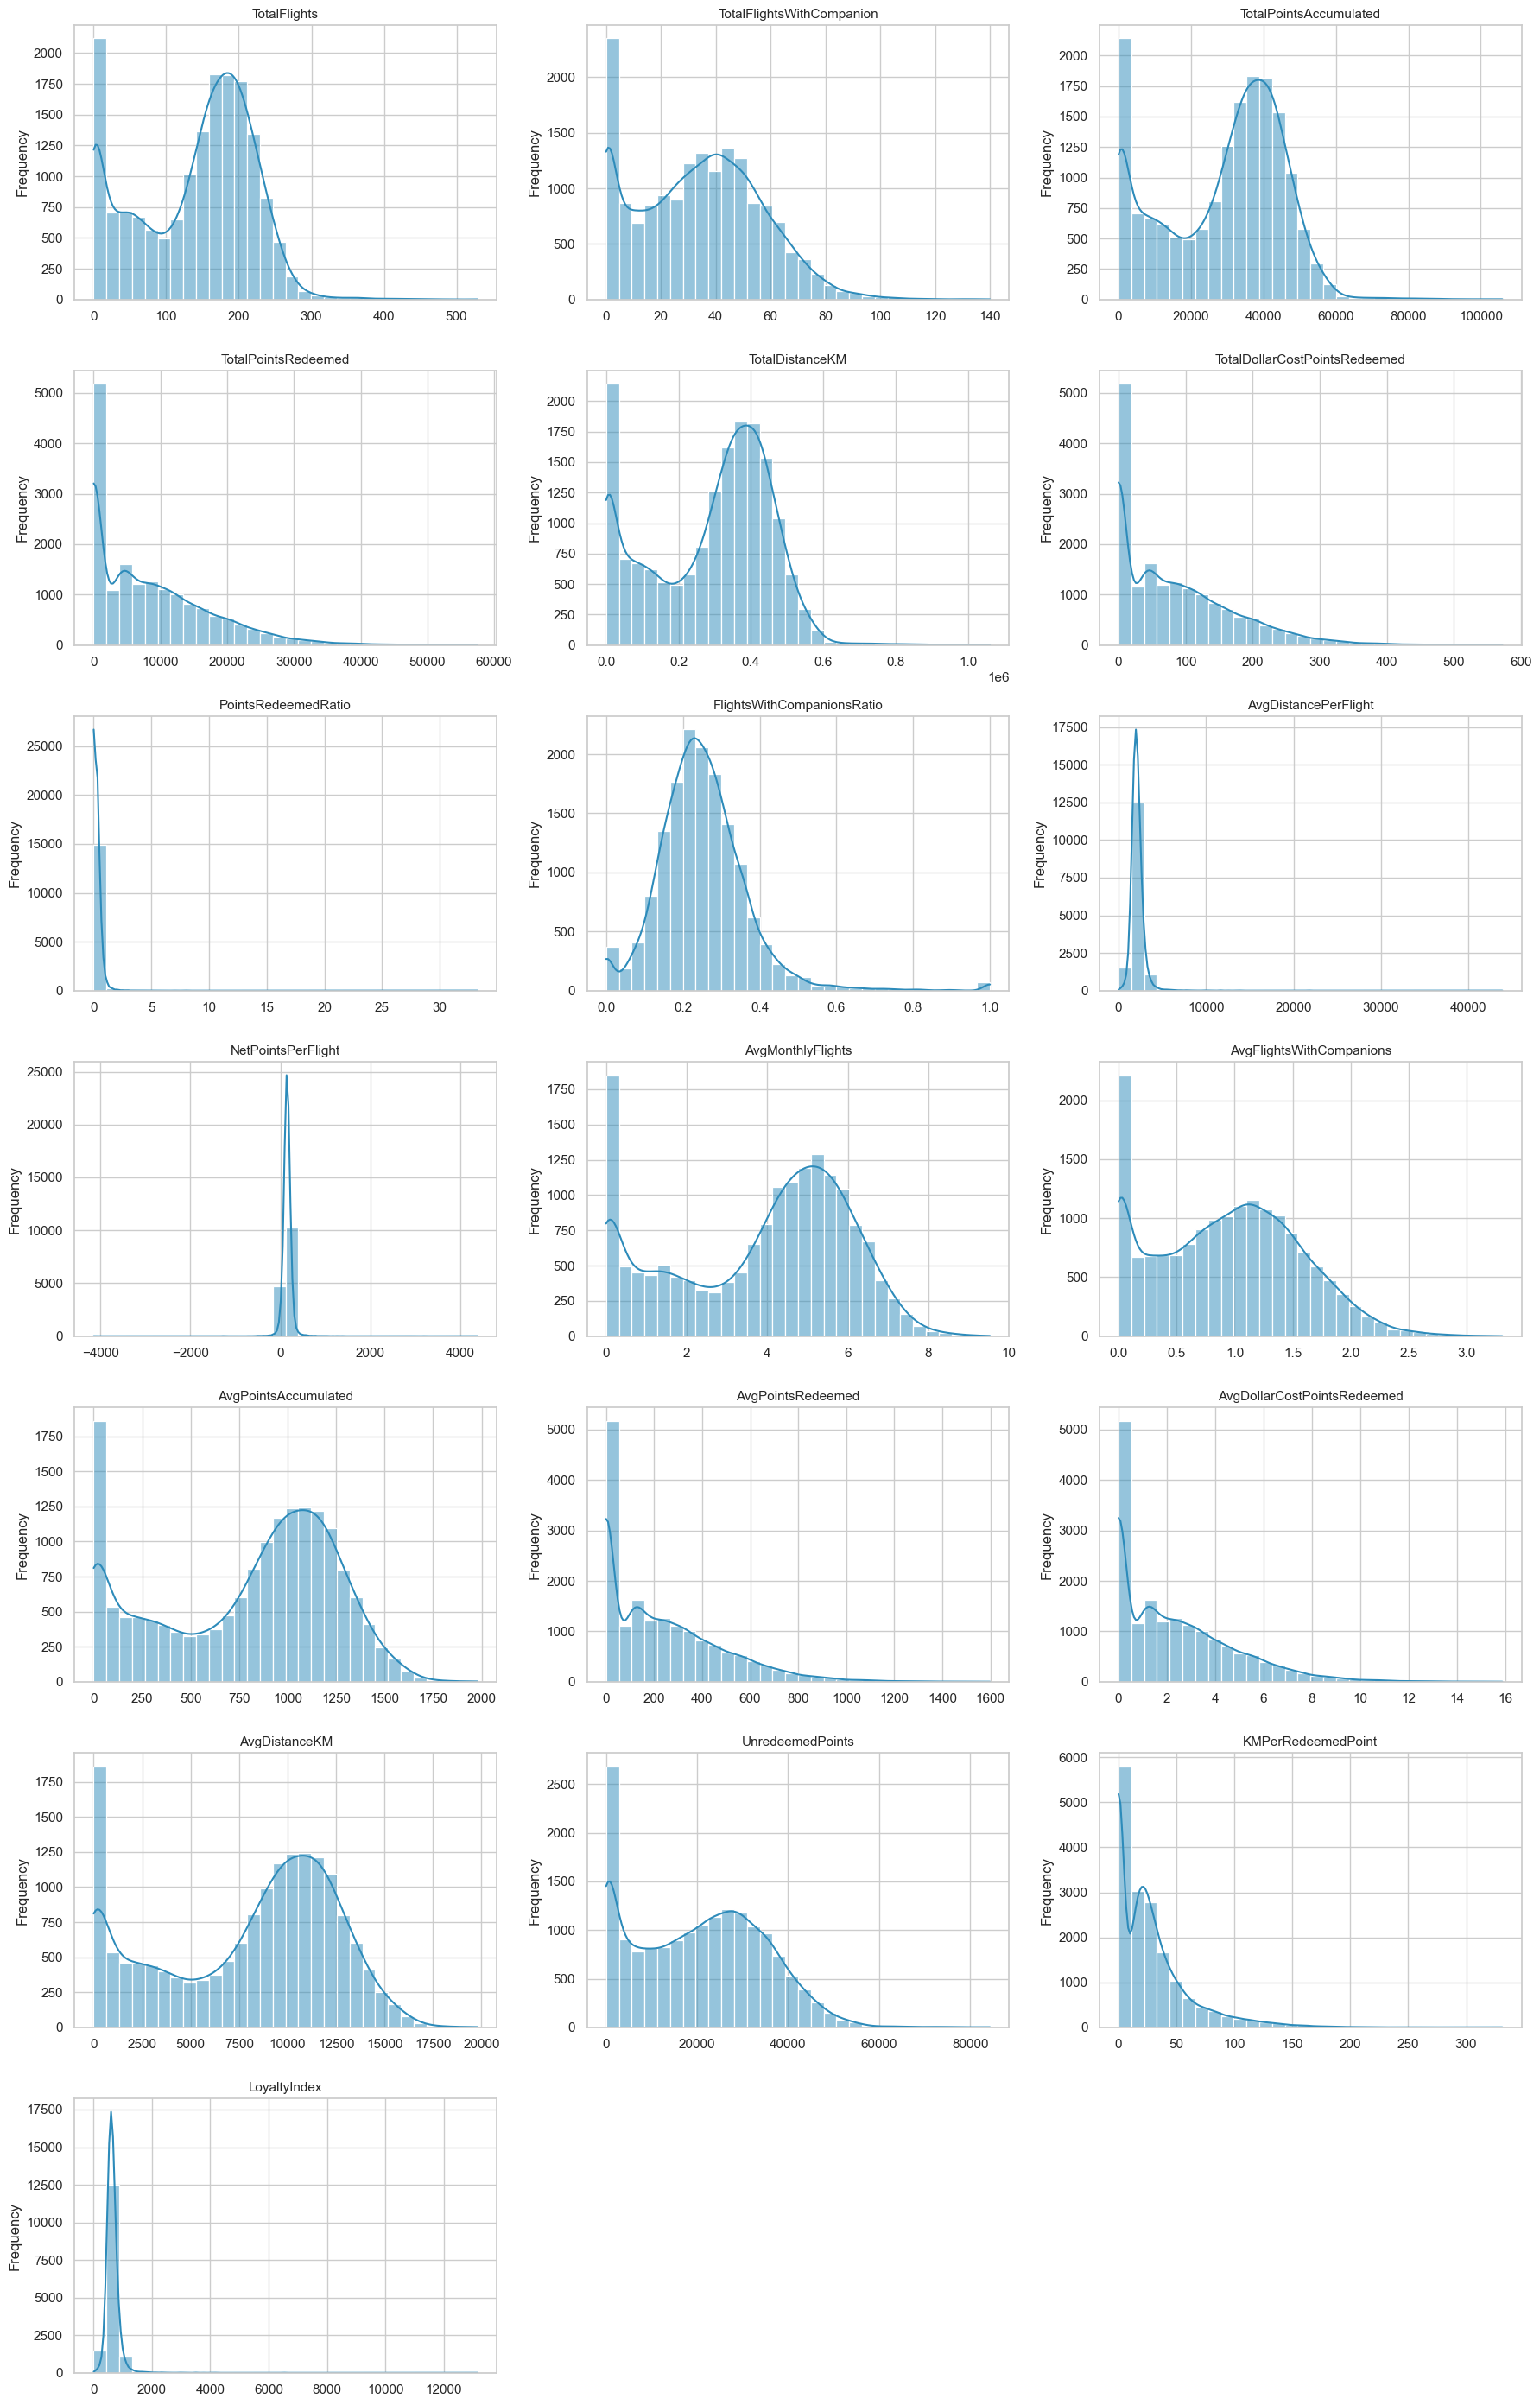

In [568]:

# Select only numeric columns
numerical_cols = FlightsDB_agg.select_dtypes(include='number').columns

# Calculate grid layout dynamically
n_metrics = len(numerical_cols)
n_cols = 3  # you can adjust this
n_rows = math.ceil(n_metrics / n_cols)

plt.figure(figsize=(18, n_rows * 4))
sns.set_style('whitegrid')

# Loop through numeric columns and plot each histogram
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(FlightsDB_agg[col], kde=True,  bins=30, color = '#2d8bba')
    plt.title(col, fontsize=11)
    plt.xlabel('')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


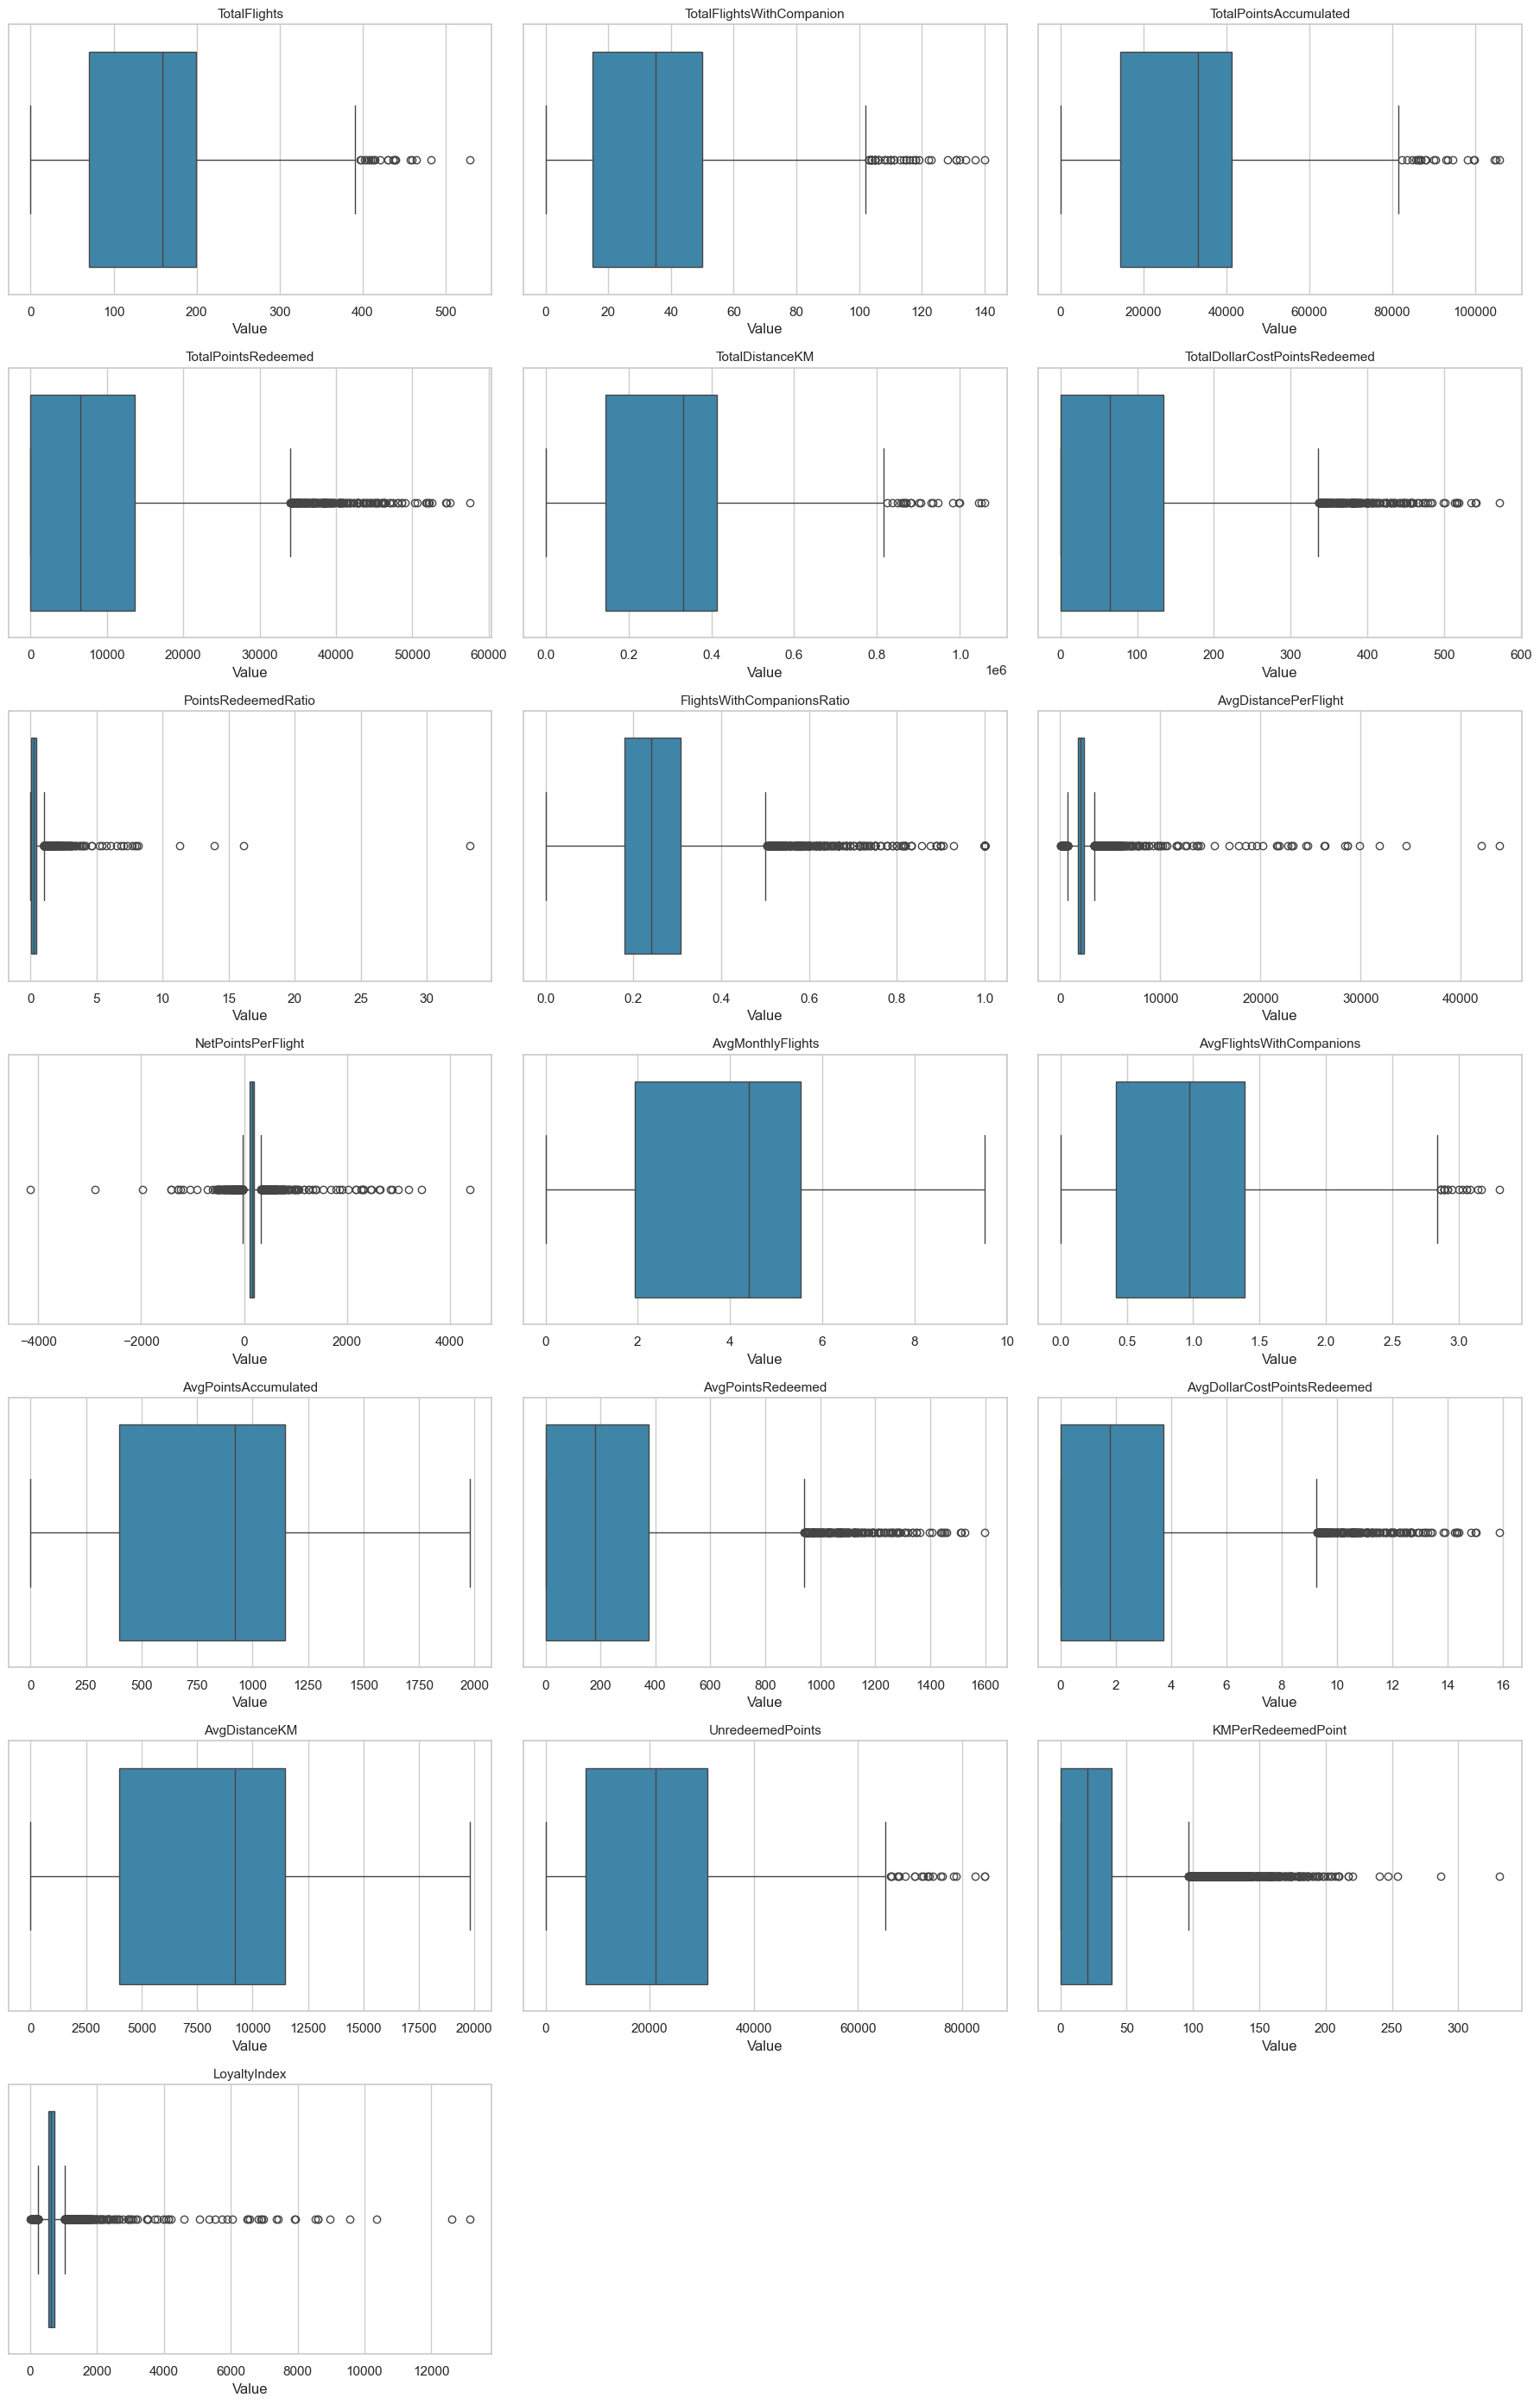

In [569]:
sns.set_style('whitegrid')

numerical_cols = FlightsDB_agg.select_dtypes(include='number').columns
n_metrics = len(numerical_cols)
n_cols = 3
n_rows = math.ceil(n_metrics / n_cols)

plt.figure(figsize=(18, n_rows * 4))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(data=FlightsDB_agg, x=col, color='#2d8bba', orient='h')
    plt.title(col, fontsize=11)
    plt.xlabel('Value')
    plt.ylabel('')

plt.tight_layout()
plt.show()


#### Bivariate and Multivariate Analysis

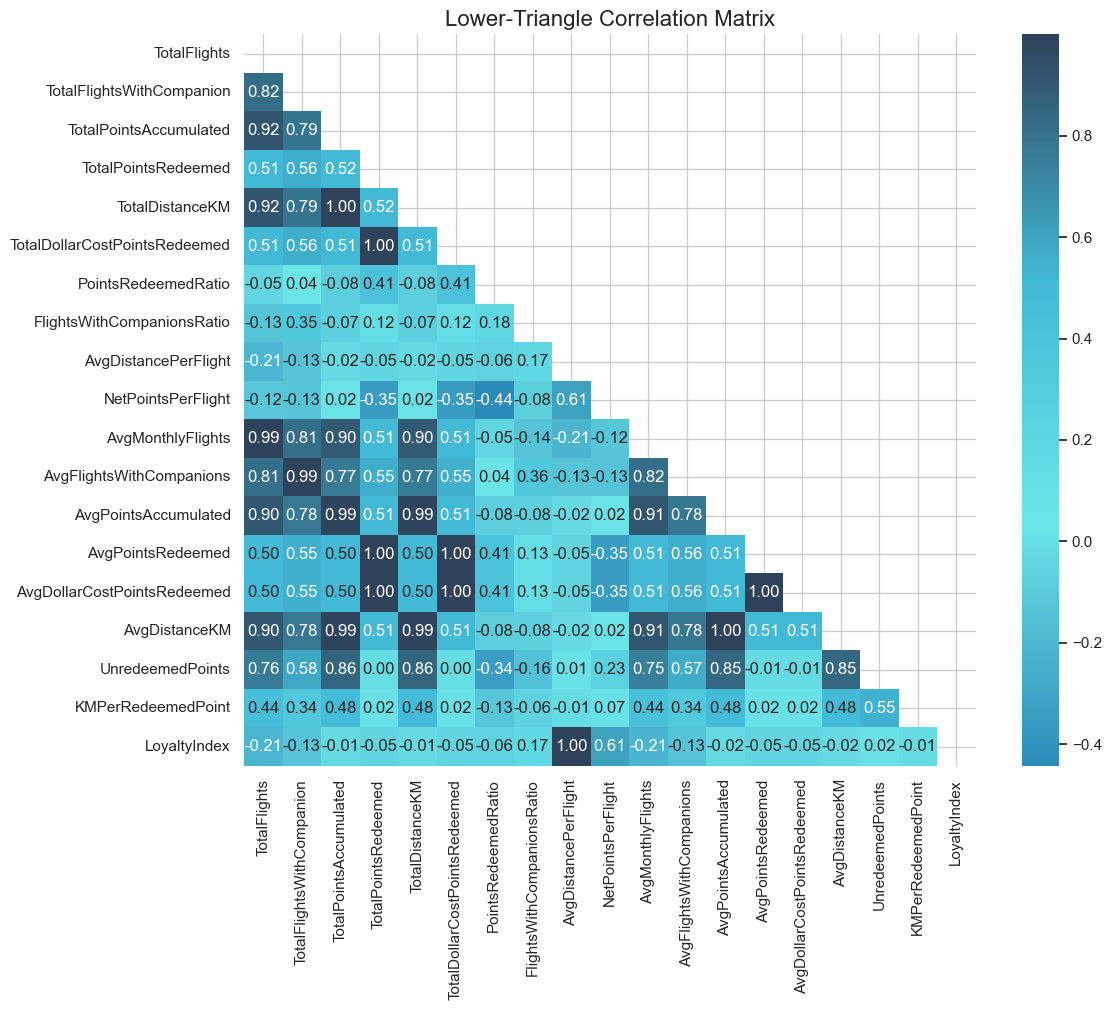

In [570]:
# Select numeric columns
numeric_cols = FlightsDB_agg.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = FlightsDB_agg[numeric_cols].corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Custom colormap from your colors
custom_colors = ['#2d8bba', '#6ce5e8', '#41b8d5', '#2e425a']
cmap = LinearSegmentedColormap.from_list("custom_cmap", custom_colors)

# Plot the lower-triangle heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap=cmap, cbar=True, square=True)
plt.title('Lower-Triangle Correlation Matrix', fontsize=16)
plt.tight_layout()
plt.show()


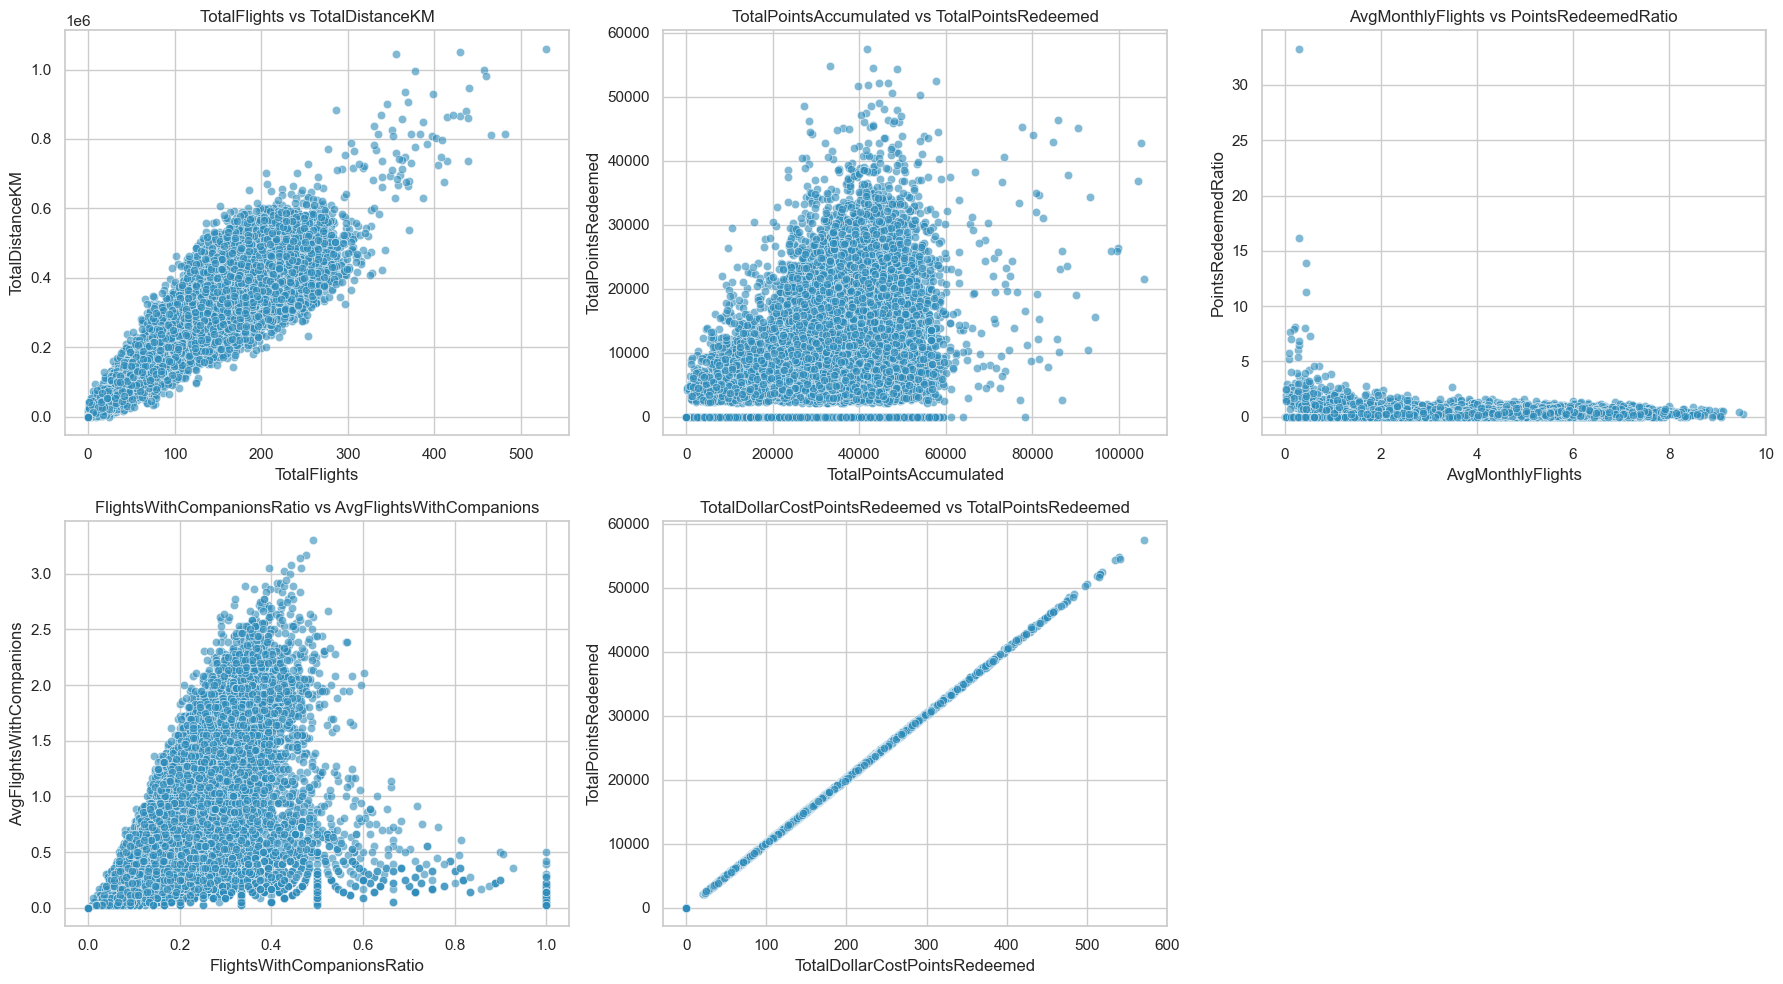

In [571]:
numeric_pairs = [
    ('TotalFlights', 'TotalDistanceKM'),
    ('TotalPointsAccumulated', 'TotalPointsRedeemed'),
    ('AvgMonthlyFlights', 'PointsRedeemedRatio'),
    ('FlightsWithCompanionsRatio', 'AvgFlightsWithCompanions'),
    ('TotalDollarCostPointsRedeemed', 'TotalPointsRedeemed')
    ]

n_pairs = len(numeric_pairs)
n_cols = 3
n_rows = (n_pairs + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*6, n_rows*5))
axes = axes.flatten()

for i, (x_var, y_var) in enumerate(numeric_pairs):
    sns.scatterplot(
        x=x_var, y=y_var, data=FlightsDB_agg, ax=axes[i], alpha=0.6, color = '#2d8bba'
    )
    axes[i].set_title(f'{x_var} vs {y_var}')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


#### High Value Customer

In [572]:
# --- Compute thresholds for segmentation ---
q1 = FlightsDB_agg['LoyaltyIndex'].quantile(0.25)
q2 = FlightsDB_agg['LoyaltyIndex'].quantile(0.50)
q3 = FlightsDB_agg['LoyaltyIndex'].quantile(0.75)

def segment_by_loyalty(row):
    if row['LoyaltyIndex'] >= q3:
        return 'High traveler and high redeemed'
    elif row['LoyaltyIndex'] >= q2:
        return 'Moderate traveler and high redeemed'
    elif row['LoyaltyIndex'] >= q1:
        return  'Moderate traveler and low redeemed'
    else:
        return  'Low traveler and low redeemed'

FlightsDB_agg['CustomerSegment'] = FlightsDB_agg.apply(segment_by_loyalty, axis=1)

# --- Summary ---
segment_counts = FlightsDB_agg['CustomerSegment'].value_counts()
print("\nCustomer Segments based on LoyaltyIndex:")
print(segment_counts)

# Optional: view LoyaltyIndex with segment
print(FlightsDB_agg[['LoyaltyIndex', 'CustomerSegment']].head())



Customer Segments based on LoyaltyIndex:
CustomerSegment
Low traveler and low redeemed          5310
Moderate traveler and high redeemed    3809
Moderate traveler and low redeemed     3809
High traveler and high redeemed        3809
Name: count, dtype: int64
   LoyaltyIndex                      CustomerSegment
0    709.589704  Moderate traveler and high redeemed
1    418.130598        Low traveler and low redeemed
2    616.640254   Moderate traveler and low redeemed
3   1014.088728      High traveler and high redeemed
4    714.181936  Moderate traveler and high redeemed


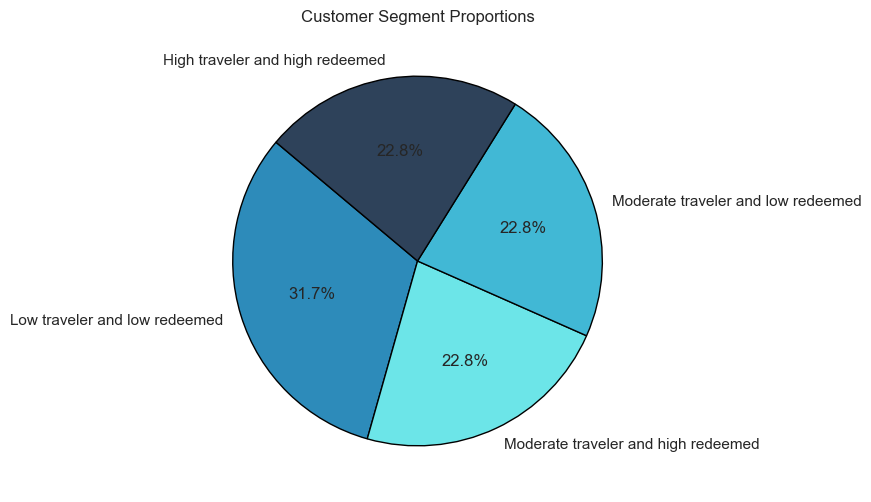

In [573]:
plt.figure(figsize=(6,6))

# Custom colors
custom_colors = ['#2d8bba', '#6ce5e8', '#41b8d5', '#2e425a']

# Pie chart
FlightsDB_agg['CustomerSegment'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=custom_colors,
    startangle=140,
    wedgeprops={'edgecolor': 'black'}
)

plt.ylabel('')
plt.title('Customer Segment Proportions')
plt.show()


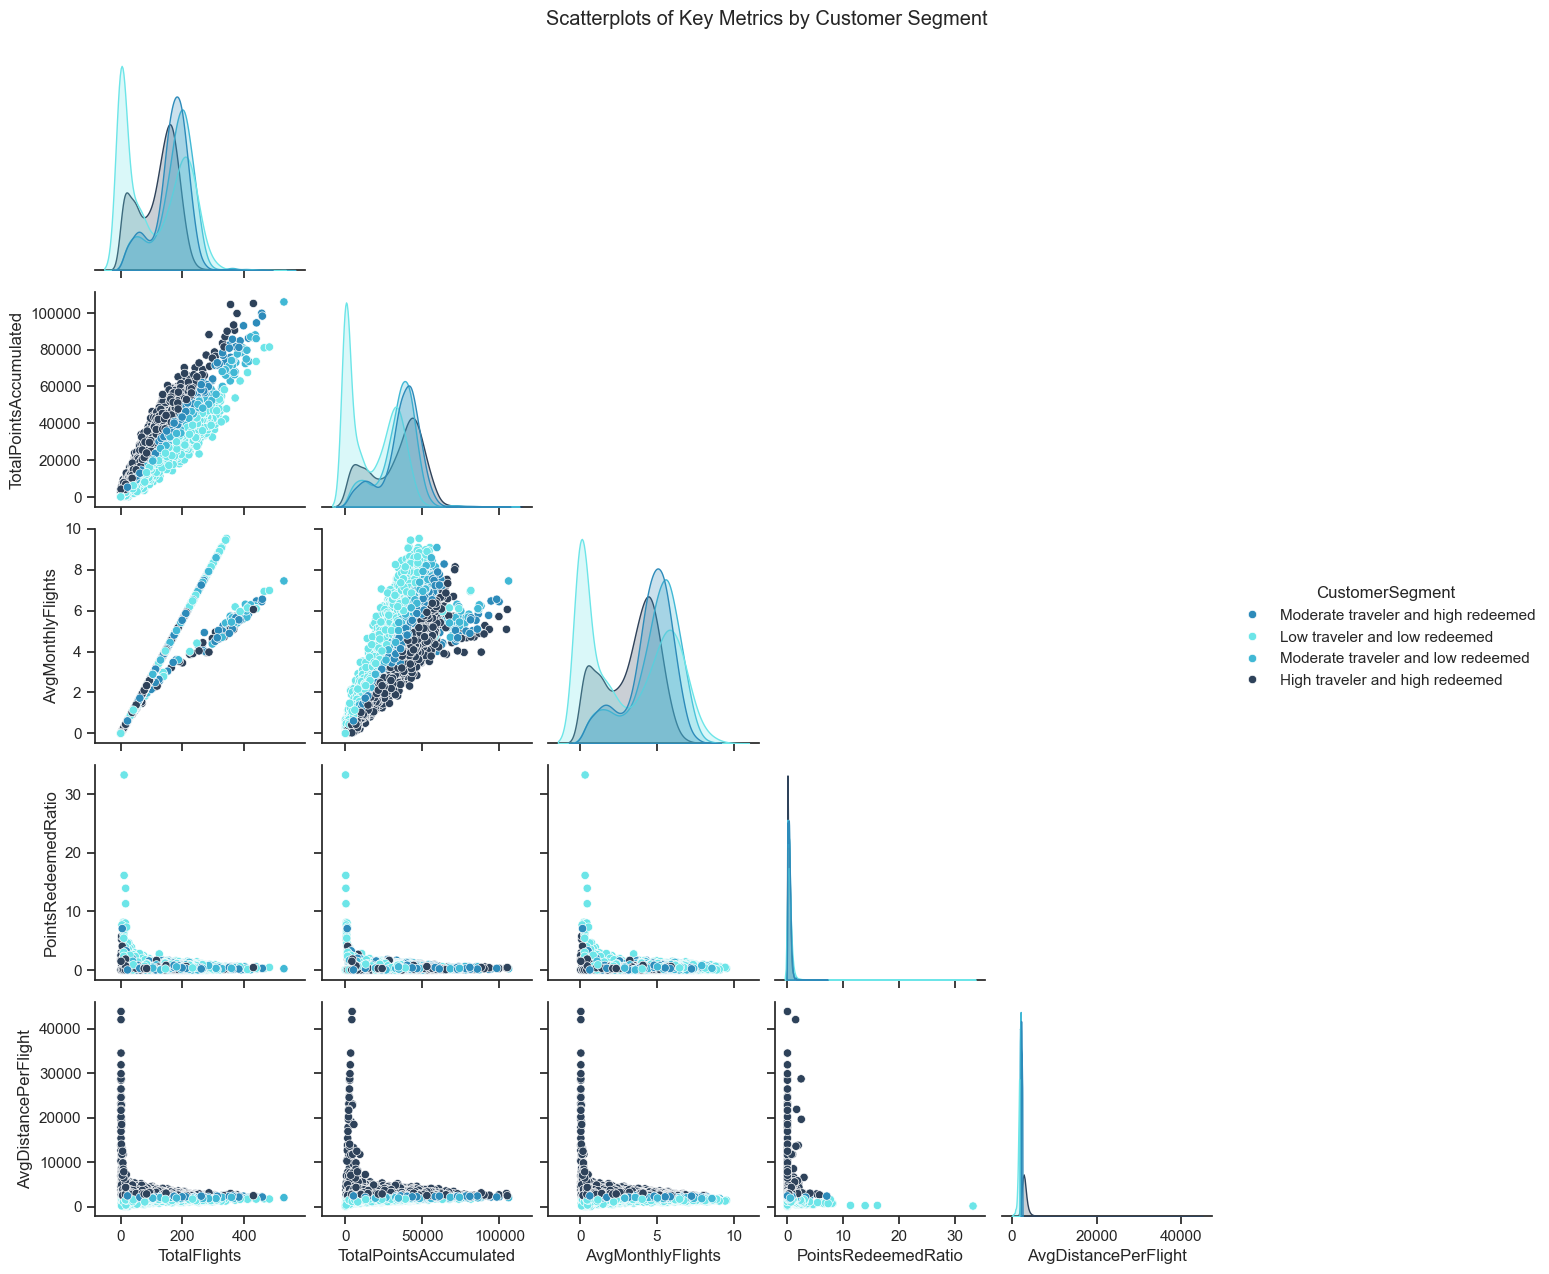

In [574]:
cols = ['TotalFlights', 'TotalPointsAccumulated', 'AvgMonthlyFlights', 'PointsRedeemedRatio', 'AvgDistancePerFlight', 'CustomerSegment']

df_plot = FlightsDB_agg[cols]

# Custom colors
custom_colors = ['#2d8bba', '#6ce5e8', '#41b8d5', '#2e425a']
segments = df_plot['CustomerSegment'].unique()
palette_dict = {seg: custom_colors[i % len(custom_colors)] for i, seg in enumerate(segments)}

sns.set(style="ticks")
pairplot = sns.pairplot(df_plot, hue='CustomerSegment', diag_kind='kde', corner=True, palette=palette_dict)
pairplot.fig.suptitle("Scatterplots of Key Metrics by Customer Segment", y=1.02)
plt.show()


#### Sazonality

##### Per total

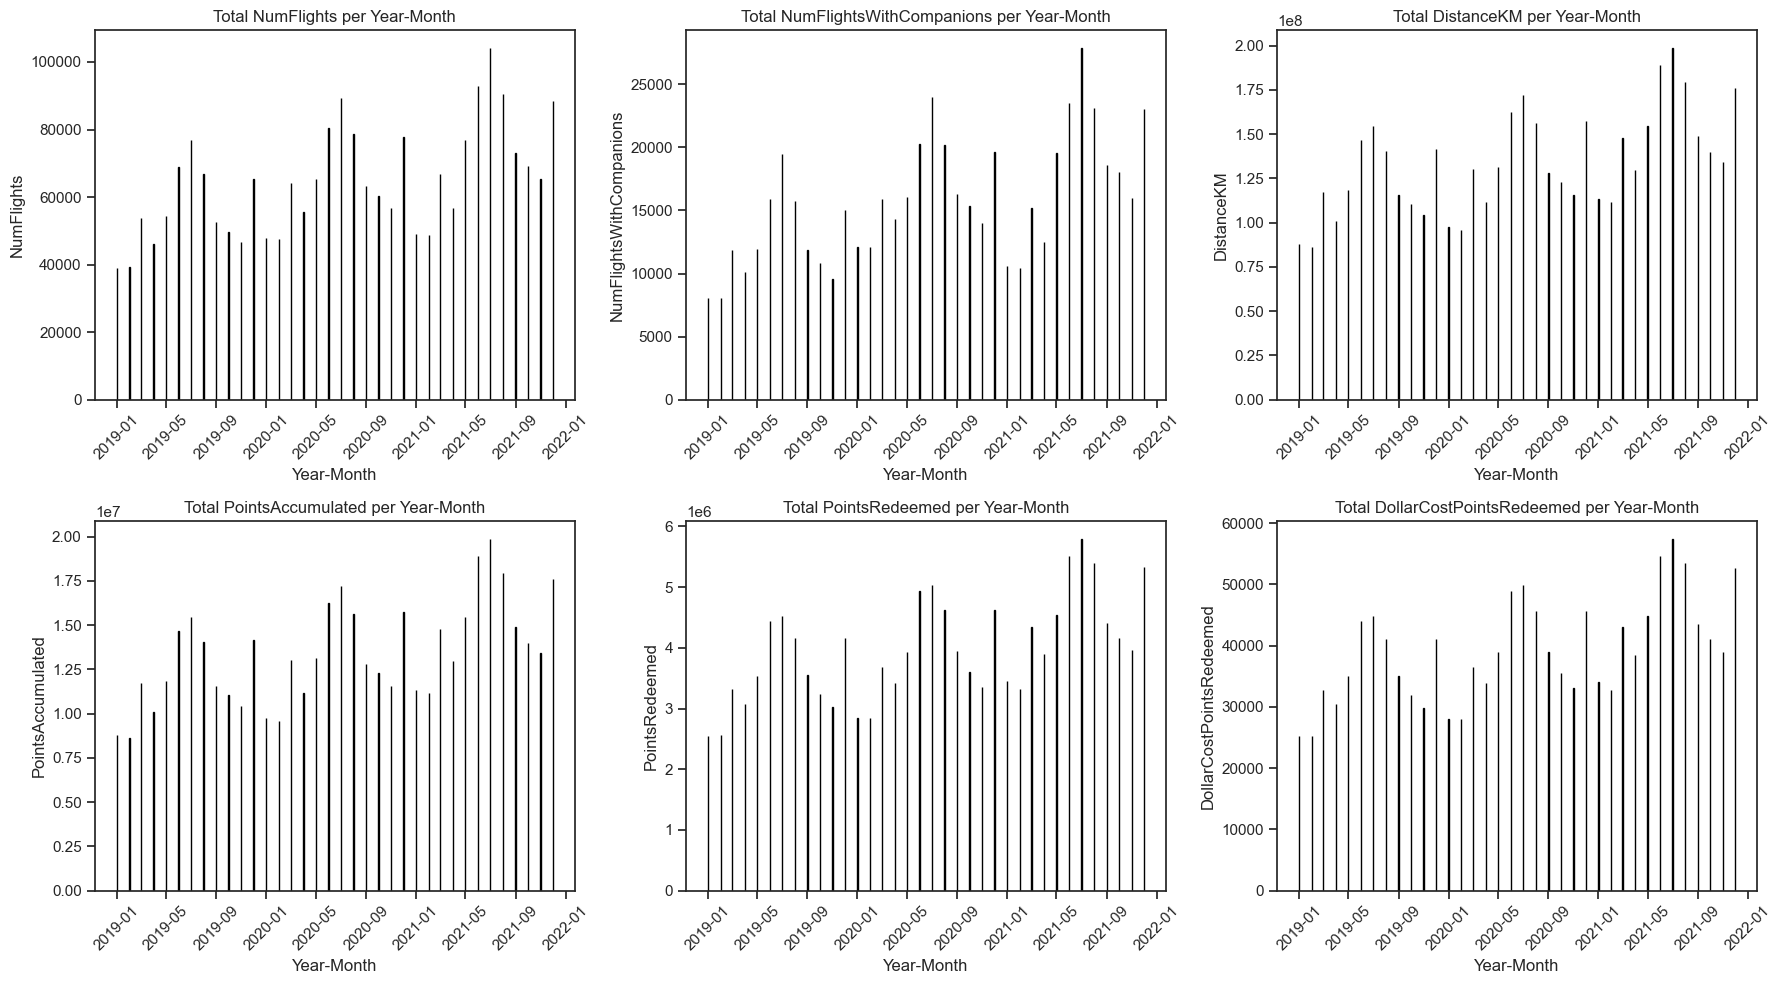

In [575]:
FlightsDB = FlightsDB.copy()

numerical_cols = ['NumFlights', 'NumFlightsWithCompanions',
                'DistanceKM', 'PointsAccumulated',
                'PointsRedeemed', 'DollarCostPointsRedeemed']

monthly_sum = FlightsDB.groupby('YearMonthDate')[numerical_cols].sum().reset_index()

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18,10))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    axes[i].bar(monthly_sum['YearMonthDate'], monthly_sum[col], color='#2d8bba', edgecolor='black')
    axes[i].set_title(f'Total {col} per Year-Month')
    axes[i].set_xlabel('Year-Month')
    axes[i].set_ylabel(col)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()




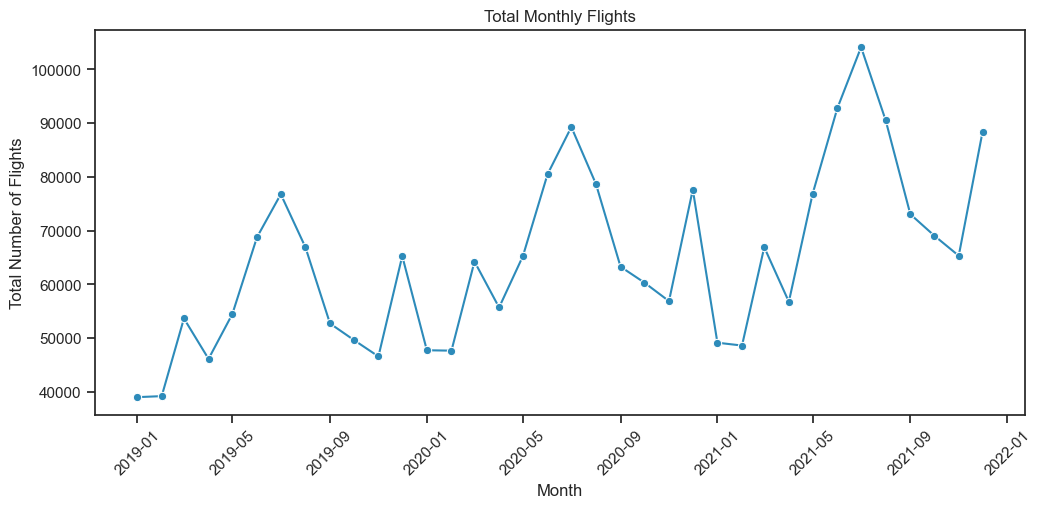

In [576]:
plt.figure(figsize=(12,5))
sns.lineplot(data=monthly_sum, x='YearMonthDate', y='NumFlights', marker='o', color='#2d8bba')
plt.title('Total Monthly Flights')
plt.xlabel('Month')
plt.ylabel('Total Number of Flights')
plt.xticks(rotation=45)
plt.show()


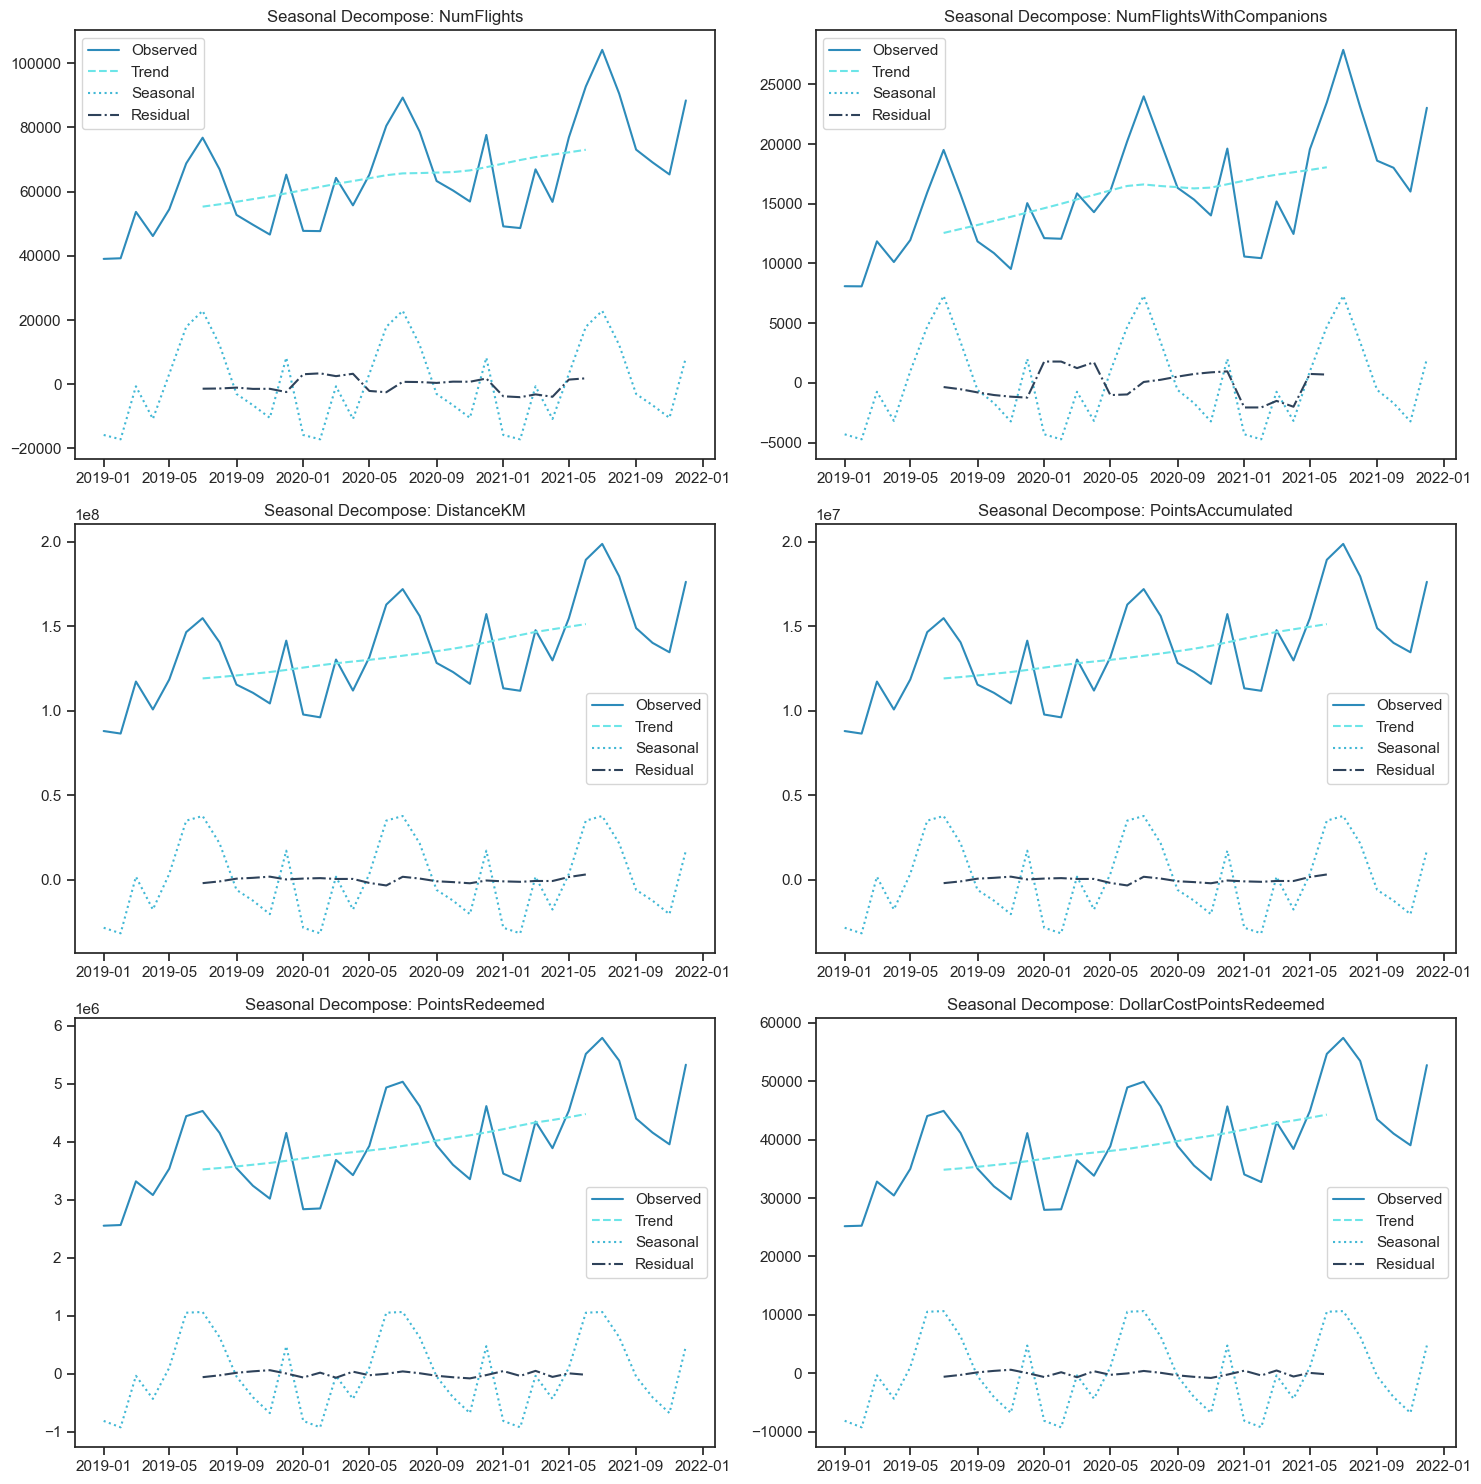

In [577]:
n_cols = 2
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

# Custom colors
custom_colors = ['#2d8bba', '#6ce5e8', '#41b8d5', '#2e425a']

for i, col in enumerate(numerical_cols):
    monthly_total = monthly_sum.set_index('YearMonthDate')[col]
    result = seasonal_decompose(monthly_total, model='additive', period=12)

    axes[i].plot(result.observed, label='Observed', color=custom_colors[0])
    axes[i].plot(result.trend, label='Trend', color=custom_colors[1], linestyle='--')
    axes[i].plot(result.seasonal, label='Seasonal', color=custom_colors[2], linestyle=':')
    axes[i].plot(result.resid, label='Residual', color=custom_colors[3], linestyle='-.')

    axes[i].set_title(f'Seasonal Decompose: {col}')
    axes[i].legend()

# Remove unused axes
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Observed**: The original time series data you recorded.

**Trend**: The long-term direction or overall movement in the data.

**Seasonal**: Regular repeating patterns or cycles over time.

**Residual**: The random fluctuations or noise not explained by trend or seasonality.

##### By mean

In [578]:
FlightsDB.columns

Index(['Loyalty#', 'Year', 'Month', 'YearMonthDate', 'NumFlights',
       'NumFlightsWithCompanions', 'DistanceKM', 'PointsAccumulated',
       'PointsRedeemed', 'DollarCostPointsRedeemed', 'ActiveRedeemer'],
      dtype='object')

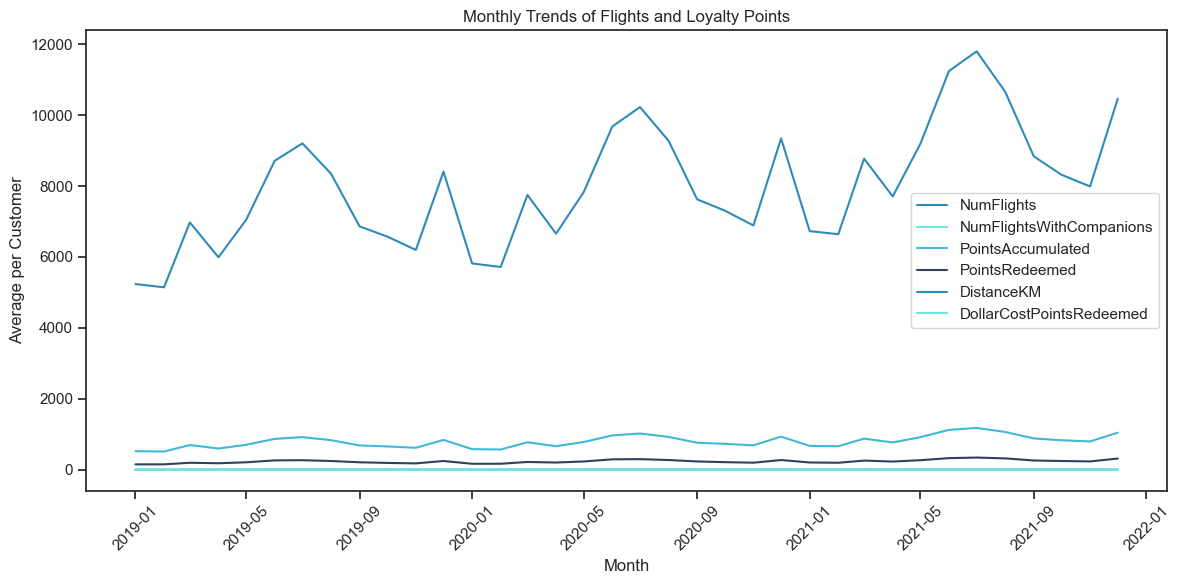

In [579]:

monthly_agg = FlightsDB.groupby('YearMonthDate').agg({
    'NumFlights': 'mean',
    'NumFlightsWithCompanions': 'mean',
    'PointsAccumulated': 'mean',
    'PointsRedeemed': 'mean',
    'DistanceKM': 'mean',
    'DollarCostPointsRedeemed': 'mean'
}).reset_index()

plt.figure(figsize=(12,6))

# Custom colors palette
custom_colors = ['#2d8bba', '#6ce5e8', '#41b8d5', '#2e425a']

metrics = ['NumFlights', 'NumFlightsWithCompanions', 
           'PointsAccumulated', 'PointsRedeemed', 
           'DistanceKM', 'DollarCostPointsRedeemed']

for i, metric in enumerate(metrics):
    sns.lineplot(
        data=monthly_agg, 
        x='YearMonthDate', 
        y=metric, 
        label=metric, 
        color=custom_colors[i % len(custom_colors)]
    )

plt.xlabel('Month')
plt.ylabel('Average per Customer')
plt.title('Monthly Trends of Flights and Loyalty Points')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(False)
plt.show()


In [580]:
# Seasonal Ratio
monthly_flights = FlightsDB.groupby('Month')['NumFlights'].sum().reset_index()

monthly_flights['SeasonalRatio'] = monthly_flights['NumFlights'] / monthly_flights['NumFlights'].sum()

print("Total of Flights per Month:")
print(monthly_flights)

print(monthly_flights[['Month', 'SeasonalRatio']])


Total of Flights per Month:
    Month  NumFlights  SeasonalRatio
0       1      135977       0.058394
1       2      135567       0.058218
2       3      184876       0.079393
3       4      158673       0.068140
4       5      196678       0.084461
5       6      242022       0.103934
6       7      270223       0.116044
7       8      236144       0.101409
8       9      189124       0.081217
9      10      179140       0.076930
10     11      168864       0.072517
11     12      231334       0.099344
    Month  SeasonalRatio
0       1       0.058394
1       2       0.058218
2       3       0.079393
3       4       0.068140
4       5       0.084461
5       6       0.103934
6       7       0.116044
7       8       0.101409
8       9       0.081217
9      10       0.076930
10     11       0.072517
11     12       0.099344


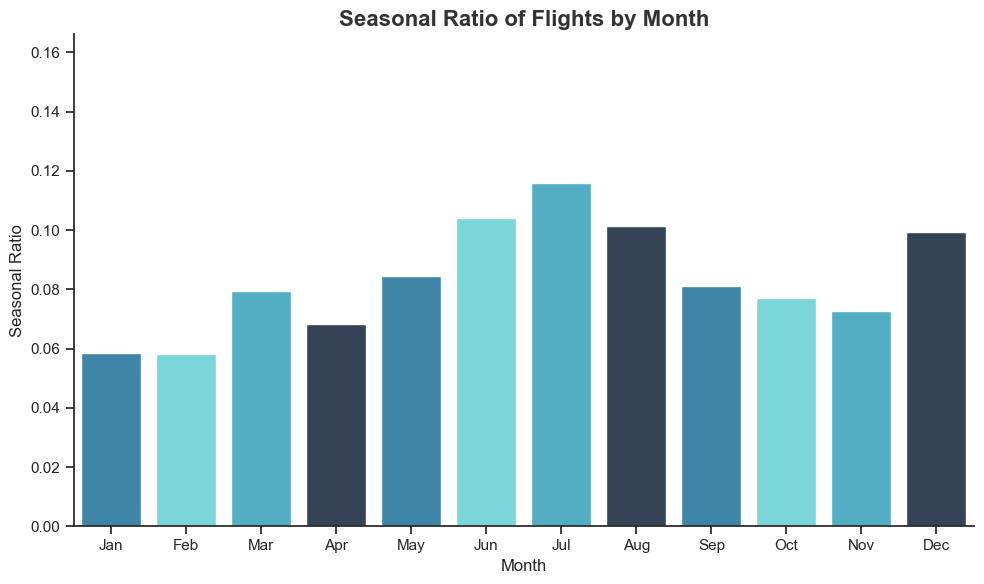

In [581]:

# Ensure months are in order
monthly_flights = monthly_flights.sort_values('Month')

# Custom blue-teal palette
custom_palette = ['#2d8bba', '#6ce5e8', '#41b8d5', '#2e425a']

plt.figure(figsize=(10,6))
sns.barplot(
    x='Month',
    y='SeasonalRatio',
    data=monthly_flights,
    palette=custom_palette * 3  # Repeat to cover all 12 months
)

plt.title('Seasonal Ratio of Flights by Month', fontsize=16, fontweight='bold', color="#333")
plt.xlabel('Month', fontsize=12)
plt.ylabel('Seasonal Ratio', fontsize=12)
plt.ylim(0, monthly_flights['SeasonalRatio'].max() + 0.05)
plt.xticks(range(0,12), 
           ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.grid(False)
sns.despine()
plt.tight_layout()
plt.show()


# Preparing CustomerDB for merge

This section focuses on the **Data Understanding** phase of the CRISP-DM framework.  
We explore the structure, completeness, and consistency of both datasets — `CustomerDB` and `FlightsDB` — to assess their readiness for clustering and feature engineering.


In [582]:
#CustomerDB = CustomerDB.copy()


#CustomerDB = CustomerDB.sort_values(['Loyalty#', 'EnrollmentDateOpening'], ascending=[True, True])

#CustomerDB_final = CustomerDB.drop_duplicates(subset='Loyalty#', keep='first')


# Preparing FlightsDB for merge

In [583]:
#FlightsDB.head()

Let's do the mean and the sum per year to have a unique Loyalty#.

In [584]:
#FlightsDB= FlightsDB.copy()
#id_col = 'Loyalty#'

#cols = [
 #   'NumFlights',
 #   'NumFlightsWithCompanions',
  #  'DistanceKM',
   # 'PointsAccumulated',
  #  'PointsRedeemed',
  #  'DollarCostPointsRedeemed'
#]


#FlightsDB_agg = FlightsDB.groupby([id_col, 'Year'])[cols].agg(['sum', 'mean']).reset_index()

#FlightsDB_agg.columns = [id_col, 'Year'] + [f'{col}_{agg}' for col, agg in FlightsDB_agg.columns[2:]]

#FlightsDB_wide = FlightsDB_agg.pivot(index=id_col, columns='Year')

#FlightsDB_wide.columns = [f'{col}_{year}' for col, year in FlightsDB_wide.columns]

#FlightsDB_final1 = FlightsDB_wide.reset_index()


In [585]:
#FlightsDB = FlightsDB.copy()

#monthly_stats = FlightsDB.groupby(['Loyalty#', 'Year']).agg(
#    months_active=('NumFlights', lambda x: (x > 0).sum()),  
#    max_monthly_points=('PointsRedeemed', 'max'),            
#    std_monthly_flights=('NumFlights', 'std')               
#).reset_index()

#monthly_stats_wide = monthly_stats.pivot(index='Loyalty#', columns='Year')

#monthly_stats_wide.columns = [f'{col}_{year}' for col, year in monthly_stats_wide.columns]

#monthly_stats_wide = monthly_stats_wide.reset_index()

In [586]:
#FlightsDB_final = pd.merge(
#    FlightsDB_final1,
#    monthly_stats_wide,
#    on='Loyalty#',
#    how='outer'
#)

In [587]:
#FlightsDB_final.head()

In [588]:
#has_duplicates = FlightsDB_final['Loyalty#'].duplicated().any()
#if has_duplicates:
#    print("There are duplicated Loyalty# in the final dataset.")

In [589]:
#num_cols = FlightsDB_final.columns.tolist()

#all_zero_rows = FlightsDB_final[(FlightsDB_final[num_cols] == 0).all(axis=1)]

#print(all_zero_rows)
#print("Rows number:", all_zero_rows.shape[0])


# FINAL DATASET

In [590]:
#finalDB = FlightsDB_final.merge(CustomerDB_final, on='Loyalty#', how='left')

In [591]:
#finalDB.shape

In [592]:
#finalDB.head(10)

In [593]:
#new_features_list = []